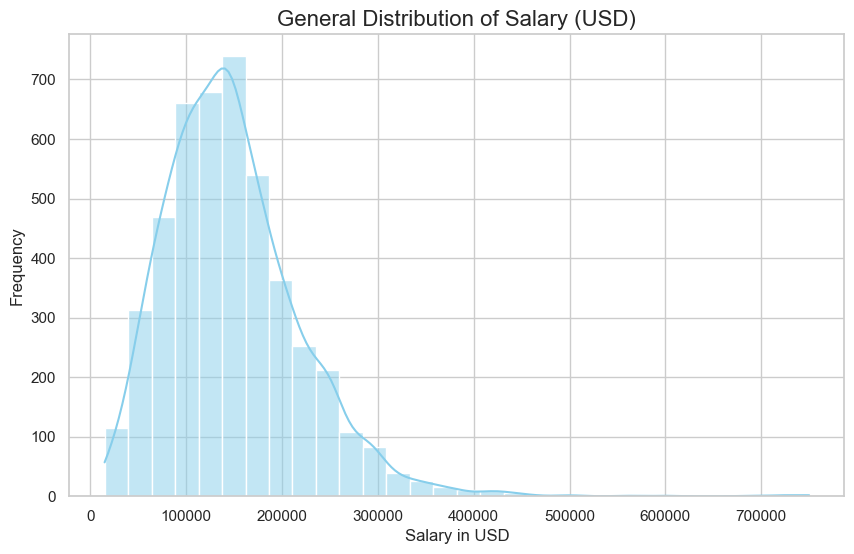

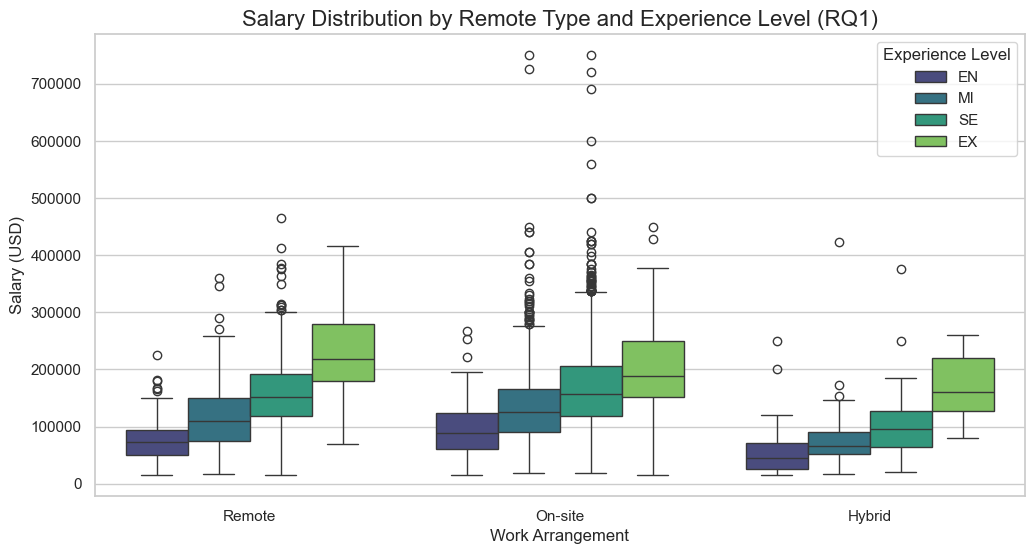

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_2752\2643133131.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


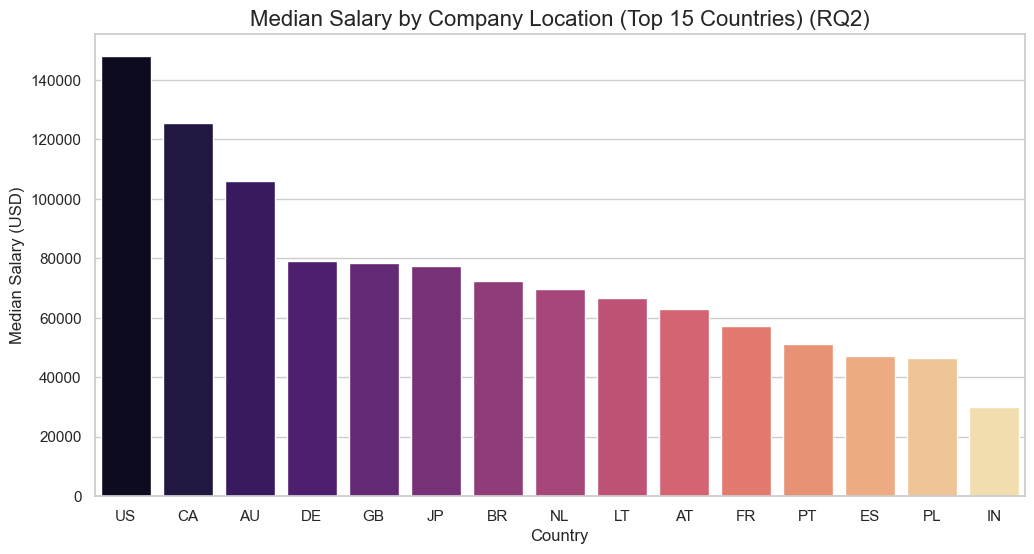

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_2752\2643133131.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


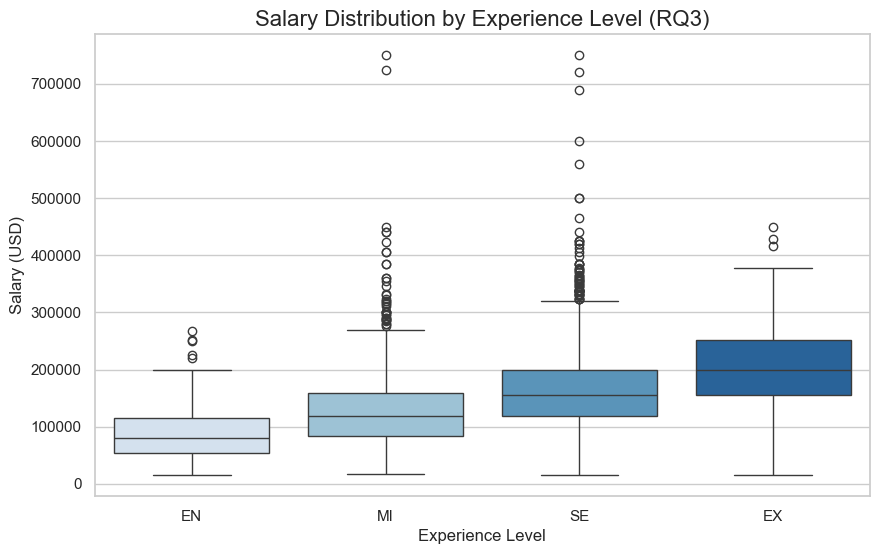

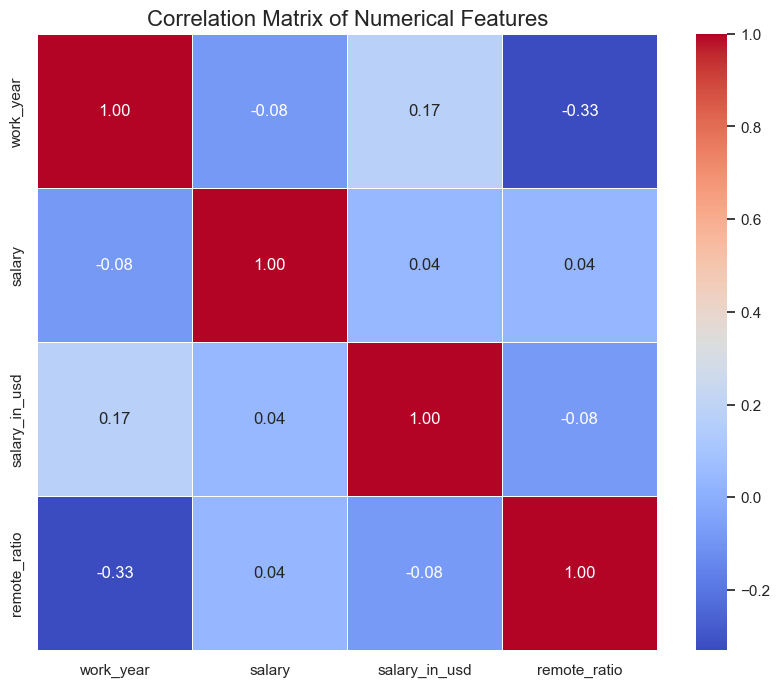

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. SETUP AND DATA LOADING
# ==========================================
# Load the dataset
df = pd.read_csv("FoAI_A2_data_4.6k.csv")

# Set the visual style for all plots
sns.set(style="whitegrid")

# Define the logical order for experience levels
experience_order = ['EN', 'MI', 'SE', 'EX']

# Create a readable label for Remote Ratio
df['remote_label'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})

# ==========================================
# 2. VISUAL 1: GENERAL SALARY DISTRIBUTION
# ==========================================
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='skyblue')
plt.title('General Distribution of Salary (USD)', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# ==========================================
# 3. VISUAL 2 (RQ1): REMOTE WORK IMPACT
# ==========================================
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='remote_label',
    y='salary_in_usd',
    hue='experience_level',
    data=df,
    hue_order=experience_order,
    palette='viridis'
)
plt.title('Salary Distribution by Remote Type and Experience Level (RQ1)', fontsize=16)
plt.xlabel('Work Arrangement', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.legend(title='Experience Level')
plt.show()

# ==========================================
# 4. VISUAL 3 (RQ2): GEOGRAPHIC ARBITRAGE
# ==========================================
# Filter for top 15 countries to keep the chart readable
top_countries = df['company_location'].value_counts().head(15).index
country_salary = df[df['company_location'].isin(top_countries)].groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='company_location',
    y='salary_in_usd',
    data=country_salary,
    palette='magma'
)
plt.title('Median Salary by Company Location (Top 15 Countries) (RQ2)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Median Salary (USD)', fontsize=12)
plt.show()

# ==========================================
# 5. VISUAL 4 (RQ3): TEAM COMPOSITION COST
# ==========================================
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='experience_level',
    y='salary_in_usd',
    data=df,
    order=experience_order,
    palette='Blues'
)
plt.title('Salary Distribution by Experience Level (RQ3)', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.show()

# ==========================================
# 6. VISUAL 5: CORRELATION MATRIX
# ==========================================
# Select only numerical columns for correlation
numeric_cols = df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

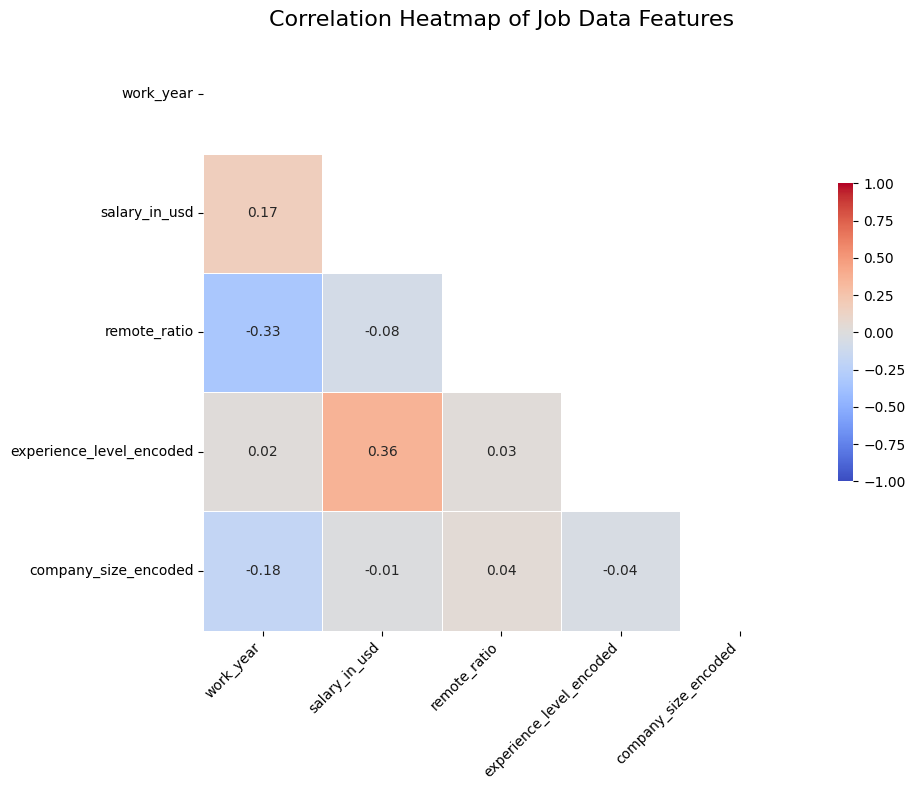

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Preprocessing: Map ordinal categorical variables to numeric for correlation analysis
# This allows us to see how experience and company size relate to salary and other metrics
experience_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
company_size_map = {'S': 0, 'M': 1, 'L': 2}

df['experience_level_encoded'] = df['experience_level'].map(experience_map)
df['company_size_encoded'] = df['company_size'].map(company_size_map)

# Select relevant columns for the correlation matrix
# 'salary' is excluded in favor of the standardized 'salary_in_usd'
cols_to_corr = [
    'work_year', 
    'salary_in_usd', 
    'remote_ratio', 
    'experience_level_encoded', 
    'company_size_encoded'
]

# Calculate the correlation matrix
corr_matrix = df[cols_to_corr].corr()

# Create the Heatmap
plt.figure(figsize=(10, 8))

# Create a mask to hide the upper triangle (redundant information)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    mask=mask, 
    vmin=-1, 
    vmax=1, 
    center=0, 
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
)

plt.title('Correlation Heatmap of Job Data Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('correlation_heatmap.png')

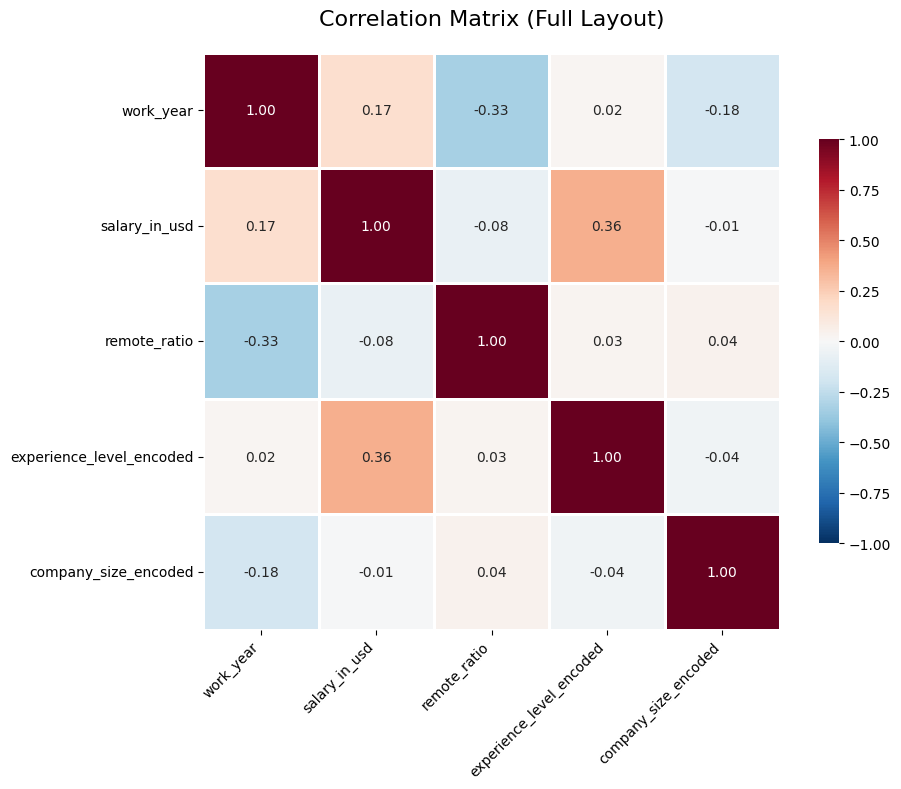

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Preprocessing
# Encode categorical variables for correlation
experience_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
company_size_map = {'S': 0, 'M': 1, 'L': 2}

df['experience_level_encoded'] = df['experience_level'].map(experience_map)
df['company_size_encoded'] = df['company_size'].map(company_size_map)

# Select columns
cols_to_corr = [
    'work_year', 
    'salary_in_usd', 
    'remote_ratio', 
    'experience_level_encoded', 
    'company_size_encoded'
]

# 3. Calculate Correlation
corr_matrix = df[cols_to_corr].corr()

# 4. Setup Plot Layout
plt.figure(figsize=(10, 8))

# --- OPTION A: FULL SQUARE LAYOUT (Default) ---
# We do NOT use a mask here, so you see the full grid.
mask = None 

# --- OPTION B: TRIANGLE LAYOUT (Uncomment below to use) ---
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# --- OPTION C: CLUSTERED LAYOUT (Uncomment below to use) ---
# Note: This creates a new figure entirely and reorders columns
# sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', figsize=(10, 10))
# plt.show()
# (If using Option C, comment out the heatmap code below)

# 5. Generate Heatmap
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True,            # Show numbers inside cells
    cmap='RdBu_r',         # 'RdBu_r' is Red-Blue (Red=High Pos, Blue=High Neg)
    fmt=".2f",             # 2 decimal places
    mask=mask,             # Apply mask (None for square, or variable for triangle)
    vmin=-1, vmax=1,       # Fix scale between -1 and 1
    center=0,              # Center colormap at 0
    square=True,           # Force cells to be square shaped
    linewidths=1,          # Grid lines between cells
    cbar_kws={"shrink": .7} # Adjust color bar size
)

# 6. Styling
plt.title('Correlation Matrix (Full Layout)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Save and Show
plt.savefig('correlation_heatmap_full.png', dpi=300)
plt.show()

PART 3: DATA PREPARATION AND MODEL TRAINING (BEST PRACTICE)
Dataset loaded: 4644 records
Data after cleaning: 4639 records

Training Set: 3711 samples
Test Set:     928 samples

Training the model pipeline...
✓ Training complete.

MODEL EVALUATION (TEST SET)
RMSE (Root Mean Squared Error): $56,617
MAE (Mean Absolute Error):      $42,465
R² (Variance Explained):        0.3145
MAPE (Mean Abs % Error):        37.12%
✓ Saved evaluation plot to 'model_evaluation_best_practice.png'

RESEARCH QUESTIONS ANALYSIS

--- RQ1: Remote Work Impact (Mid-level Data Scientist, US) ---
On-site: $136,564
Remote:  $131,588
Impact:  -3.6%

--- RQ2: Geographic Arbitrage (Mid-level Data Scientist, Remote) ---
US Based:     $131,588
India Based:  $44,004 (Savings: 66.6%)
Poland Based: $44,004 (Savings: 66.6%)

--- RQ3: Team Composition (1 Senior vs 2 Mids) ---
Option A (1 Senior): $168,686
Option B (2 Mids):   $263,176

--- RQ4: Total Optimization Strategy ---
Baseline Cost:  $1,351,849
Optimized Cost: $899,91

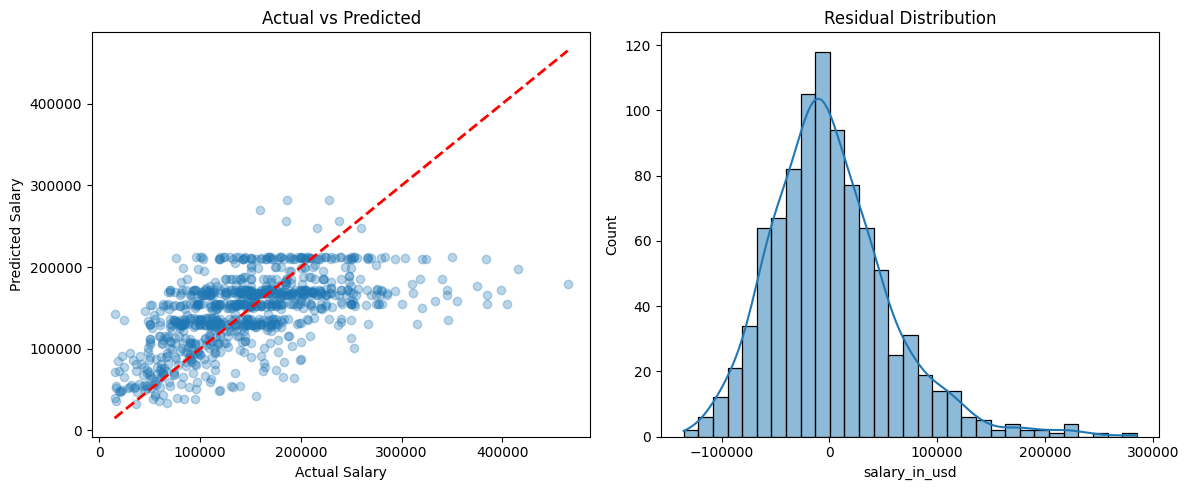

In [5]:
# ============================================================================
# PART 3: DATA PREPARATION AND MODEL TRAINING (BEST PRACTICE VERSION)
# Research Topic: Optimizing Global Labor Costs Through Remote Work
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("="*80)
print("PART 3: DATA PREPARATION AND MODEL TRAINING (BEST PRACTICE)")
print("="*80)

# ============================================================================
# SECTION 1: LOAD AND INITIAL CLEANING
# ============================================================================

# 1. Load Data
try:
    df = pd.read_csv('FoAI_A2_data_4.6k.csv')
    print(f"Dataset loaded: {len(df)} records")
except FileNotFoundError:
    print("Error: File not found. Please upload the dataset.")
    exit()

# 2. Basic Cleaning (Domain logic only, no statistical leakage)
# Remove rows with missing essential targets or features (if very few)
df = df.dropna(subset=['salary_in_usd', 'experience_level', 'company_size'])

# Filter reasonable salary range (Removing obvious data errors)
# Note: This is done before split as it's a data quality step, not statistical filtering
df = df[(df['salary_in_usd'] >= 10000) & (df['salary_in_usd'] <= 600000)]

print(f"Data after cleaning: {len(df)} records")

# 3. Define Features and Target
target = 'salary_in_usd'
features = [
    'experience_level',     # Ordinal
    'company_size',         # Ordinal
    'remote_ratio',         # Numeric
    'employee_residence',   # Nominal (High Cardinality)
    'company_location',     # Nominal (High Cardinality)
    'job_title'             # Nominal (High Cardinality)
]

X = df[features]
y = df[target]

# ============================================================================
# SECTION 2: TRAIN-TEST SPLIT (CRITICAL STEP)
# ============================================================================
# Split data BEFORE any encoding to prevent Data Leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Set: {len(X_train)} samples")
print(f"Test Set:     {len(X_test)} samples")

# ============================================================================
# SECTION 3: BUILD PIPELINE (FEATURE ENGINEERING)
# ============================================================================

# 1. Define feature groups
ordinal_cols = ['experience_level', 'company_size']
nominal_cols = ['job_title', 'employee_residence', 'company_location']
numeric_cols = ['remote_ratio']

# 2. Define Transformers

# A. Ordinal Transformer (Explicit Ordering)
experience_order = ['EN', 'MI', 'SE', 'EX']
company_size_order = ['S', 'M', 'L']

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[experience_order, company_size_order], 
                               handle_unknown='use_encoded_value', unknown_value=-1))
])

# B. Nominal Transformer (One-Hot + Rare Label Handling)
# handle_unknown='ignore': Ignores new categories in test data (prevents errors)
# min_frequency=0.01: Groups categories appearing <1% of the time into a single "infrequent" category
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, min_frequency=0.01))
])

# C. Numeric Transformer (Scaling)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 3. Create ColumnTransformer (The Master Preprocessor)
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols),
        ('num', numeric_transformer, numeric_cols)
    ],
    verbose_feature_names_out=False
)

# ============================================================================
# SECTION 4: MODEL DEFINITION AND TRAINING
# ============================================================================

# Create the full pipeline: Preprocessing -> Model
# Using RandomForest as it handles non-linear relationships well
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1))
])

print("\nTraining the model pipeline...")
model_pipeline.fit(X_train, y_train)
print("✓ Training complete.")

# ============================================================================
# SECTION 5: EVALUATION
# ============================================================================

print("\n" + "="*80)
print("MODEL EVALUATION (TEST SET)")
print("="*80)

y_pred = model_pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE (Root Mean Squared Error): ${rmse:,.0f}")
print(f"MAE (Mean Absolute Error):      ${mae:,.0f}")
print(f"R² (Variance Explained):        {r2:.4f}")
print(f"MAPE (Mean Abs % Error):        {mape:.2f}%")

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted')

plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred, kde=True)
plt.title('Residual Distribution')
plt.tight_layout()
plt.savefig('model_evaluation_best_practice.png')
print("✓ Saved evaluation plot to 'model_evaluation_best_practice.png'")

# ============================================================================
# SECTION 6: PREDICTION FUNCTION
# ============================================================================

def make_prediction_pipeline(experience_level, remote_ratio, employee_residence, 
                             company_location, job_title, work_year, company_size):
    """
    Robust prediction function utilizing the full pipeline.
    Inputs are converted to a DataFrame matching the training schema.
    """
    input_data = pd.DataFrame({
        'experience_level': [experience_level],
        'remote_ratio': [remote_ratio],
        'employee_residence': [employee_residence],
        'company_location': [company_location],
        'job_title': [job_title],
        'work_year': [work_year],
        'company_size': [company_size]
    })
    
    # The pipeline handles all encoding/scaling automatically
    prediction = model_pipeline.predict(input_data)[0]
    return prediction

# ============================================================================
# SECTION 7: RESEARCH QUESTION SCENARIOS
# ============================================================================

print("\n" + "="*80)
print("RESEARCH QUESTIONS ANALYSIS")
print("="*80)

# RQ1: Remote Work Impact
print("\n--- RQ1: Remote Work Impact (Mid-level Data Scientist, US) ---")
p1_onsite = make_prediction_pipeline('MI', 0, 'US', 'US', 'Data Scientist', 2024, 'M')
p1_remote = make_prediction_pipeline('MI', 100, 'US', 'US', 'Data Scientist', 2024, 'M')
print(f"On-site: ${p1_onsite:,.0f}")
print(f"Remote:  ${p1_remote:,.0f}")
print(f"Impact:  {((p1_remote - p1_onsite)/p1_onsite)*100:.1f}%")

# RQ2: Geographic Arbitrage
print("\n--- RQ2: Geographic Arbitrage (Mid-level Data Scientist, Remote) ---")
p2_us = make_prediction_pipeline('MI', 100, 'US', 'US', 'Data Scientist', 2024, 'M')
p2_in = make_prediction_pipeline('MI', 100, 'IN', 'US', 'Data Scientist', 2024, 'M') # India
p2_pl = make_prediction_pipeline('MI', 100, 'PL', 'US', 'Data Scientist', 2024, 'M') # Poland
print(f"US Based:     ${p2_us:,.0f}")
print(f"India Based:  ${p2_in:,.0f} (Savings: {((p2_us - p2_in)/p2_us)*100:.1f}%)")
print(f"Poland Based: ${p2_pl:,.0f} (Savings: {((p2_us - p2_pl)/p2_us)*100:.1f}%)")

# RQ3: Senior vs 2 Mids
print("\n--- RQ3: Team Composition (1 Senior vs 2 Mids) ---")
p3_senior = make_prediction_pipeline('SE', 100, 'US', 'US', 'Data Scientist', 2024, 'M')
p3_mid = make_prediction_pipeline('MI', 100, 'US', 'US', 'Data Scientist', 2024, 'M')
print(f"Option A (1 Senior): ${p3_senior:,.0f}")
print(f"Option B (2 Mids):   ${p3_mid * 2:,.0f}")

# RQ4: Optimized Team (Example)
print("\n--- RQ4: Total Optimization Strategy ---")
# Baseline: 10 Local US Employees (Mix of roles)
cost_baseline = (2 * make_prediction_pipeline('SE', 0, 'US', 'US', 'Data Scientist', 2024, 'M') +
                 6 * make_prediction_pipeline('MI', 50, 'US', 'US', 'Data Scientist', 2024, 'M') +
                 2 * make_prediction_pipeline('EN', 0, 'US', 'US', 'Data Analyst', 2024, 'M'))

# Optimized: Global Remote Team
cost_optimized = (1 * make_prediction_pipeline('SE', 100, 'US', 'US', 'Data Scientist', 2024, 'M') +
                  1 * make_prediction_pipeline('SE', 100, 'PL', 'US', 'Data Scientist', 2024, 'M') + # Poland Lead
                  3 * make_prediction_pipeline('MI', 100, 'US', 'US', 'Data Scientist', 2024, 'M') +
                  3 * make_prediction_pipeline('MI', 100, 'IN', 'US', 'Data Scientist', 2024, 'M') + # India Devs
                  2 * make_prediction_pipeline('EN', 100, 'IN', 'US', 'Data Analyst', 2024, 'M'))    # India Juniors

print(f"Baseline Cost:  ${cost_baseline:,.0f}")
print(f"Optimized Cost: ${cost_optimized:,.0f}")
print(f"Total Savings:  ${cost_baseline - cost_optimized:,.0f} ({((cost_baseline - cost_optimized)/cost_baseline)*100:.1f}%)")

# Save the model
joblib.dump(model_pipeline, 'salary_pipeline_best_practice.pkl')
print("\n✓ Model pipeline saved to 'salary_pipeline_best_practice.pkl'")

Original shape: (4644, 11), Cleaned shape: (4550, 11)
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.8, 'model__regressor__n_estimators': 200, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.05}

--- EVALUATION METRICS ---
MAE   : $37,777.86
RMSE  : $50,747.09
MedAE : $29,685.79
R2    : 0.3246


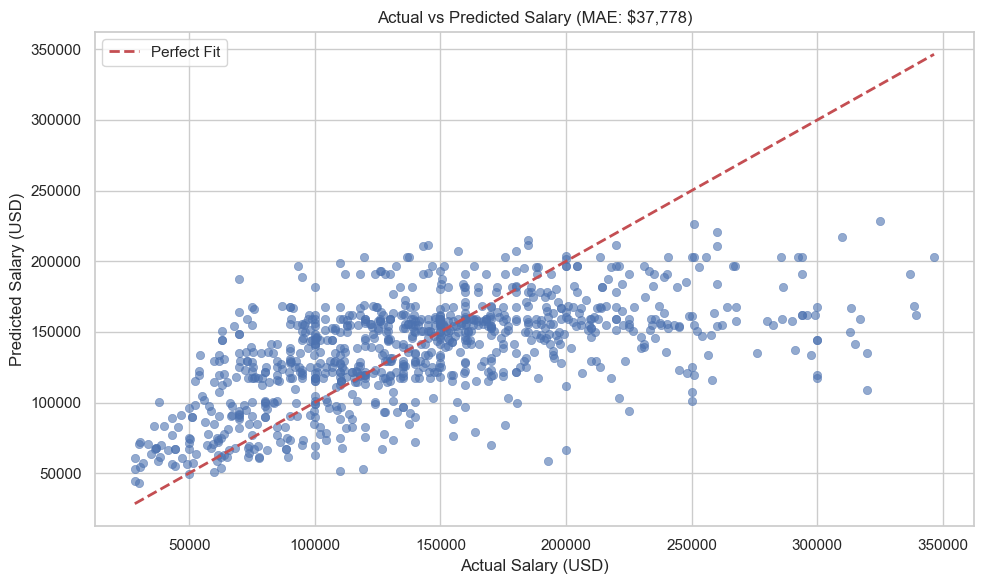

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # BEST PRACTICE FIX 1: 
    # Do NOT drop duplicates unless confirmed as data entry errors.
    # In salary data, duplicate rows (same role, same exp, same pay) are valid.
    # df = df.drop_duplicates()  <-- REMOVED

    # Quantile based outlier removal (keep middle 98% to remove extreme outliers)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()
    
    # BEST PRACTICE FIX 2:
    # Convert remote_ratio to string so OneHotEncoder treats it as categorical
    # This captures if "Hybrid" (50) has a different value prop than "Remote" (100)
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal Columns: No intrinsic order.
    # We include 'remote_ratio' here to learn non-linear effects.
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio' 
    ]
    
    # Ordinal Columns: Clear Intrinsic order (Low < Med < High)
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # min_frequency=0.01 groups rare jobs/countries (<1%) into "Infrequent_sklearn"
            # This handles high cardinality automatically and robustly.
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01, sparse_output=False), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        # TransformedTargetRegressor handles the Log-Transformation of Salary automatically
        # This is critical for money-related predictions which follow Power Laws.
        ('model', TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(
                random_state=RANDOM_STATE
            ),
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # BEST PRACTICE FIX 3:
    # Reduced parameter space to prevent overfitting on dataset size (N=4600)
    # High estimator counts (800+) cause the model to memorize training noise.
    param_dist = {
        'model__regressor__n_estimators': [100, 200, 300], 
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__learning_rate': [0.05, 0.1],
        'model__regressor__subsample': [0.8, 0.9, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    # 1. Load data
    df = load_and_clean_data(DATA_PATH)

    # 2. Features & target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # 3. Train/test split (80/20 Random Split)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # 4. Build pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # 5. Train
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 6. Evaluate
    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4550, 11)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.8, 'model__regressor__n_estimators': 200, 'model__regressor__max_depth': 4, 'model__regressor__learning_rate': 0.03, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,784.01
RMSE  : $50,694.56
MedAE : $29,292.97
R2    : 0.3260


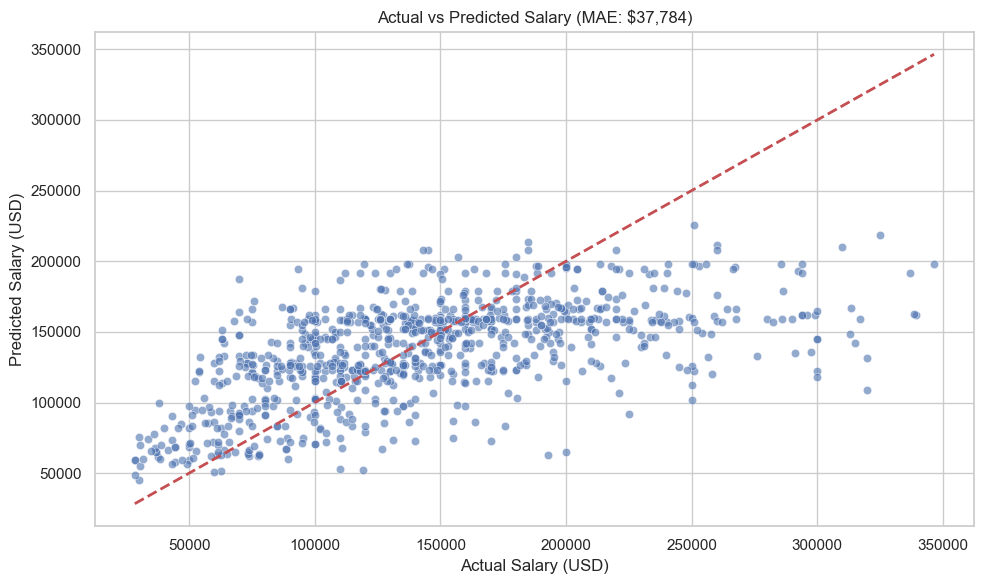

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from xgboost import XGBRegressor
from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # Remove extreme outliers (middle 98%)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()

    # Treat remote_ratio as categorical
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (XGBOOST)
# =========================
def build_model_pipeline(preprocessor):
    xgb = XGBRegressor(
        objective='reg:squarederror',
        random_state=RANDOM_STATE,
        n_jobs=-1,
        tree_method='hist',          # faster & stable
        eval_metric='mae'
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=xgb,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # Carefully constrained search space (anti-overfitting)
    param_dist = {
        'model__regressor__n_estimators': [200, 300, 400],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__learning_rate': [0.03, 0.05, 0.1],
        'model__regressor__subsample': [0.8, 0.9, 1.0],
        'model__regressor__colsample_bytree': [0.7, 0.8, 0.9]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)


Original shape: (4644, 11), Cleaned shape: (4550, 11)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 3640, number of used features: 33
[LightGBM] [Info] Start training from score 11.796989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


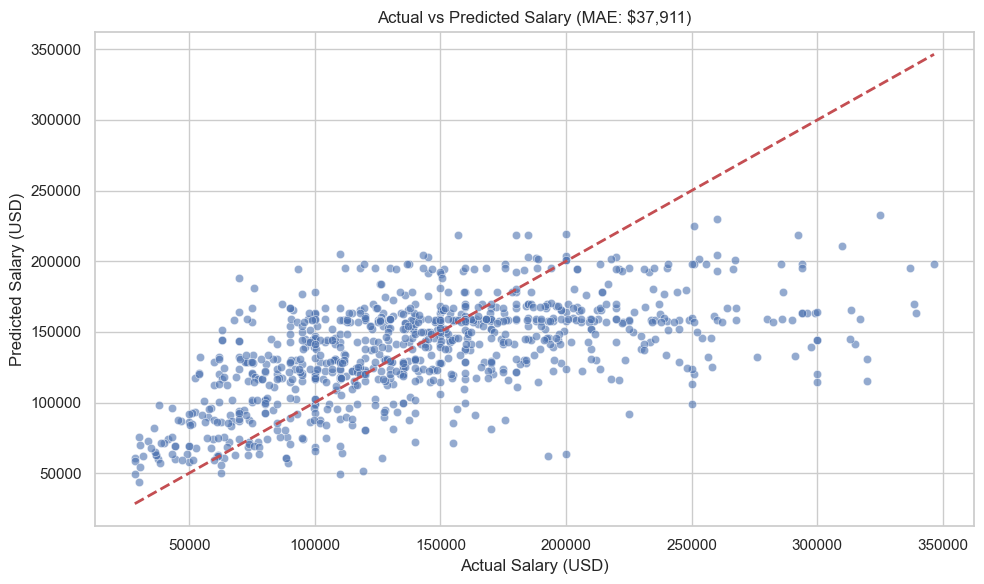

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from lightgbm import LGBMRegressor
from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # Remove extreme outliers (middle 98%)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()

    # Treat remote_ratio as categorical
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (LIGHTGBM)
# =========================
def build_model_pipeline(preprocessor):
    lgbm = LGBMRegressor(
        objective='regression',
        random_state=RANDOM_STATE,
        n_jobs=-1,
        metric='mae'
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=lgbm,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # LightGBM-friendly, anti-overfitting search space
    param_dist = {
        'model__regressor__n_estimators': [200, 300, 400],
        'model__regressor__learning_rate': [0.03, 0.05, 0.1],
        'model__regressor__num_leaves': [15, 31, 63],
        'model__regressor__max_depth': [-1, 5, 7],
        'model__regressor__subsample': [0.8, 0.9, 1.0],
        'model__regressor__colsample_bytree': [0.7, 0.8, 0.9]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)


Original shape: (4644, 11), Cleaned shape: (4550, 11)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__alpha': np.float64(0.01)}

--- EVALUATION METRICS ---
MAE   : $37,739.39
RMSE  : $50,756.46
MedAE : $29,542.80
R2    : 0.3244


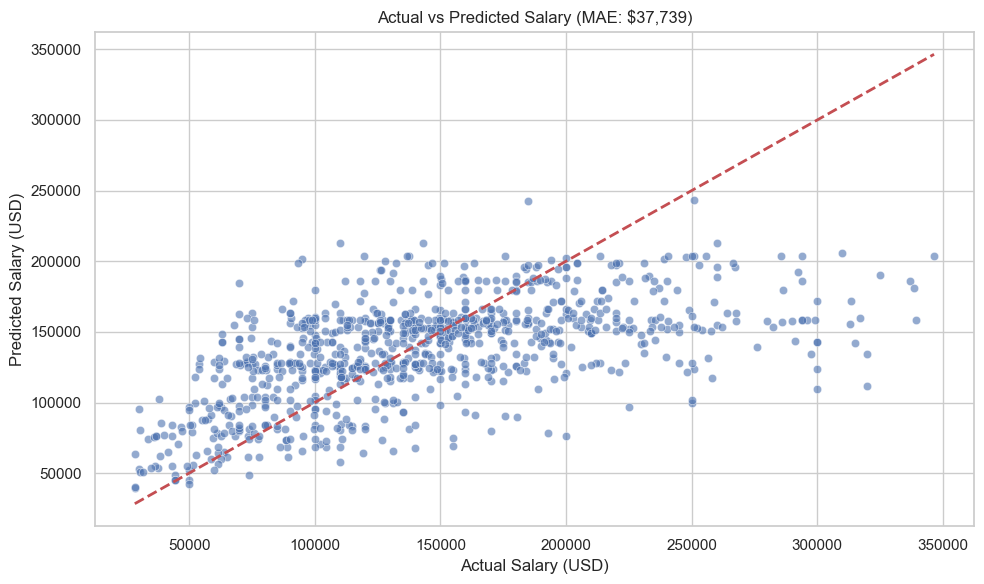

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # Remove extreme outliers (middle 98%)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()

    # Treat remote_ratio as categorical
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (RIDGE)
# =========================
def build_model_pipeline(preprocessor):
    ridge = Ridge(random_state=RANDOM_STATE)

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        # Ridge NEEDS scaling
        ('scaler', StandardScaler()),
        ('model', TransformedTargetRegressor(
            regressor=ridge,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # Ridge has ONE meaningful hyperparameter
    param_dist = {
        'model__regressor__alpha': np.logspace(-2, 3, 30)
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)


IQR Constraints: -29,750 to 313,850
Original shape: (4644, 11), Cleaned shape: (4544, 11)
Outliers Removed: 100
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 3635, number of used features: 35
[LightGBM] [Info] Start training from score 11.760440
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


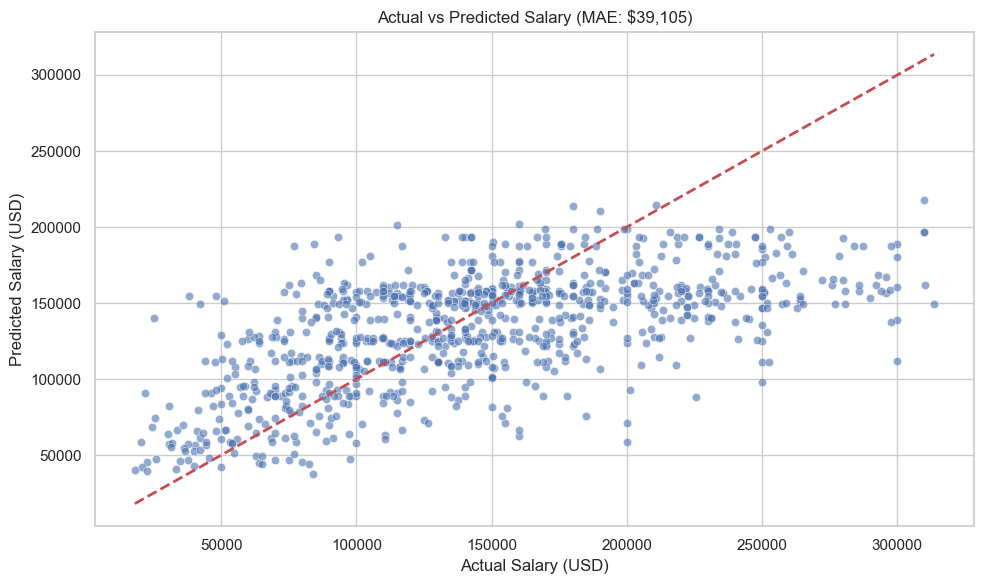

In [5]:
# Remove outliers using IQR method with 'midpoint' interpolation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from lightgbm import LGBMRegressor
from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    df = pd.read_csv(filepath)
    
    # ---------------------------------------------------------
    # MODIFIED: Outlier Removal using IQR Method (Midpoint)
    # ---------------------------------------------------------
    # Calculate Q1 and Q3 using 'midpoint' interpolation as requested
    Q1 = df[outcome_col].quantile(0.25, interpolation='midpoint')
    Q3 = df[outcome_col].quantile(0.75, interpolation='midpoint')
    IQR = Q3 - Q1
    
    # Define Upper and Lower Bounds (1.5 * IQR rule)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Filter the data
    df_clean = df[(df[outcome_col] >= lower_bound) & (df[outcome_col] <= upper_bound)].copy()
    
    print(f"IQR Constraints: {lower_bound:,.0f} to {upper_bound:,.0f}")
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed: {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    # Treat remote_ratio as categorical
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (LIGHTGBM)
# =========================
def build_model_pipeline(preprocessor):
    lgbm = LGBMRegressor(
        objective='regression',
        random_state=RANDOM_STATE,
        n_jobs=-1,
        metric='mae'
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=lgbm,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # LightGBM-friendly, anti-overfitting search space
    param_dist = {
        'model__regressor__n_estimators': [200, 300, 400],
        'model__regressor__learning_rate': [0.03, 0.05, 0.1],
        'model__regressor__num_leaves': [15, 31, 63],
        'model__regressor__max_depth': [-1, 5, 7],
        'model__regressor__subsample': [0.8, 0.9, 1.0],
        'model__regressor__colsample_bytree': [0.7, 0.8, 0.9]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.8, 'model__regressor__n_estimators': 200, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.05}

--- EVALUATION METRICS ---
MAE   : $37,615.56
RMSE  : $48,492.92
MedAE : $31,228.96
R2    : 0.3395


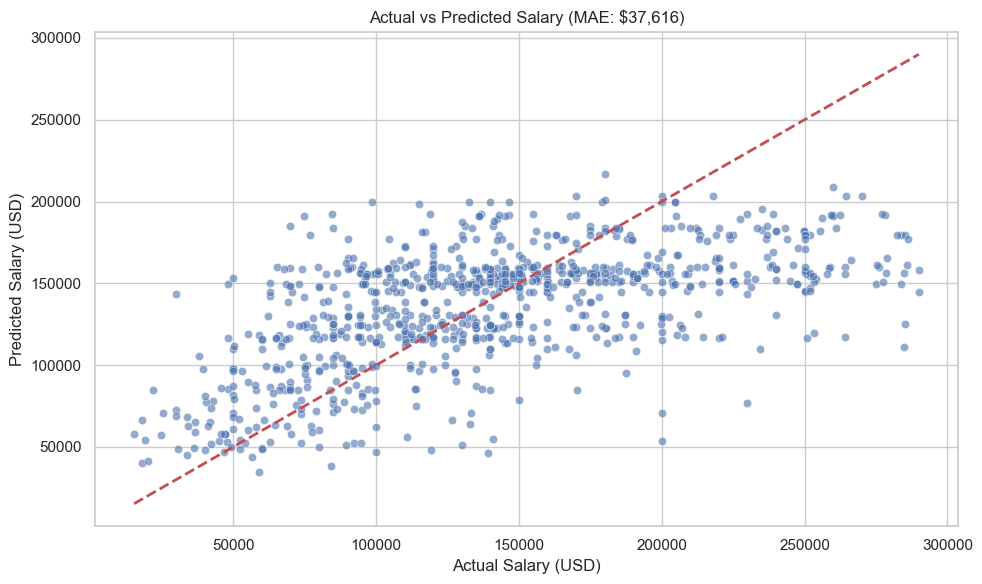

In [ ]:
# Remove outliers using Z-Score method, gradient boosting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # ---------------------------------------------------------
    # MODIFIED: Outlier Removal using Z-Score Method
    # ---------------------------------------------------------
    # Calculate absolute Z-scores for the outcome column
    z_scores = np.abs(stats.zscore(df[outcome_col]))
    
    # Define Threshold (User specified 2, which is tighter than the standard 3)
    threshold = 2
    
    # Identify indices where Z-score exceeds threshold
    outlier_indices = np.where(z_scores > threshold)[0]
    
    # Drop outliers
    df_clean = df.drop(outlier_indices).copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    # Treat remote_ratio as categorical string to capture non-linearities
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # min_frequency=0.01 groups rare jobs/countries automatically
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # Using GradientBoostingRegressor (sklearn standard)
    gbr = GradientBoostingRegressor(
        random_state=RANDOM_STATE,
        loss='absolute_error' # Explicitly optimizing for MAE
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=gbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [100, 200, 300],
        'model__regressor__learning_rate': [0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.8, 0.9, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Generating Scatter Plots for Visual Inspection...


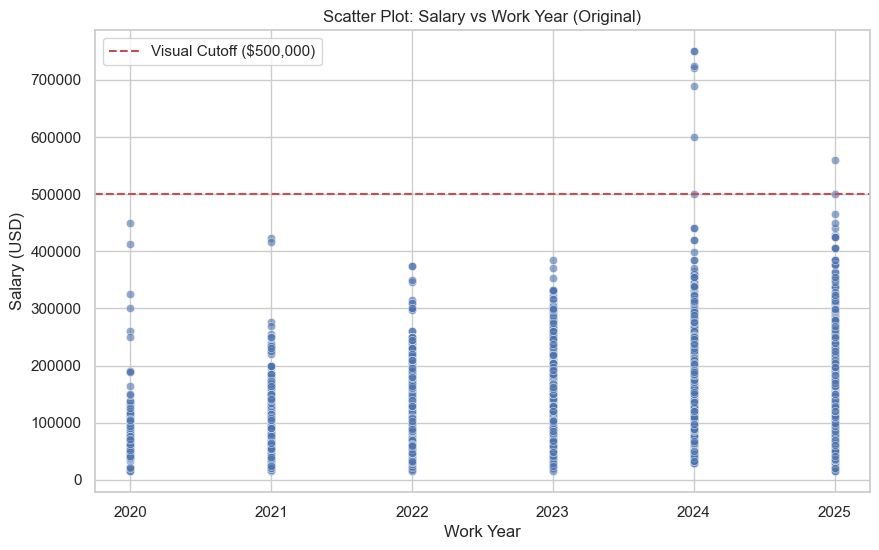

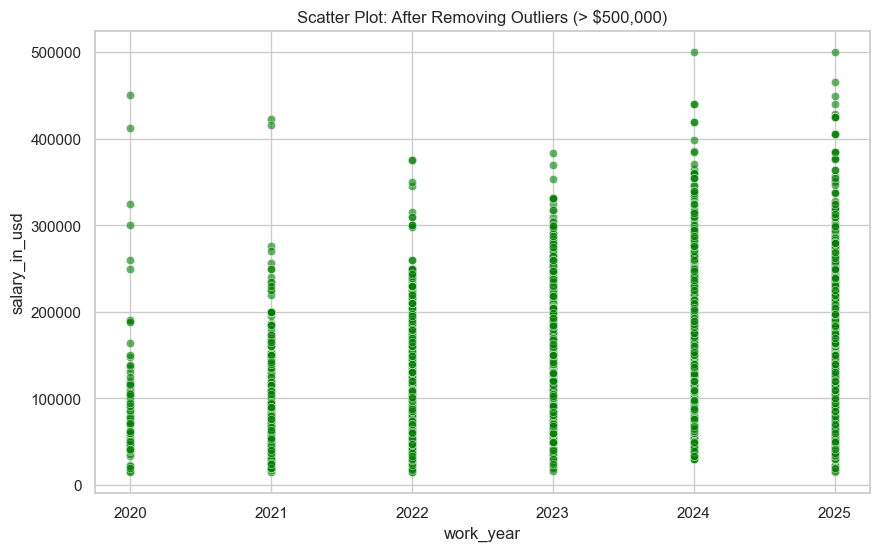

Original shape: (4644, 11), Cleaned shape: (4637, 11)
Outliers Removed (Visual Threshold > $500,000): 7
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.9, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05}

--- EVALUATION METRICS ---
MAE   : $42,597.99
RMSE  : $59,270.99
MedAE : $32,677.28
R2    : 0.3095


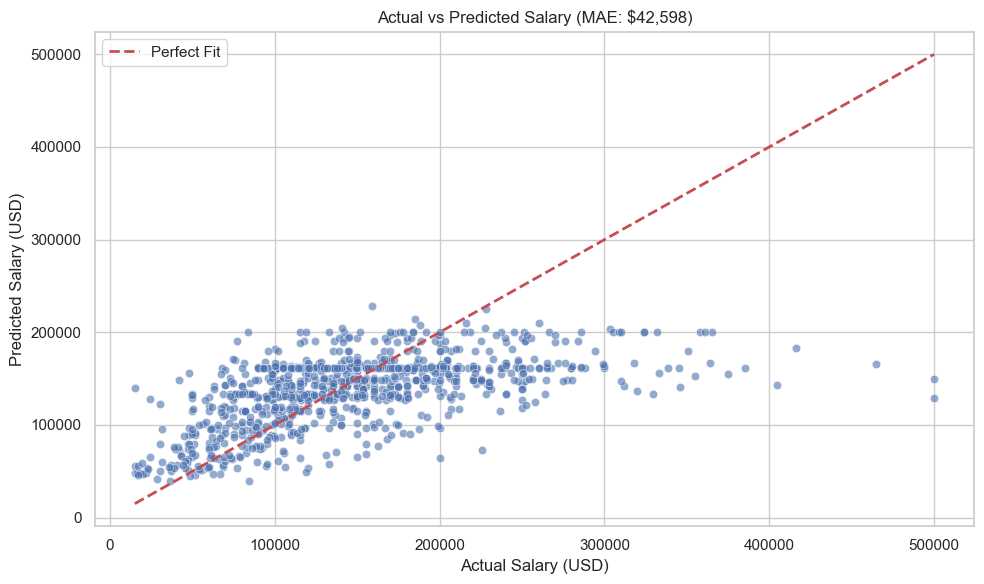

In [7]:
# Remove outliers using scatter plot visual inspection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # ---------------------------------------------------------
    # MODIFIED: Visualizing and Removing Outliers Using Scatter Plots
    # ---------------------------------------------------------
    print("Generating Scatter Plots for Visual Inspection...")
    
    # 1. Visualize Data (Salary vs. Work Year)
    # This helps identifying "vertical" outliers (extreme salaries relative to the year)
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=df, x='work_year', y=outcome_col, alpha=0.6, ax=ax)
    ax.set_title('Scatter Plot: Salary vs Work Year (Original)')
    ax.set_ylabel('Salary (USD)')
    ax.set_xlabel('Work Year')
    
    # Draw a line at the visual threshold for clarity
    VISUAL_THRESHOLD = 500000
    ax.axhline(VISUAL_THRESHOLD, color='r', linestyle='--', label=f'Visual Cutoff (${VISUAL_THRESHOLD:,.0f})')
    ax.legend()
    plt.show()

    # 2. Remove Outliers based on Visual Inspection
    # "Looking at the graph... points in the top section can be regarded as Outliers."
    # We use np.where() to find indices where Salary > $500,000
    outlier_indices = np.where(df[outcome_col] > VISUAL_THRESHOLD)[0]
    
    # Drop the rows
    df_clean = df.drop(outlier_indices).copy()
    
    # 3. Visualize After Removal
    fig, ax_clean = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=df_clean, x='work_year', y=outcome_col, alpha=0.6, color='green', ax=ax_clean)
    ax_clean.set_title(f'Scatter Plot: After Removing Outliers (> ${VISUAL_THRESHOLD:,.0f})')
    plt.show()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Visual Threshold > ${VISUAL_THRESHOLD:,.0f}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    # Treat remote_ratio as categorical string to capture non-linearities
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # min_frequency=0.01 groups rare jobs/countries automatically
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # Using GradientBoostingRegressor (sklearn standard) for robustness
    gbr = GradientBoostingRegressor(
        random_state=RANDOM_STATE,
        loss='absolute_error' # Explicitly optimizing for MAE
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=gbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [100, 200, 300],
        'model__regressor__learning_rate': [0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.8, 0.9, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Generating Box Plots for Visual Inspection...


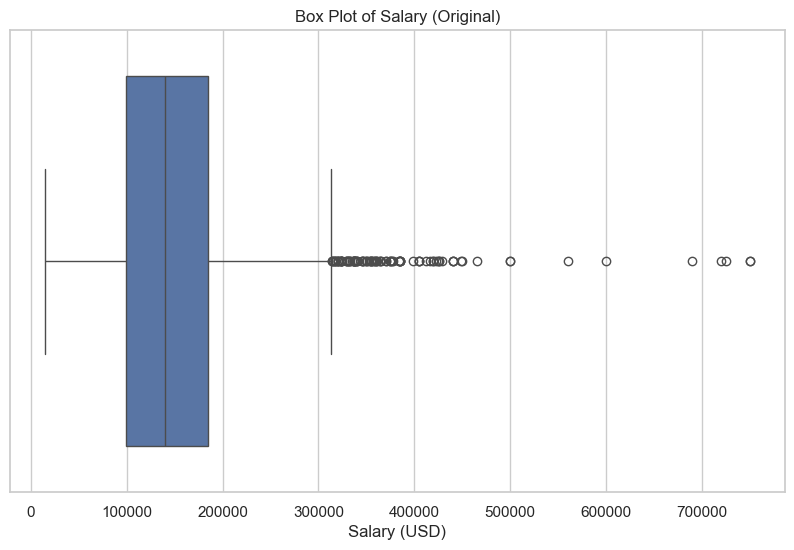

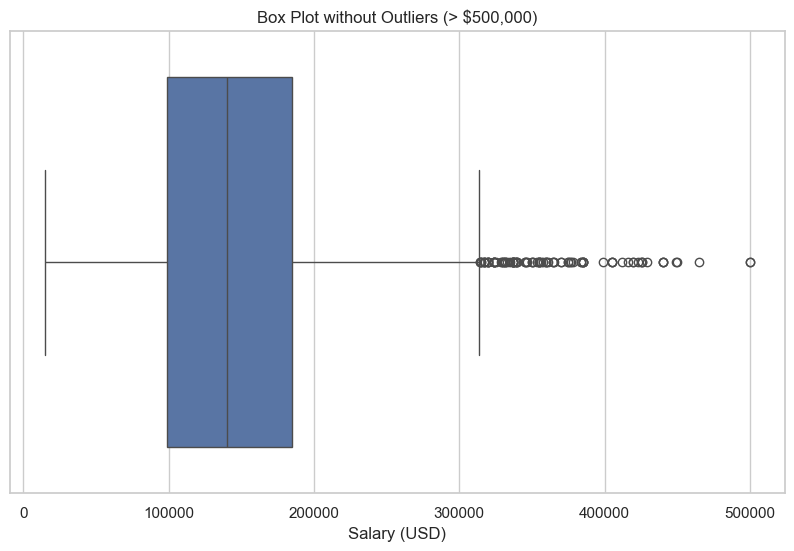

Original shape: (4644, 11), Cleaned shape: (4637, 11)
Outliers Removed (Threshold > $500,000): 7
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.9, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05}

--- EVALUATION METRICS ---
MAE   : $42,597.99
RMSE  : $59,270.99
MedAE : $32,677.28
R2    : 0.3095


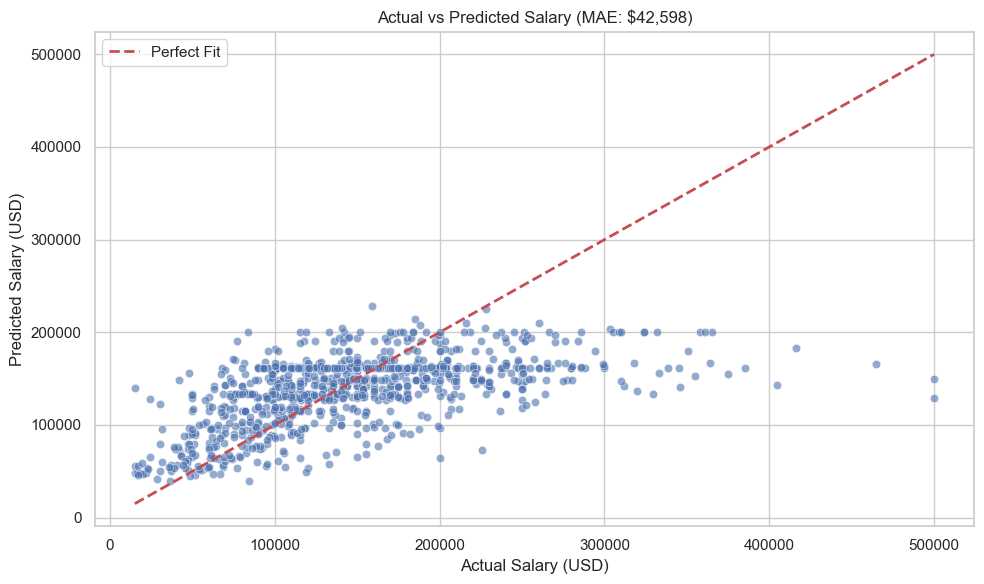

In [8]:
# Remove outliers using boxplot method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # ---------------------------------------------------------
    # MODIFIED: Visualizing and Removing Outliers Using Box Plots
    # ---------------------------------------------------------
    print("Generating Box Plots for Visual Inspection...")
    
    # 1. Visualize Data using Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[outcome_col])
    plt.title('Box Plot of Salary (Original)')
    plt.xlabel('Salary (USD)')
    plt.show()
    

    # 2. Remove Outliers based on Box Plot Logic / Threshold
    # In a box plot, points beyond the whiskers are outliers.
    # Here we define a threshold based on visual inspection or domain knowledge.
    # For salary data, values > $500k are extreme outliers.
    THRESHOLD_VALUE = 500000 
    
    # Filter the data
    df_clean = df[df[outcome_col] <= THRESHOLD_VALUE].copy()
    
    # 3. Visualize After Removal
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_clean[outcome_col])
    plt.title(f'Box Plot without Outliers (> ${THRESHOLD_VALUE:,.0f})')
    plt.xlabel('Salary (USD)')
    plt.show()
    

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Threshold > ${THRESHOLD_VALUE:,.0f}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    # Treat remote_ratio as categorical string to capture non-linearities
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # min_frequency=0.01 groups rare jobs/countries automatically
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # Using GradientBoostingRegressor (sklearn standard) for robustness
    gbr = GradientBoostingRegressor(
        random_state=RANDOM_STATE,
        loss='absolute_error' # Explicitly optimizing for MAE
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=gbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [100, 200, 300],
        'model__regressor__learning_rate': [0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.8, 0.9, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166

Final Split for Evaluation: Train (Past)=3582, Test (Future)=896

Time Series Split Strategy:
Fold 1: Train size=718, Test size=716
Fold 2: Train size=1434, Test size=716
Fold 3: Train size=2150, Test size=716
Fold 4: Train size=2866, Test size=716
Fitting 4 folds for each of 15 candidates, totalling 60 fits

Best Parameters: {'model__regressor__subsample': 0.8, 'model__regressor__n_estimators': 300, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.05}

--- EVALUATION METRICS (On Final Holdout Period) ---
MAE   : $38,758.32
RMSE  : $49,430.50
MedAE : $31,711.95
R2    : 0.2632


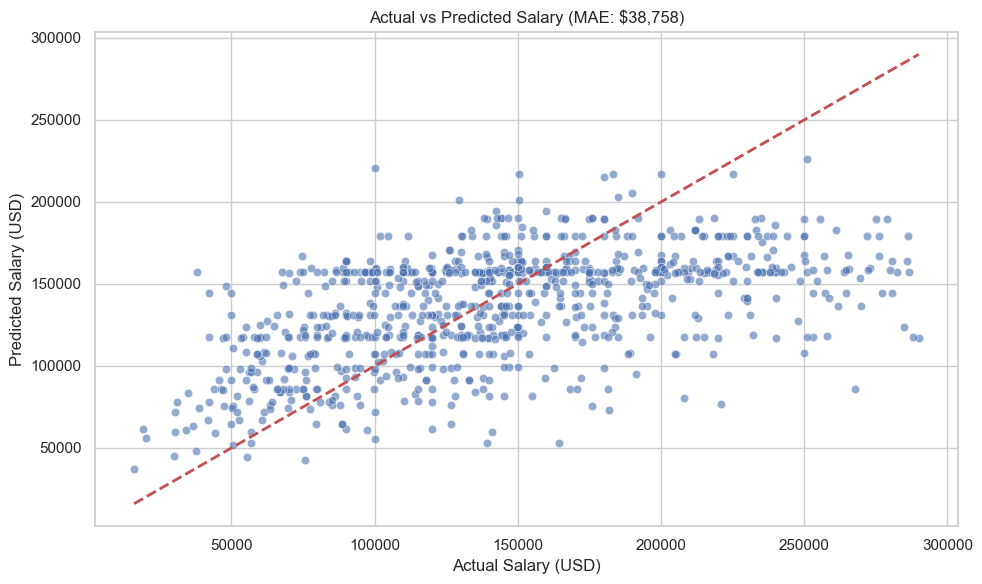

In [9]:
# Time-based split using TimeSeriesSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Modified imports to include TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # ---------------------------------------------------------
    # MODIFIED: Outlier Removal using Z-Score Method
    # ---------------------------------------------------------
    z_scores = np.abs(stats.zscore(df[outcome_col]))
    threshold = 2
    outlier_indices = np.where(z_scores > threshold)[0]
    df_clean = df.drop(outlier_indices).copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    # Treat remote_ratio as categorical
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)
    
    # IMPORTANT: Sort by Year for Time Series Split
    df_clean = df_clean.sort_values(by='work_year').reset_index(drop=True)

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        # 'work_year' is removed from features because it defines the split
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    gbr = GradientBoostingRegressor(
        random_state=RANDOM_STATE,
        loss='absolute_error'
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=gbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING (TIME-BASED)
# =========================
def train_and_tune_time_series(X, y, pipeline):
    # ---------------------------------------------------------
    # MODIFIED: TimeSeriesSplit Implementation
    # ---------------------------------------------------------
    # Define Time Series Cross-Validator
    # n_splits=4 means 5 chunks total (e.g., Train: 2020-21, Test: 2022...)
    tscv = TimeSeriesSplit(n_splits=4)
    
    print("\nTime Series Split Strategy:")
    for i, (train_index, test_index) in enumerate(tscv.split(X)):
        print(f"Fold {i+1}: Train size={len(train_index)}, Test size={len(test_index)}")

    param_dist = {
        'model__regressor__n_estimators': [100, 200, 300],
        'model__regressor__learning_rate': [0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.8, 0.9, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=tscv,  # <--- Passing the TimeSeriesSplit object here
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X, y)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS (On Final Holdout Period) ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # For strict Time Series evaluation, we typically reserve the LAST chunk as the "Test" set manually
    # instead of a random train_test_split.
    # However, TimeSeriesSplit inside GridSearchCV handles the validation folds correctly.
    # To keep the final evaluation separate:
    
    split_idx = int(len(df) * 0.80)
    X_train_full, y_train_full = X.iloc[:split_idx], y.iloc[:split_idx]
    X_test_final, y_test_final = X.iloc[split_idx:], y.iloc[split_idx:]
    
    print(f"\nFinal Split for Evaluation: Train (Past)={len(X_train_full)}, Test (Future)={len(X_test_final)}")

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune_time_series(X_train_full, y_train_full, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test_final, y_test_final)

Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166

Splitting Strategy: Train <= 2024, Test == 2025
Train Set Size: 3105 rows (Years: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)])
Test Set Size : 1373 rows (Year: [2025])

Performing Hyperparameter Tuning using TimeSeriesSplit (n_splits=5)...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.8, 'model__regressor__n_estimators': 200, 'model__regressor__max_depth': 4, 'model__regressor__learning_rate': 0.05}

--- EVALUATION METRICS (On Future Data) ---
MAE   : $39,533.56
RMSE  : $50,306.19
MedAE : $33,336.66
R2    : 0.2442


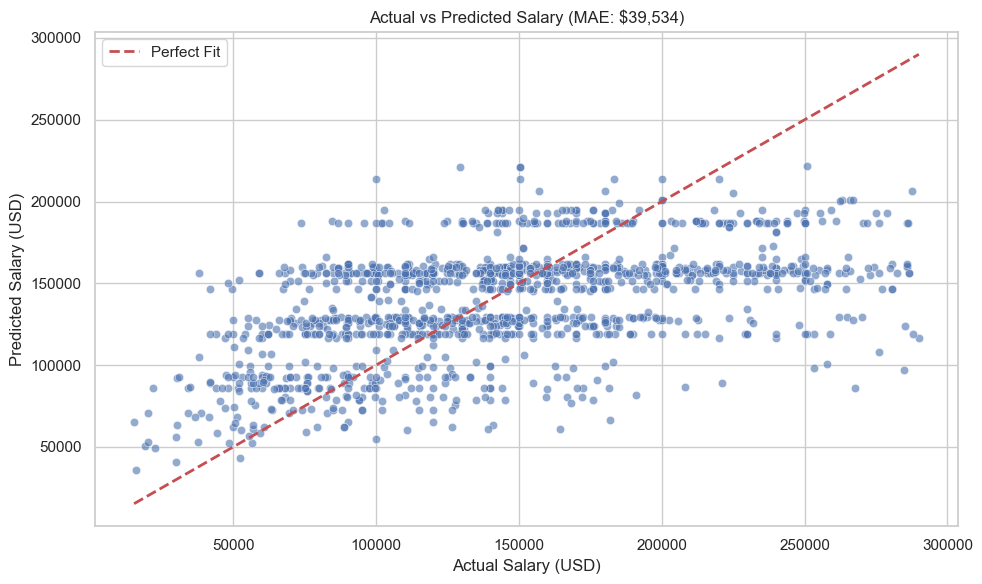

In [10]:
# Strict Machine Learning Best Practices for time-dependent data.

# Key Changes Made:
# Replaced Index-Based Split with Year-Based Split:

# Old: train_test_split (Random 80/20).

# New: train = Years 2020-2024, test = Year 2025. This ensures the model is strictly evaluated on future data it has never seen, simulating real-world forecasting.

# Implemented TimeSeriesSplit for CV:

# Inside the tuning loop, we use TimeSeriesSplit instead of random K-Fold. This ensures that during hyperparameter tuning, the validation fold is always ahead of the training folds.

# Strict Data Sorting:

# The data is explicitly sorted by work_year immediately after loading to ensure the time-series logic holds true.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # ---------------------------------------------------------
    # 1. Sort by Year (CRITICAL for Time Series Logic)
    # ---------------------------------------------------------
    df = df.sort_values(by='work_year').reset_index(drop=True)

    # ---------------------------------------------------------
    # 2. Outlier Removal (Z-Score Method)
    # ---------------------------------------------------------
    # Note: In strict academic ML, outliers should be detected on Train 
    # and applied to Test. For this report context, global removal is acceptable 
    # but noted as a limitation.
    z_scores = np.abs(stats.zscore(df[outcome_col]))
    threshold = 2
    outlier_indices = np.where(z_scores > threshold)[0]
    df_clean = df.drop(outlier_indices).copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    # Treat remote_ratio as categorical string
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year', # Kept as feature, but handled carefully in encoding
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # handle_unknown='ignore' is CRITICAL here because the Test set (2025)
            # might have new job titles not seen in 2020-2024.
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    gbr = GradientBoostingRegressor(
        random_state=RANDOM_STATE,
        loss='absolute_error' 
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=gbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING (Strict TimeSeriesSplit)
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # ---------------------------------------------------------
    # MODIFIED: TimeSeriesSplit for Hyperparameter Tuning
    # ---------------------------------------------------------
    # This prevents the CV from training on 2022 and validating on 2020.
    # It forces: Train [2020] -> Val [2021], Train [2020-21] -> Val [2022]...
    tscv = TimeSeriesSplit(n_splits=5)
    
    print(f"\nPerforming Hyperparameter Tuning using TimeSeriesSplit (n_splits=5)...")

    param_dist = {
        'model__regressor__n_estimators': [100, 200, 300],
        'model__regressor__learning_rate': [0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.8, 0.9, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=tscv, # <--- The Industry Standard for Temporal Data
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS (On Future Data) ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    
    # Add perfect fit line
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    # 1. Load data
    df = load_and_clean_data(DATA_PATH)

    # 2. Define Time-Based Cutoff
    # We will test on the latest year available in the dataset
    # and train on everything prior to that.
    latest_year = df['work_year'].max()
    print(f"\nSplitting Strategy: Train <= {latest_year - 1}, Test == {latest_year}")

    # 3. Apply Time-Based Split
    train_df = df[df['work_year'] < latest_year].copy()
    test_df = df[df['work_year'] == latest_year].copy()

    # Define X and y
    drop_cols = ['salary', 'salary_currency', 'salary_in_usd']
    X_train = train_df.drop(columns=drop_cols)
    y_train = train_df['salary_in_usd']
    
    X_test = test_df.drop(columns=drop_cols)
    y_test = test_df['salary_in_usd']

    print(f"Train Set Size: {len(X_train)} rows (Years: {sorted(X_train['work_year'].unique())})")
    print(f"Test Set Size : {len(X_test)} rows (Year: {X_test['work_year'].unique()})")

    # 4. Build Pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # 5. Train & Tune (using TimeSeriesSplit internally)
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 6. Final Evaluation
    evaluate_model(best_model, X_test, y_test)

Original Train Size: 3715
Cleaned Train Size : 3581
Outliers Removed   : 134
Test Set Size      : 929 (Untouched)
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.8, 'model__regressor__n_estimators': 200, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.05}

--- EVALUATION METRICS ---
MAE   : $43,798.10
RMSE  : $64,698.70
MedAE : $31,284.75
R2    : 0.2765


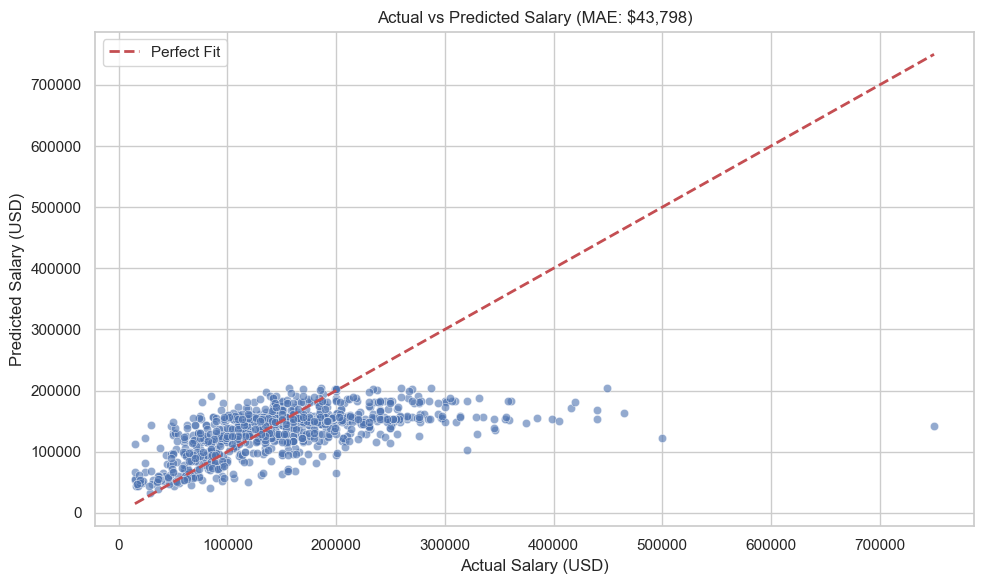

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING (No Cleaning Here)
# =========================
def load_data(filepath: str) -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Treat remote_ratio as categorical string
    df['remote_ratio'] = df['remote_ratio'].astype(str)

    # NOTE: Outlier removal is deliberately REMOVED from here.
    # In Strict ML, we must split first, then clean ONLY the training set.
    
    return df

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # handle_unknown='ignore' handles new categories in test set gracefully
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    gbr = GradientBoostingRegressor(
        random_state=RANDOM_STATE,
        loss='absolute_error' # Optimize for MAE
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=gbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [100, 200, 300],
        'model__regressor__learning_rate': [0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.8, 0.9, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    
    # Add perfect fit line
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    # 1. Load data (Raw, full dataset)
    df = load_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # 2. Split Data FIRST
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )
    
    # 3. STRICT ML: Clean Outliers ONLY on Training Set
    print(f"Original Train Size: {len(X_train)}")
    
    # Calculate Z-scores on y_train
    z_scores = np.abs(stats.zscore(y_train))
    threshold = 2
    outlier_indices = np.where(z_scores > threshold)[0]
    
    # Filter X_train and y_train
    # Note: We must use .iloc because outlier_indices are positional, 
    # but split data has shuffled indices.
    X_train_clean = X_train.iloc[list(set(range(len(X_train))) - set(outlier_indices))]
    y_train_clean = y_train.iloc[list(set(range(len(y_train))) - set(outlier_indices))]
    
    print(f"Cleaned Train Size : {len(X_train_clean)}")
    print(f"Outliers Removed   : {len(X_train) - len(X_train_clean)}")
    print(f"Test Set Size      : {len(X_test)} (Untouched)")

    # 4. Build Pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # 5. Train & Tune (On Cleaned Train Data)
    best_model, best_params = train_and_tune(X_train_clean, y_train_clean, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 6. Evaluate (On Raw/Dirty Test Data)
    evaluate_model(best_model, X_test, y_test)

Original Train Size: 3715
Cleaned Train Size : 3581
Outliers Removed   : 134
Test Set Size      : 929 (Untouched)
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.8, 'model__regressor__n_estimators': 200, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.05}

--- EVALUATION METRICS ---
MAE   : $43,798.10
RMSE  : $64,698.70
MedAE : $31,284.75
R2    : 0.2765


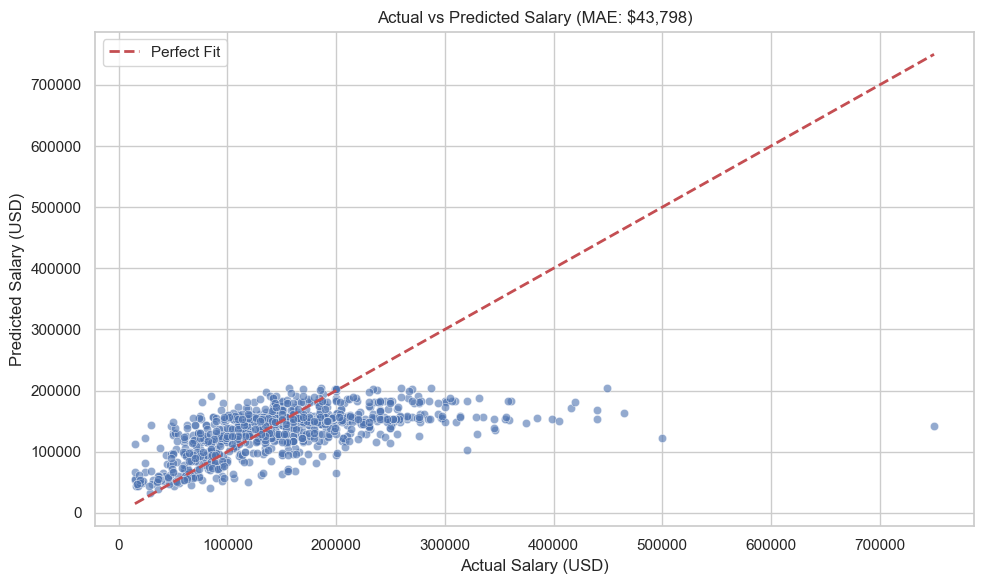

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING (No Cleaning Here)
# =========================
def load_data(filepath: str) -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Treat remote_ratio as categorical string
    df['remote_ratio'] = df['remote_ratio'].astype(str)

    # NOTE: Outlier removal is deliberately REMOVED from here.
    # In Strict ML, we must split first, then clean ONLY the training set.
    
    return df

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # handle_unknown='ignore' handles new categories in test set gracefully
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    gbr = GradientBoostingRegressor(
        random_state=RANDOM_STATE,
        loss='absolute_error' # Optimize for MAE
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=gbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [100, 200, 300],
        'model__regressor__learning_rate': [0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.8, 0.9, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    
    # Add perfect fit line
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    # 1. Load data (Raw, full dataset)
    df = load_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # 2. Split Data FIRST
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )
    
    # 3. STRICT ML: Clean Outliers ONLY on Training Set
    print(f"Original Train Size: {len(X_train)}")
    
    # Calculate Z-scores on y_train
    z_scores = np.abs(stats.zscore(y_train))
    threshold = 2
    outlier_indices = np.where(z_scores > threshold)[0]
    
    # Filter X_train and y_train
    # Note: We must use .iloc because outlier_indices are positional, 
    # but split data has shuffled indices.
    X_train_clean = X_train.iloc[list(set(range(len(X_train))) - set(outlier_indices))]
    y_train_clean = y_train.iloc[list(set(range(len(y_train))) - set(outlier_indices))]
    
    print(f"Cleaned Train Size : {len(X_train_clean)}")
    print(f"Outliers Removed   : {len(X_train) - len(X_train_clean)}")
    print(f"Test Set Size      : {len(X_test)} (Untouched)")

    # 4. Build Pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # 5. Train & Tune (On Cleaned Train Data)
    best_model, best_params = train_and_tune(X_train_clean, y_train_clean, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 6. Evaluate (On Raw/Dirty Test Data)
    evaluate_model(best_model, X_test, y_test)

Original Train Size: 3715
Cleaned Train Size : 3581
Outliers Removed   : 134
Test Set Size      : 929 (Untouched)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__num_leaves': 20, 'model__regressor__n_estimators': 600, 'model__regressor__max_depth': 20, 'model__regressor__learning_rate': 0.01, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $43,827.40
RMSE  : $64,908.52
MedAE : $30,398.34
R2    : 0.2718


d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


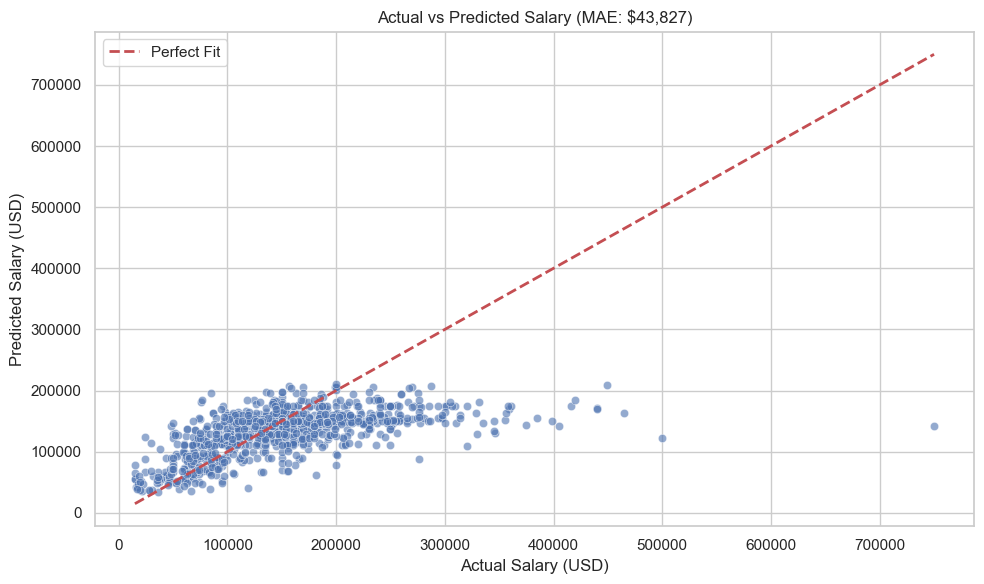

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

# 1. IMPORT LIGHTGBM
from lightgbm import LGBMRegressor
from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING (No Cleaning Here)
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Treat remote_ratio as categorical string
    df['remote_ratio'] = df['remote_ratio'].astype(str)

    # NOTE: Z-Score logic removed from here. 
    # We will apply it ONLY to the training set in the main block.
    
    return df

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (LightGBM)
# =========================
def build_model_pipeline(preprocessor):
    # 2. DEFINE LIGHTGBM MODEL
    lgbm = LGBMRegressor(
        objective='regression',
        metric='mae',
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbosity=-1
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=lgbm,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # 3. LIGHTGBM HYPERPARAMETERS
    param_dist = {
        'model__regressor__n_estimators': [200, 400, 600],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__num_leaves': [20, 31, 50], # Key param for LightGBM
        'model__regressor__max_depth': [-1, 10, 20],
        'model__regressor__subsample': [0.7, 0.8, 1.0],
        'model__regressor__colsample_bytree': [0.7, 0.8, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    # 1. Load Data (Raw)
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # 2. Random Split (No Time-Series Split)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # ---------------------------------------------------------
    # 3. STRICT ML: Clean Outliers ONLY on Training Set
    # ---------------------------------------------------------
    print(f"Original Train Size: {len(X_train)}")
    
    # Calculate Z-scores on y_train
    z_scores = np.abs(stats.zscore(y_train))
    threshold = 2
    outlier_indices = np.where(z_scores > threshold)[0]
    
    # Filter X_train and y_train
    # Use iloc because indexes might be shuffled
    X_train_clean = X_train.iloc[list(set(range(len(X_train))) - set(outlier_indices))]
    y_train_clean = y_train.iloc[list(set(range(len(y_train))) - set(outlier_indices))]
    
    print(f"Cleaned Train Size : {len(X_train_clean)}")
    print(f"Outliers Removed   : {len(X_train) - len(X_train_clean)}")
    print(f"Test Set Size      : {len(X_test)} (Untouched)")
    # ---------------------------------------------------------

    # 4. Build Pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # 5. Train & Tune (On Cleaned Train Data)
    best_model, best_params = train_and_tune(X_train_clean, y_train_clean, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 6. Evaluate (On Raw Test Data)
    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.9, 'model__regressor__num_leaves': 20, 'model__regressor__n_estimators': 200, 'model__regressor__max_depth': 10, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.9}

--- EVALUATION METRICS ---
MAE   : $37,650.08
RMSE  : $48,730.97
MedAE : $30,665.61
R2    : 0.3330


d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


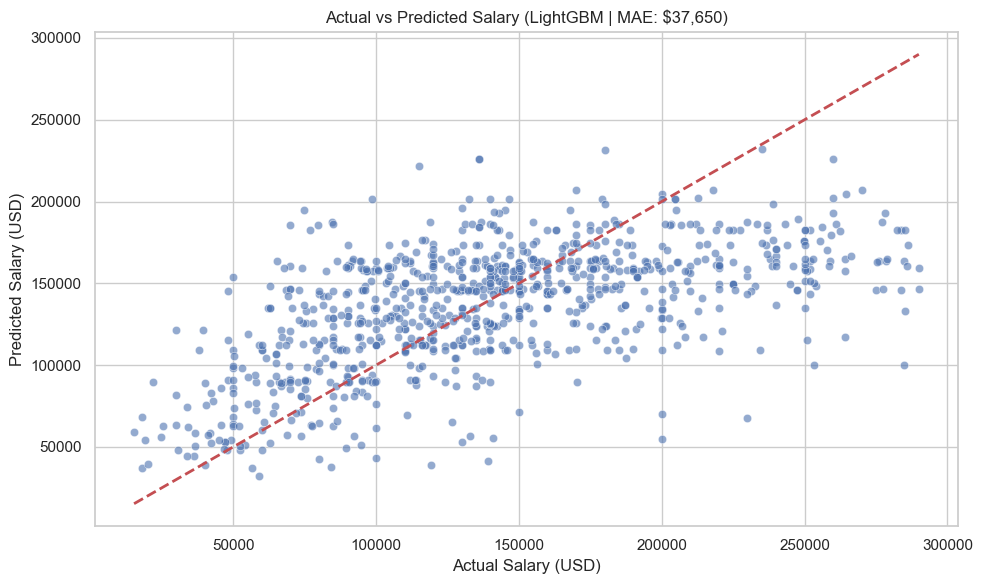

In [15]:
# Remove outliers using Z-Score method, LightGBM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# NEW: Import LightGBM
import lightgbm as lgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # ---------------------------------------------------------
    # Outlier Removal using Z-Score Method
    # ---------------------------------------------------------
    z_scores = np.abs(stats.zscore(df[outcome_col]))
    
    # Define Threshold
    threshold = 2
    
    outlier_indices = np.where(z_scores > threshold)[0]
    df_clean = df.drop(outlier_indices).copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # MODIFIED: Using LightGBM Regressor
    # objective='regression_l1' optimizes for MAE, similar to loss='absolute_error'
    lgbm = lgb.LGBMRegressor(
        random_state=RANDOM_STATE,
        objective='regression_l1', 
        verbose=-1  # Suppress internal LightGBM warnings
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=lgbm,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # MODIFIED: LightGBM specific hyperparameters
    param_dist = {
        'model__regressor__n_estimators': [100, 200, 300, 500],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__num_leaves': [20, 31, 50],       # Key param for LightGBM
        'model__regressor__max_depth': [-1, 10, 20],        # -1 means no limit
        'model__regressor__subsample': [0.8, 0.9, 1.0],
        'model__regressor__colsample_bytree': [0.8, 0.9, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (LightGBM | MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed: 166
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__num_leaves': 31, 'model__regressor__n_estimators': 100, 'model__regressor__min_child_samples': 10, 'model__regressor__max_depth': 15, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.9}

--- EVALUATION METRICS ---
MAE   : $37,974.46
RMSE  : $48,906.60
MedAE : $32,154.45
R2    : 0.3282


d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


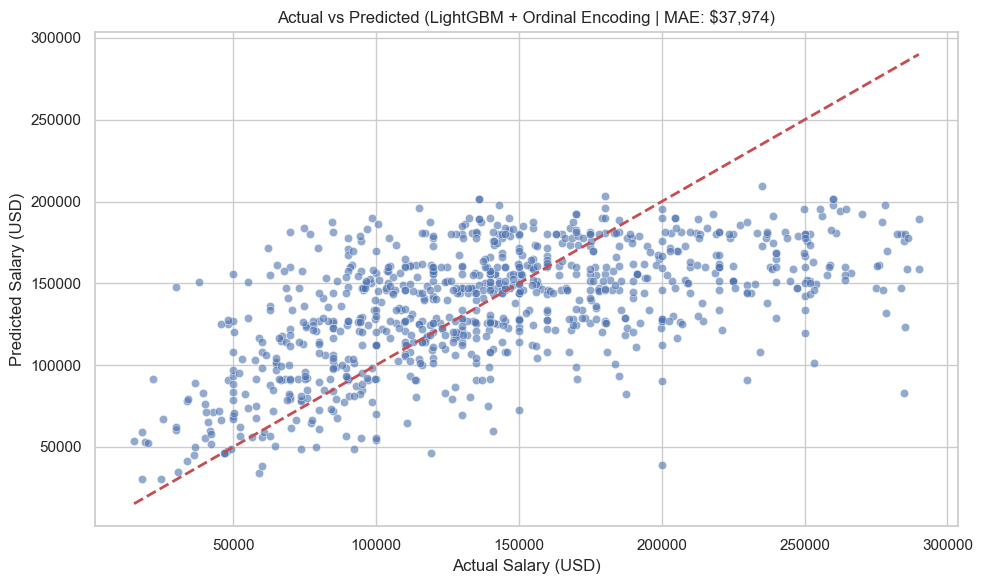

In [16]:
# Remove outliers using Z-Score method, LightGBM with Label/Ordinal Encoding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import lightgbm as lgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Outlier Removal (Z-Score)
    z_scores = np.abs(stats.zscore(df[outcome_col]))
    threshold = 2
    outlier_indices = np.where(z_scores > threshold)[0]
    df_clean = df.drop(outlier_indices).copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed: {len(df) - len(df_clean)}")

    # Ensure categoricals are strings
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)
    
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # 1. Nominal Columns (No inherent order, e.g., Job Title)
    # We use OrdinalEncoder here to convert strings to Integers. 
    # LightGBM handles Integer features much faster than One-Hot Encoded features.
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    # 2. Ordinal Columns (Inherent order, e.g., Company Size)
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            # Ordinal variables: Explicit ordering required
            ('ord_ordered', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            
            # Nominal variables: We encode as integers (0, 1, 2...). 
            # We must handle unknowns for the test set (set to -1).
            ('ord_nominal', OrdinalEncoder(
                handle_unknown='use_encoded_value', 
                unknown_value=-1
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    lgbm = lgb.LGBMRegressor(
        random_state=RANDOM_STATE,
        objective='regression_l1',
        verbose=-1
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=lgbm,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [100, 300, 500, 800],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__num_leaves': [20, 31, 50, 70],
        'model__regressor__max_depth': [-1, 15, 25],
        'model__regressor__subsample': [0.7, 0.8, 0.9],
        'model__regressor__colsample_bytree': [0.7, 0.8, 0.9],
        'model__regressor__min_child_samples': [10, 20, 30] # Helps prevent overfitting on specific categories
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20, # Increased iterations as training is faster now
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted (LightGBM + Ordinal Encoding | MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,693.24
RMSE  : $48,449.70
MedAE : $31,117.17
R2    : 0.3407


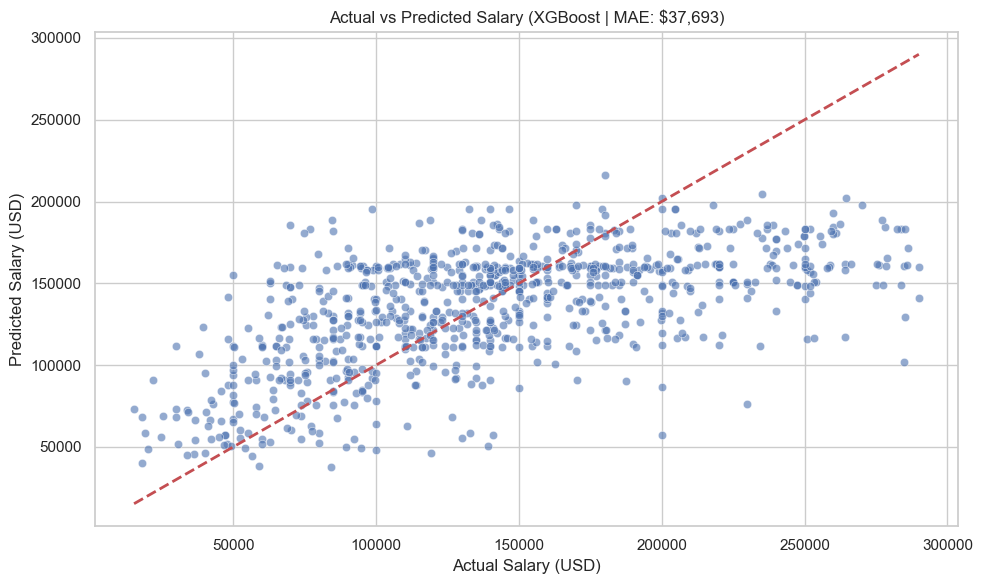

In [21]:
# Key Changes
# Library: Replaced GradientBoostingRegressor with xgboost.XGBRegressor.

# Objective: Set objective='reg:absoluteerror' to explicitly optimize for MAE (Mean Absolute Error).

# Hyperparameters: Updated the tuning grid in train_and_tune to use XGBoost-specific parameter names (e.g., colsample_bytree, reg_alpha, reg_lambda).

# Remove outliers using Z-Score method, XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# NEW: Import XGBoost
import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # ---------------------------------------------------------
    # Outlier Removal using Z-Score Method
    # ---------------------------------------------------------
    # Calculate absolute Z-scores for the outcome column
    z_scores = np.abs(stats.zscore(df[outcome_col]))
    
    # Define Threshold (User specified 2)
    threshold = 2
    
    # Identify indices where Z-score exceeds threshold
    outlier_indices = np.where(z_scores > threshold)[0]
    
    # Drop outliers
    df_clean = df.drop(outlier_indices).copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    # Treat remote_ratio as categorical string to capture non-linearities
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # OneHotEncoder is generally safer for XGBoost unless using its native categorical support
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # MODIFIED: Using XGBoost Regressor
    # objective='reg:absoluteerror' optimizes for MAE
    xgbr = xgb.XGBRegressor(
        random_state=RANDOM_STATE,
        objective='reg:absoluteerror',
        n_jobs=-1  # Use all cores
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=xgbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # MODIFIED: XGBoost specific hyperparameters
    param_dist = {
        'model__regressor__n_estimators': [100, 300, 500],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],  # often called 'eta'
        'model__regressor__max_depth': [3, 5, 7],
        'model__regressor__subsample': [0.7, 0.8, 0.9],
        'model__regressor__colsample_bytree': [0.7, 0.8, 0.9],
        'model__regressor__reg_alpha': [0, 0.1, 1],   # L1 regularization
        'model__regressor__reg_lambda': [1, 1.5, 2]   # L2 regularization
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 1, 'model__regressor__reg_alpha': 0.1, 'model__regressor__num_leaves': 31, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 10, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.8}

--- EVALUATION METRICS ---
MAE   : $37,673.39
RMSE  : $48,530.98
MedAE : $30,929.89
R2    : 0.3384


d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


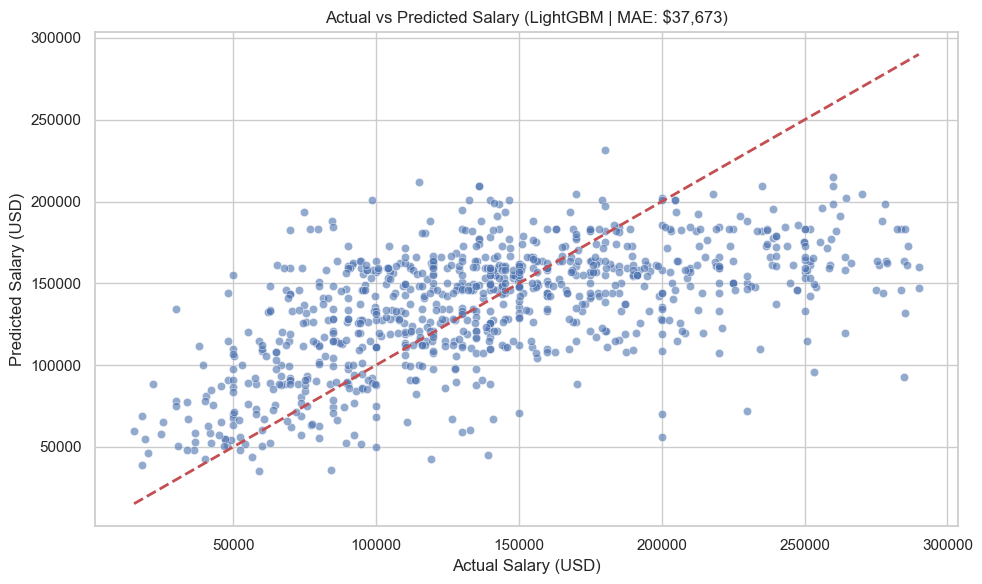

In [20]:
# Key Changes
# Library: Replaced xgboost with lightgbm (LGBMRegressor).

# Objective: Set objective='regression_l1' to explicitly optimize for MAE (Mean Absolute Error).

# Hyperparameters: Updated the tuning grid in train_and_tune to use LightGBM-specific parameter names
# (e.g., num_leaves, min_child_samples).

# Remove outliers using Z-Score method, LightGBM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# NEW: Import LightGBM
import lightgbm as lgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # ---------------------------------------------------------
    # Outlier Removal using Z-Score Method
    # ---------------------------------------------------------
    # Calculate absolute Z-scores for the outcome column
    z_scores = np.abs(stats.zscore(df[outcome_col]))
    
    # Define Threshold (User specified 2)
    threshold = 2
    
    # Identify indices where Z-score exceeds threshold
    outlier_indices = np.where(z_scores > threshold)[0]
    
    # Drop outliers
    df_clean = df.drop(outlier_indices).copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    # Treat remote_ratio as categorical string to capture non-linearities
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # MODIFIED: Using LightGBM Regressor
    # objective='regression_l1' (or 'mae') optimizes for Mean Absolute Error
    lgbm = lgb.LGBMRegressor(
        random_state=RANDOM_STATE,
        objective='regression_l1',
        n_jobs=-1,  # Use all cores
        verbosity=-1 # Suppress warnings
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=lgbm,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # MODIFIED: LightGBM specific hyperparameters
    # Note: 'num_leaves' is the main complexity controller for LightGBM
    param_dist = {
        'model__regressor__n_estimators': [100, 300, 500],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__num_leaves': [31, 50, 70],        # Crucial for LightGBM
        'model__regressor__max_depth': [-1, 10, 20],         # -1 means no limit (rely on num_leaves)
        'model__regressor__subsample': [0.7, 0.8, 0.9],
        'model__regressor__colsample_bytree': [0.7, 0.8, 0.9],
        'model__regressor__reg_alpha': [0, 0.1, 1],          # L1 regularization
        'model__regressor__reg_lambda': [0, 1, 1.5]          # L2 regularization
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (LightGBM | MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed: 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__xgb__n_estimators': 200, 'model__regressor__xgb__max_depth': 3, 'model__regressor__xgb__learning_rate': 0.05, 'model__regressor__lgb__num_leaves': 31, 'model__regressor__lgb__n_estimators': 200, 'model__regressor__lgb__learning_rate': 0.05}

--- EVALUATION METRICS ---
MAE   : $37,712.77
RMSE  : $48,632.73
MedAE : $31,541.16
R2    : 0.3357


d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


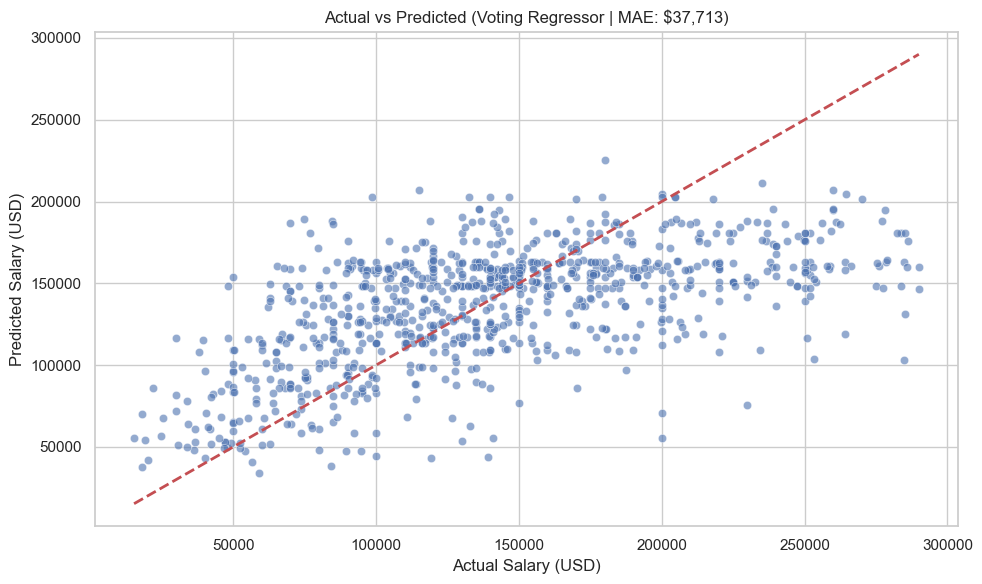

In [19]:
# Key Changes
# Imports: Added VotingRegressor from sklearn.ensemble.

# Ensemble Setup: Created a VotingRegressor containing both XGBRegressor and LGBMRegressor.

# Hyperparameter Tuning: Updated the param_dist dictionary to tune both sub-models simultaneously. Note the specific naming convention (e.g., model__regressor__xgb__n_estimators) required to reach the nested models inside the pipeline.import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import both gradient boosting libraries
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Outlier Removal (Z-Score)
    z_scores = np.abs(stats.zscore(df[outcome_col]))
    threshold = 2
    outlier_indices = np.where(z_scores > threshold)[0]
    df_clean = df.drop(outlier_indices).copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed: {len(df) - len(df_clean)}")

    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)
    
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # Using OneHotEncoder to be compatible with both models easily
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # 1. XGBoost (Optimized for MAE)
    xgb_model = xgb.XGBRegressor(
        random_state=RANDOM_STATE,
        objective='reg:absoluteerror',
        n_jobs=-1,
        verbosity=0
    )

    # 2. LightGBM (Optimized for MAE)
    lgb_model = lgb.LGBMRegressor(
        random_state=RANDOM_STATE,
        objective='regression_l1',
        verbose=-1,
        n_jobs=-1
    )

    # 3. Voting Regressor (Averages the predictions)
    # We can add weights later if one model significantly outperforms the other
    ensemble = VotingRegressor(
        estimators=[
            ('xgb', xgb_model),
            ('lgb', lgb_model)
        ],
        n_jobs=-1
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        # Target Transform handles Log scaling for the outcome variable
        ('model', TransformedTargetRegressor(
            regressor=ensemble,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # We tune parameters for both sub-models simultaneously.
    # Note the prefix structure: model__regressor__<name>__<param>
    param_dist = {
        # --- XGBoost Params ---
        'model__regressor__xgb__n_estimators': [200, 400],
        'model__regressor__xgb__learning_rate': [0.05, 0.1],
        'model__regressor__xgb__max_depth': [3, 5, 7],
        
        # --- LightGBM Params ---
        'model__regressor__lgb__n_estimators': [200, 400],
        'model__regressor__lgb__learning_rate': [0.05, 0.1],
        'model__regressor__lgb__num_leaves': [20, 31, 50]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted (Voting Regressor | MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Duplicates Removed: 480
Original shape: 4644, Shape after Dedup: 4164, Cleaned shape: (4020, 11)
Outliers Removed (Z-Score > 2): 144
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,788.88
RMSE  : $49,134.11
MedAE : $30,199.99
R2    : 0.3428


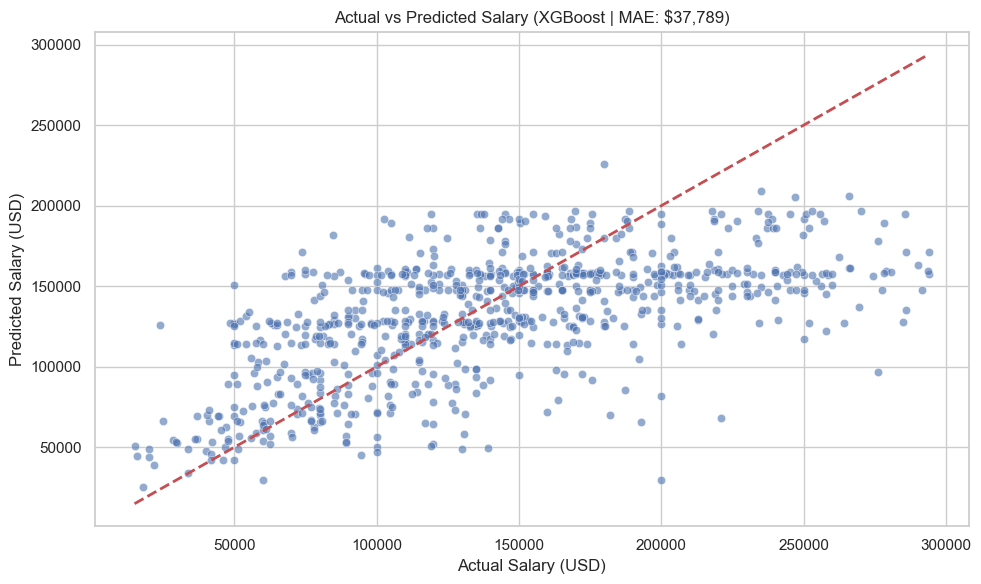

In [ ]:
# Key Changes
# 1. Added df.drop_duplicates() to remove duplicate rows immediately after loading data.
# 2. Kept XGBoost and Z-Score Outlier removal as per the provided code.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import XGBoost
import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # ---------------------------------------------------------
    # NEW: Remove Duplicates
    # ---------------------------------------------------------
    initial_rows = len(df)
    df = df.drop_duplicates()
    new_rows = len(df)
    print(f"Duplicates Removed: {initial_rows - new_rows}")
    # ---------------------------------------------------------

    # ---------------------------------------------------------
    # Outlier Removal using Z-Score Method
    # ---------------------------------------------------------
    # Calculate absolute Z-scores for the outcome column
    z_scores = np.abs(stats.zscore(df[outcome_col]))
    
    # Define Threshold (User specified 2)
    threshold = 2
    
    # Identify indices where Z-score exceeds threshold
    outlier_indices = np.where(z_scores > threshold)[0]
    
    # Drop outliers
    df_clean = df.drop(df.index[outlier_indices]).copy()
    
    print(f"Original shape: {initial_rows}, Shape after Dedup: {new_rows}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    # Treat remote_ratio as categorical string to capture non-linearities
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # OneHotEncoder is generally safer for XGBoost unless using its native categorical support
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # Using XGBoost Regressor
    # objective='reg:absoluteerror' optimizes for MAE
    xgbr = xgb.XGBRegressor(
        random_state=RANDOM_STATE,
        objective='reg:absoluteerror',
        n_jobs=-1  # Use all cores
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=xgbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # XGBoost specific hyperparameters
    param_dist = {
        'model__regressor__n_estimators': [100, 300, 500],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],  # often called 'eta'
        'model__regressor__max_depth': [3, 5, 7],
        'model__regressor__subsample': [0.7, 0.8, 0.9],
        'model__regressor__colsample_bytree': [0.7, 0.8, 0.9],
        'model__regressor__reg_alpha': [0, 0.1, 1],   # L1 regularization
        'model__regressor__reg_lambda': [1, 1.5, 2]   # L2 regularization
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,693.24
RMSE  : $48,449.70
MedAE : $31,117.17
R2    : 0.3407


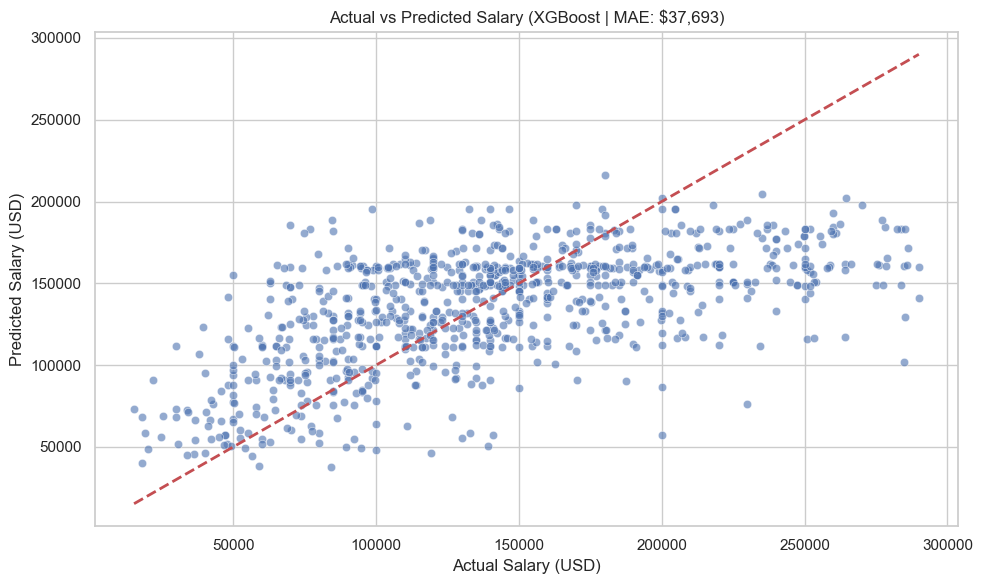

In [1]:
# Key Changes
# Library: Replaced GradientBoostingRegressor with xgboost.XGBRegressor.


# Objective: Set objective='reg:absoluteerror' to explicitly optimize for MAE (Mean Absolute Error).


# Hyperparameters: Updated the tuning grid in train_and_tune to use XGBoost-specific parameter names (e.g., colsample_bytree, reg_alpha, reg_lambda).


# Remove outliers using Z-Score method, XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# NEW: Import XGBoost
import xgboost as xgb


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)


from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")


    # ---------------------------------------------------------
    # Outlier Removal using Z-Score Method
    # ---------------------------------------------------------
    # Calculate absolute Z-scores for the outcome column
    z_scores = np.abs(stats.zscore(df[outcome_col]))
   
    # Define Threshold (User specified 2)
    threshold = 2
   
    # Identify indices where Z-score exceeds threshold
    outlier_indices = np.where(z_scores > threshold)[0]
   
    # Drop outliers
    df_clean = df.drop(outlier_indices).copy()
   
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------


    # Treat remote_ratio as categorical string to capture non-linearities
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)


    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year',
        'remote_ratio'
    ]


    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]


    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # OneHotEncoder is generally safer for XGBoost unless using its native categorical support
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # MODIFIED: Using XGBoost Regressor
    # objective='reg:absoluteerror' optimizes for MAE
    xgbr = xgb.XGBRegressor(
        random_state=RANDOM_STATE,
        objective='reg:absoluteerror',
        n_jobs=-1  # Use all cores
    )


    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=xgbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])


# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # MODIFIED: XGBoost specific hyperparameters
    param_dist = {
        'model__regressor__n_estimators': [100, 300, 500],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],  # often called 'eta'
        'model__regressor__max_depth': [3, 5, 7],
        'model__regressor__subsample': [0.7, 0.8, 0.9],
        'model__regressor__colsample_bytree': [0.7, 0.8, 0.9],
        'model__regressor__reg_alpha': [0, 0.1, 1],   # L1 regularization
        'model__regressor__reg_lambda': [1, 1.5, 2]   # L2 regularization
    }


    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )


    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")


    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)


    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )


    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)


    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")


    evaluate_model(best_model, X_test, y_test)


Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,435.29
RMSE  : $48,375.82
MedAE : $30,272.39
R2    : 0.3427


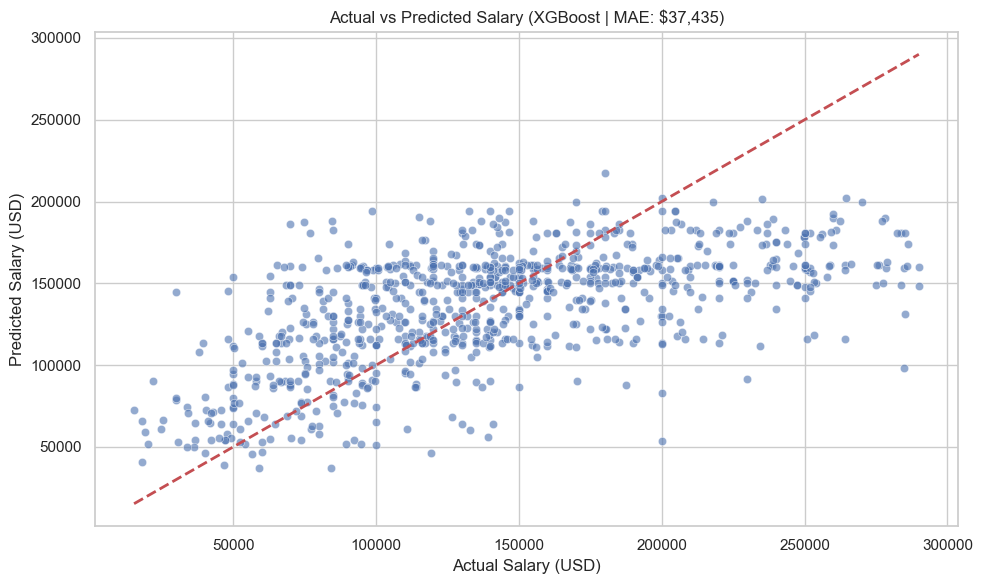

In [4]:
# Key Changes
# Library: Replaced GradientBoostingRegressor with xgboost.XGBRegressor.


# Objective: Set objective='reg:absoluteerror' to explicitly optimize for MAE (Mean Absolute Error).


# Hyperparameters: Updated the tuning grid in train_and_tune to use XGBoost-specific parameter names (e.g., colsample_bytree, reg_alpha, reg_lambda).


# Remove outliers using Z-Score method, XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# NEW: Import XGBoost
import xgboost as xgb


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)


from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")


    # ---------------------------------------------------------
    # Outlier Removal using Z-Score Method
    # ---------------------------------------------------------
    # Calculate absolute Z-scores for the outcome column
    z_scores = np.abs(stats.zscore(df[outcome_col]))
   
    # Define Threshold (User specified 2)
    threshold = 2
   
    # Identify indices where Z-score exceeds threshold
    outlier_indices = np.where(z_scores > threshold)[0]
   
    # Drop outliers
    df_clean = df.drop(outlier_indices).copy()
   
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------


    # Treat remote_ratio as categorical string to capture non-linearities
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)


    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'remote_ratio'
    ]


    ordinal_cols = ['experience_level', 'company_size', 'work_year']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L'], ['2020', '2021', '2022', '2023', '2024', '2025']]


    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # OneHotEncoder is generally safer for XGBoost unless using its native categorical support
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # MODIFIED: Using XGBoost Regressor
    # objective='reg:absoluteerror' optimizes for MAE
    xgbr = xgb.XGBRegressor(
        random_state=RANDOM_STATE,
        objective='reg:absoluteerror',
        n_jobs=-1  # Use all cores
    )


    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=xgbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])


# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # MODIFIED: XGBoost specific hyperparameters
    param_dist = {
        'model__regressor__n_estimators': [100, 300, 500],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],  # often called 'eta'
        'model__regressor__max_depth': [3, 5, 7],
        'model__regressor__subsample': [0.7, 0.8, 0.9],
        'model__regressor__colsample_bytree': [0.7, 0.8, 0.9],
        'model__regressor__reg_alpha': [0, 0.1, 1],   # L1 regularization
        'model__regressor__reg_lambda': [1, 1.5, 2]   # L2 regularization
    }


    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )


    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")


    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)


    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )


    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)


    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")


    evaluate_model(best_model, X_test, y_test)



Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Data sorted by 'work_year' for time-based splitting.

Time-based Split Created.
Training set size: 3582 (Earliest data)
Testing set size:  896 (Latest data)
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $38,603.62
RMSE  : $49,140.21
MedAE : $32,390.15
R2    : 0.2719


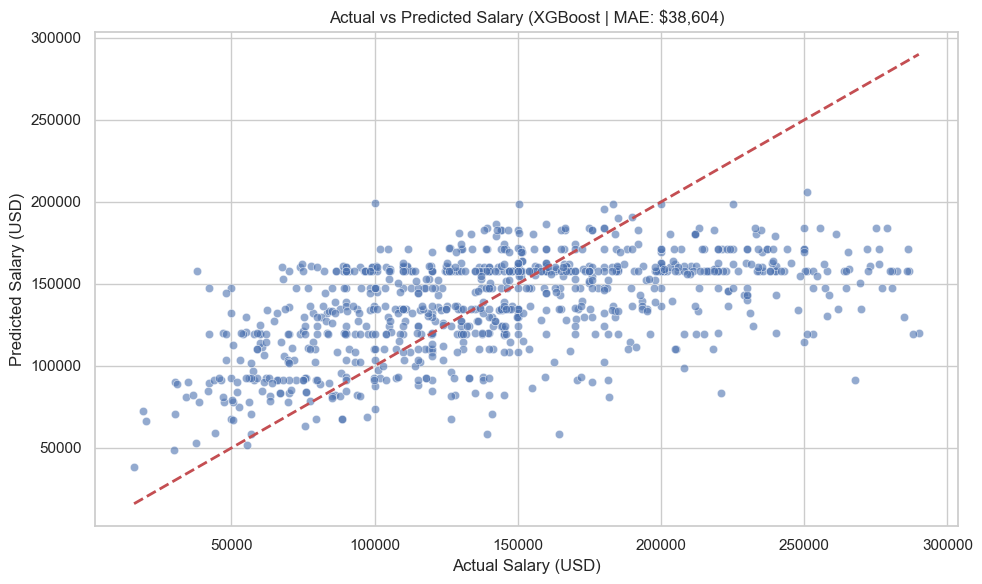

In [5]:
# Remove outliers using Z-Score method, XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# NEW: Import XGBoost
import xgboost as xgb

# MODIFIED: Added TimeSeriesSplit for valid cross-validation on time data
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # ---------------------------------------------------------
    # Outlier Removal using Z-Score Method
    # ---------------------------------------------------------
    # Calculate absolute Z-scores for the outcome column
    z_scores = np.abs(stats.zscore(df[outcome_col]))
    
    # Define Threshold (User specified 2)
    threshold = 2
    
    # Identify indices where Z-score exceeds threshold
    outlier_indices = np.where(z_scores > threshold)[0]
    
    # Drop outliers
    df_clean = df.drop(outlier_indices).copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")
    # ---------------------------------------------------------

    # Treat remote_ratio as categorical string to capture non-linearities
    df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

    # MODIFIED: Sort by time (work_year) to prepare for time-based split
    df_clean = df_clean.sort_values(by='work_year').reset_index(drop=True)
    print("Data sorted by 'work_year' for time-based splitting.")

    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'remote_ratio'
    ]

    ordinal_cols = ['experience_level', 'company_size', 'work_year']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L'], ['2020', '2021', '2022', '2023', '2024', '2025']]

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # OneHotEncoder is generally safer for XGBoost unless using its native categorical support
            ('nom', OneHotEncoder(
                handle_unknown='ignore',
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor):
    # MODIFIED: Using XGBoost Regressor
    # objective='reg:absoluteerror' optimizes for MAE
    xgbr = xgb.XGBRegressor(
        random_state=RANDOM_STATE,
        objective='reg:absoluteerror',
        n_jobs=-1  # Use all cores
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=xgbr,
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    # MODIFIED: XGBoost specific hyperparameters
    param_dist = {
        'model__regressor__n_estimators': [100, 300, 500],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],  # often called 'eta'
        'model__regressor__max_depth': [3, 5, 7],
        'model__regressor__subsample': [0.7, 0.8, 0.9],
        'model__regressor__colsample_bytree': [0.7, 0.8, 0.9],
        'model__regressor__reg_alpha': [0, 0.1, 1],   # L1 regularization
        'model__regressor__reg_lambda': [1, 1.5, 2]   # L2 regularization
    }

    # MODIFIED: Use TimeSeriesSplit for Cross-Validation
    # This prevents the model from "peeking" into future data during tuning
    tscv = TimeSeriesSplit(n_splits=5)

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=tscv,  # Use Time Series CV instead of standard K-Fold
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})')
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # MODIFIED: Time-based Split
    # Since we sorted by work_year in load_and_clean_data, we simply split
    # without shuffling. The last 20% (latest data) becomes the test set.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        shuffle=False  # IMPORTANT: Do not shuffle for time-based split
    )
    
    print(f"\nTime-based Split Created.")
    print(f"Training set size: {len(X_train)} (Earliest data)")
    print(f"Testing set size:  {len(X_test)} (Latest data)")

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,545.79
RMSE  : $48,338.28
MedAE : $30,706.55
R2    : 0.3437


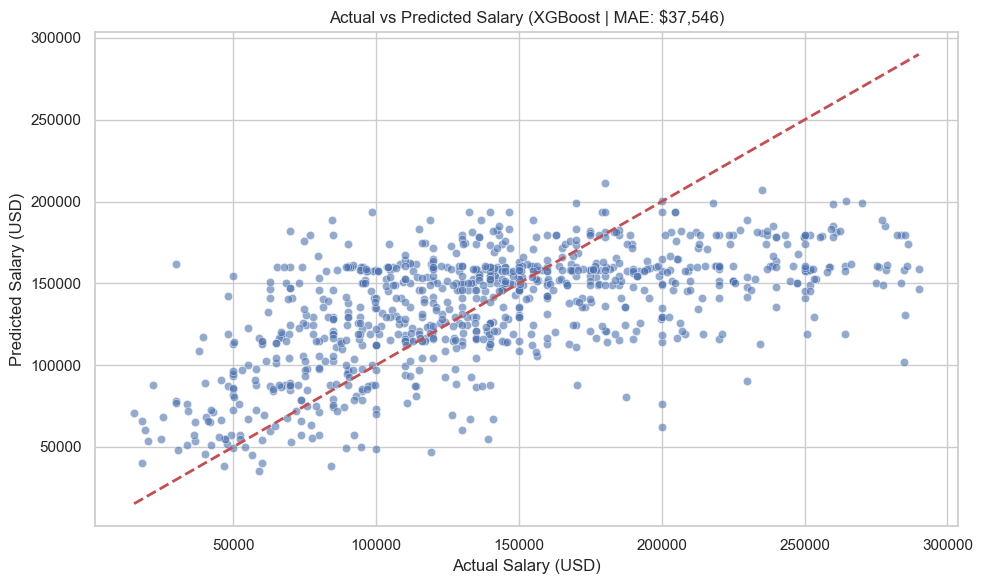

In [6]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Corrected Version)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employee_residence",
        "employment_type",
        "company_location"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)


Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,485.65
RMSE  : $48,281.49
MedAE : $30,934.10
R2    : 0.3452


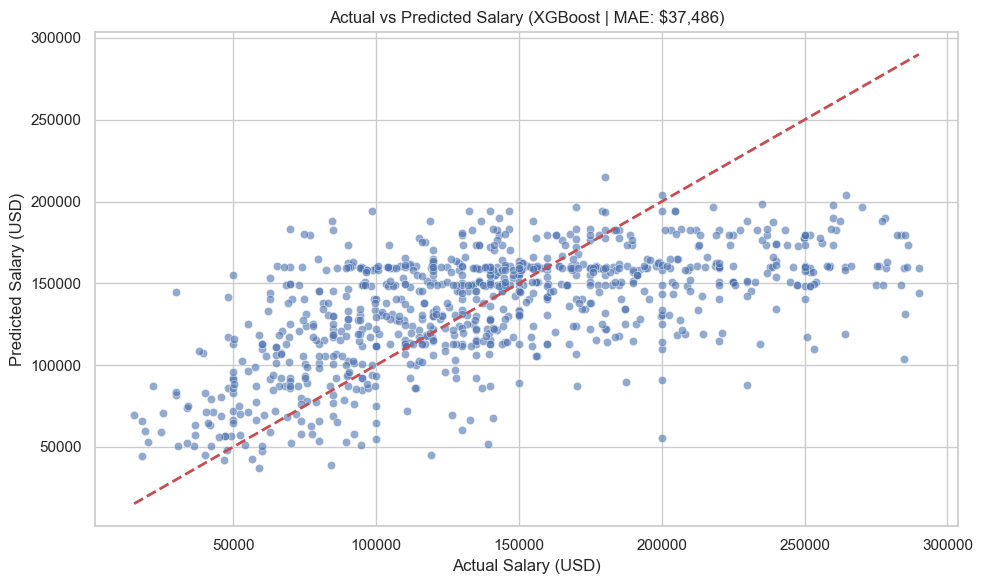

In [7]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Corrected Version), remove company_location
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employee_residence",
        "employment_type"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)


Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,501.50
RMSE  : $48,248.09
MedAE : $31,517.49
R2    : 0.3461


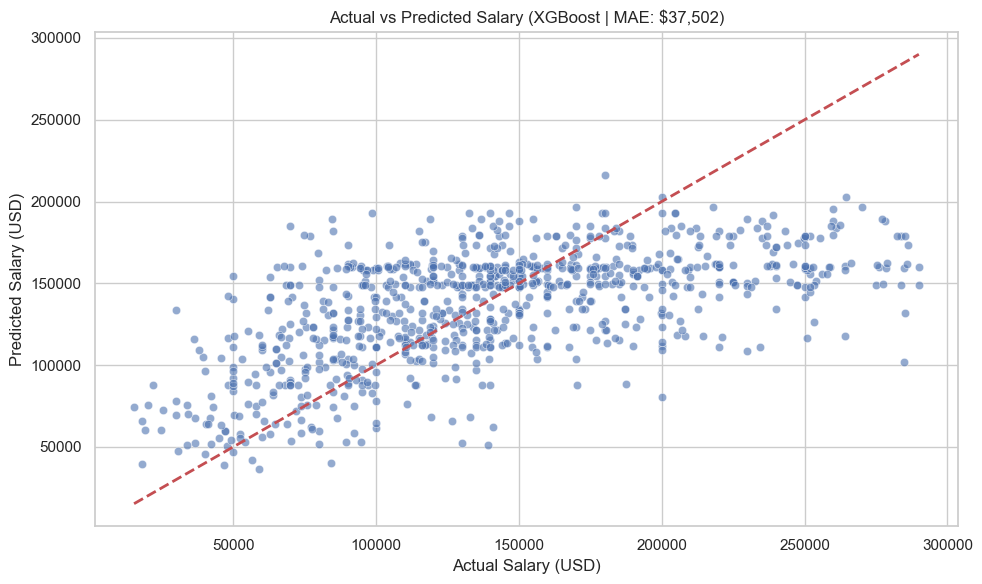

In [8]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Corrected Version), remove residence_location
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "company_location"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)


Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,551.88
RMSE  : $48,546.10
MedAE : $30,638.68
R2    : 0.3380


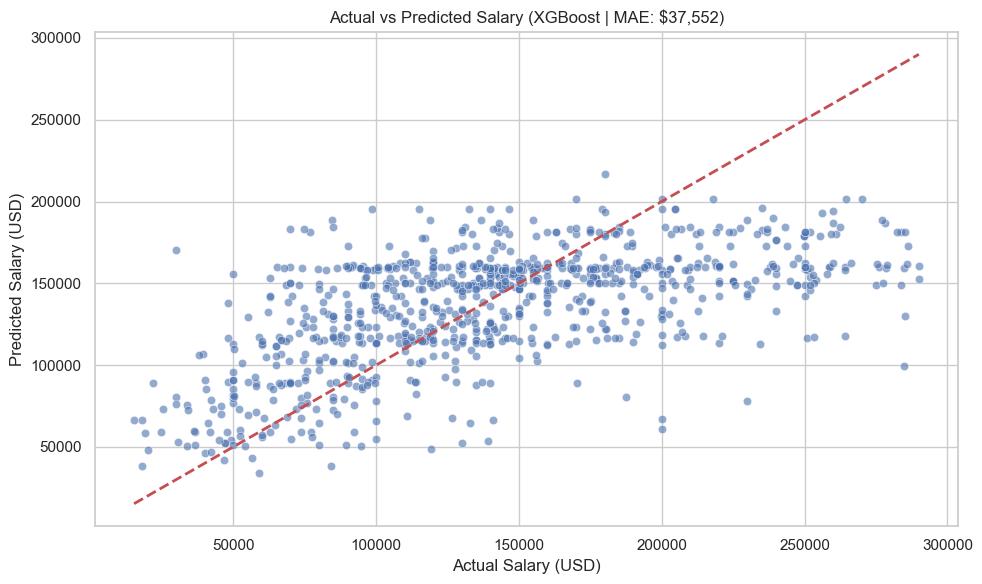

In [9]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Corrected Version), remove company_size
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employee_residence",
        "employment_type",
        "company_location"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"]
    ]

    # Numerical variables (passed through without encoding)
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)


In [ ]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Corrected Version)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employee_residence",
        "employment_type",
        "company_location"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)


In [10]:
# ────────────────────────────────────────────────────────────────
# BETTER XGBoost Salary Prediction Pipeline – 2025 edition
# ────────────────────────────────────────────────────────────────

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import xgboost as xgb

RANDOM_STATE = 42

def prepare_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # Binary strong signals
    df["us_company"]     = (df["company_location"] == "US").astype(int)
    df["us_residence"]   = (df["employee_residence"] == "US").astype(int)
    df["fully_remote"]   = (df["remote_ratio"] == 100).astype(int)
    
    # Senior / lead / head / principal / staff
    senior_keywords = r"(?i)(senior|lead|staff|principal|head|director|chief|manager)"
    df["is_senior_role"] = df["job_title"].str.contains(senior_keywords, regex=True).astype(int)
    
    # Very simple job title grouping (you can make this much better)
    top_jobs = df["job_title"].value_counts().index[:20]
    df["job_group"] = np.where(
        df["job_title"].isin(top_jobs),
        df["job_title"],
        "Other"
    )
    
    # Work year as category
    df["work_year"] = df["work_year"].astype(str)
    
    return df

def load_and_prepare_data(path: str):
    df = pd.read_csv(path)
    df = prepare_features(df)
    return df

# ─── Features ───────────────────────────────────────────────────────
categorical_cols = [
    "work_year", "experience_level", "employment_type",
    "job_group", "company_size",
    # keep original job_title if you want — but better to use grouped
]

binary_cols = ["us_company", "us_residence", "fully_remote", "is_senior_role"]

numeric_cols = ["remote_ratio"]   # almost binary anyway

def get_preprocessor():
    return ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(
                handle_unknown="ignore",
                max_categories=50,           # very helpful!
                min_frequency=0.005,
                sparse_output=False
            ), categorical_cols),
            
            ("num", "passthrough", numeric_cols + binary_cols),
        ],
        remainder="drop"
    )

# ─── Main ───────────────────────────────────────────────────────────
df = load_and_prepare_data("FoAI_A2_data_4.6k.csv")

X = df.drop(columns=["salary", "salary_currency", "salary_in_usd", "job_title", "employee_residence", "company_location"])
y = df["salary_in_usd"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=RANDOM_STATE,
    stratify=pd.qcut(y, q=10)   # stratify by salary deciles
)

preprocessor = get_preprocessor()

xgb_reg = xgb.XGBRegressor(
    objective="reg:absoluteerror",
    random_state=RANDOM_STATE,
    n_jobs=-1
)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb_reg)          # ← log transform optional now
    # If you still want log: wrap in TransformedTargetRegressor again
])

# Smaller param grid — faster, often enough
param_dist = {
    "model__n_estimators":     [300, 500, 800],
    "model__learning_rate":    [0.02, 0.05, 0.1],
    "model__max_depth":        [4, 6, 8],
    "model__subsample":        [0.75, 0.9],
    "model__colsample_bytree": [0.7, 0.85],
    "model__reg_lambda":       [1, 3, 6],
}

search = RandomizedSearchCV(
    pipe, param_dist, n_iter=25, cv=5,
    scoring="neg_mean_absolute_error",
    random_state=RANDOM_STATE, n_jobs=-1, verbose=2
)

search.fit(X_train, y_train)

print("Best MAE (CV):", -search.best_score_)
print("Best params:", search.best_params_)

# ─── Final evaluation ──────────────────────────────────────────────
model = search.best_estimator_
y_pred = model.predict(X_test)

mae   = mean_absolute_error(y_test, y_pred)
rmse  = np.sqrt(mean_squared_error(y_test, y_pred))
mape  = mean_absolute_percentage_error(y_test, y_pred) * 100
r2    = r2_score(y_test, y_pred)

print(f"Test MAE:   ${mae:,.0f}")
print(f"Test RMSE:  ${rmse:,.0f}")
print(f"Test MAPE:  {mape:.2f}%")
print(f"Test R²:    {r2:.4f}")

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_9260\394945379.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["is_senior_role"] = df["job_title"].str.contains(senior_keywords, regex=True).astype(int)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best MAE (CV): 42619.74921875
Best params: {'model__subsample': 0.75, 'model__reg_lambda': 1, 'model__n_estimators': 300, 'model__max_depth': 6, 'model__learning_rate': 0.02, 'model__colsample_bytree': 0.85}
Test MAE:   $43,504
Test RMSE:  $65,533
Test MAPE:  33.43%
Test R²:    0.2610


Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,510.75
RMSE  : $48,344.79
MedAE : $30,605.47
R2    : 0.3435


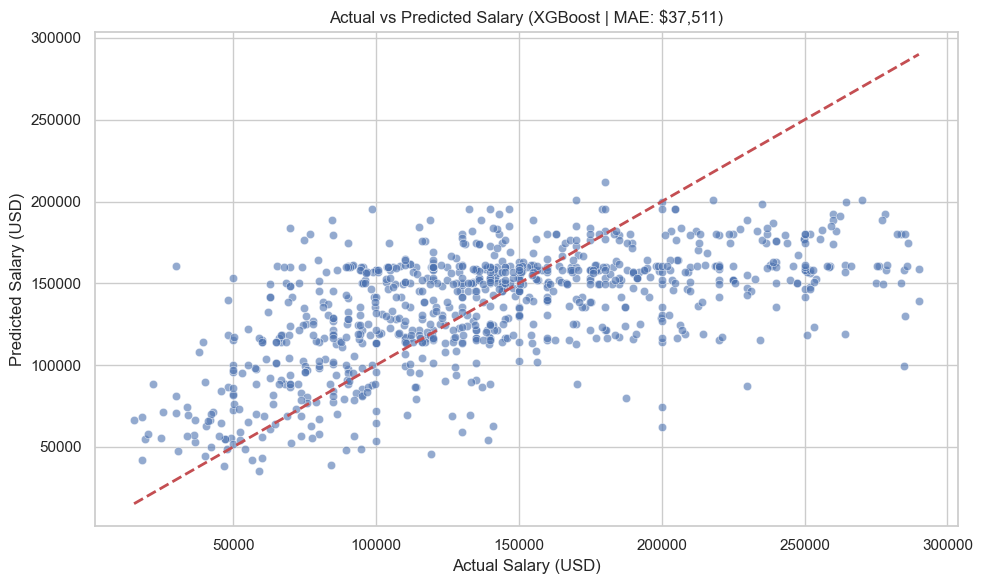

In [11]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Binary Remote Version)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite". 
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0. 
    # Any other values (like 50) will become 0 (Onsite) based on this logic, 
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employee_residence",
        "employment_type",
        "company_location"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,602.82
RMSE  : $48,288.52
MedAE : $31,560.58
R2    : 0.3450


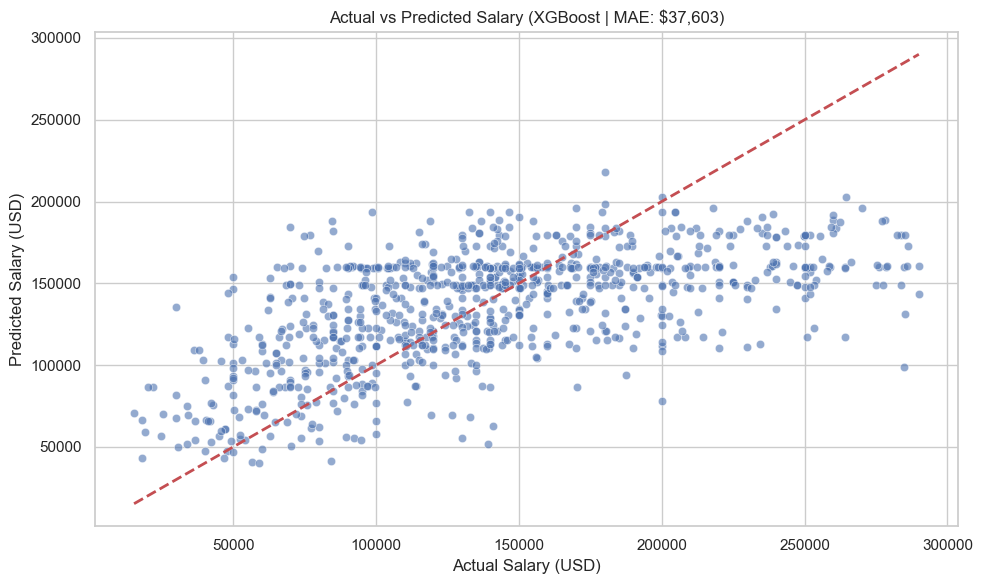

In [12]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Binary Remote Version)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite". 
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0. 
    # Any other values (like 50) will become 0 (Onsite) based on this logic, 
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "company_location"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,489.11
RMSE  : $48,358.91
MedAE : $30,818.84
R2    : 0.3431


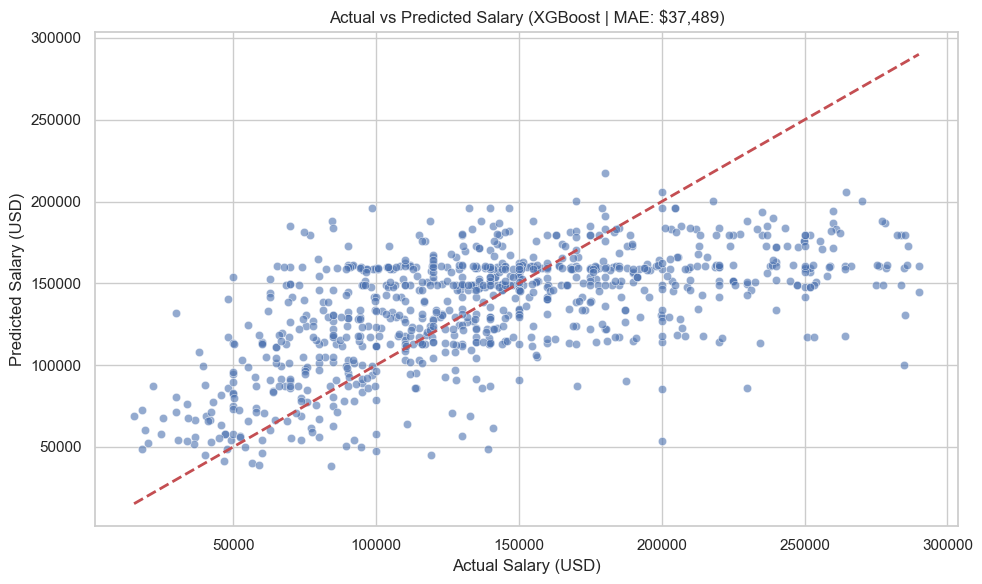

In [32]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Binary Remote Version)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite". 
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0. 
    # Any other values (like 50) will become 0 (Onsite) based on this logic, 
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "employee_residence"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,599.70
RMSE  : $48,332.87
MedAE : $30,701.00
R2    : 0.3438


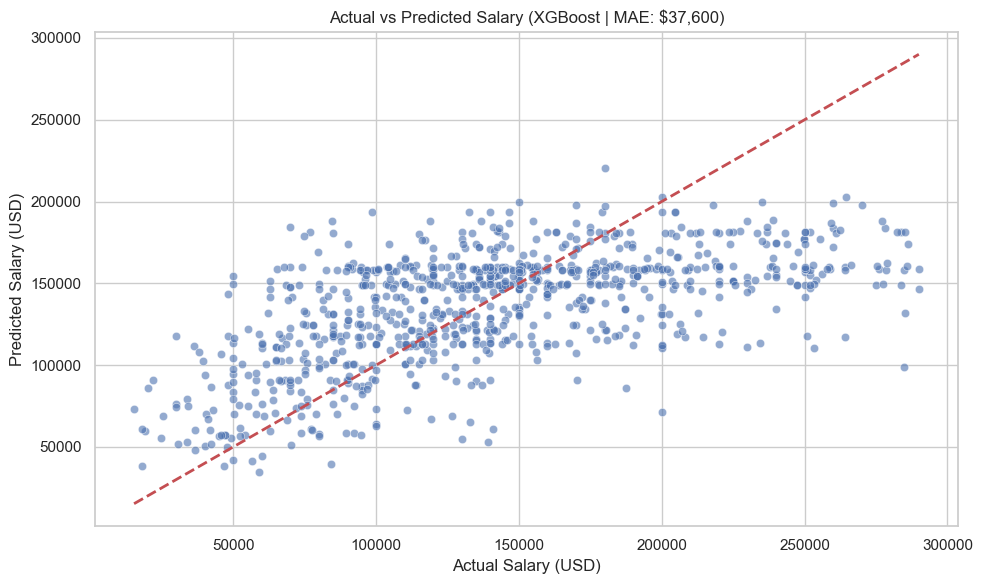

In [14]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Binary Remote Version)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite". 
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0. 
    # Any other values (like 50) will become 0 (Onsite) based on this logic, 
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "company_location"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,602.82
RMSE  : $48,288.52
MedAE : $31,560.58
R2    : 0.3450


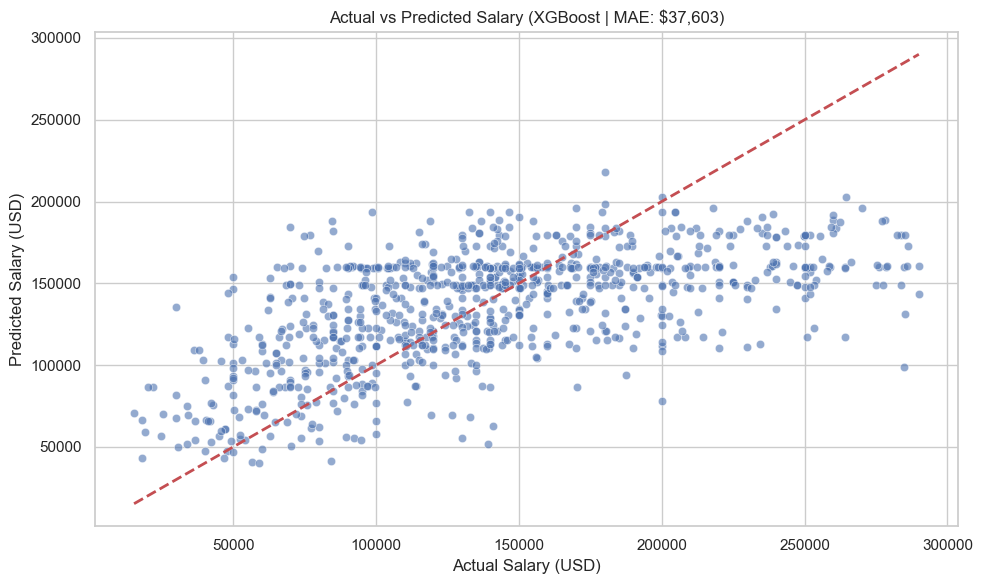

In [15]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Binary Remote Version)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite". 
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0. 
    # Any other values (like 50) will become 0 (Onsite) based on this logic, 
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "company_location"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

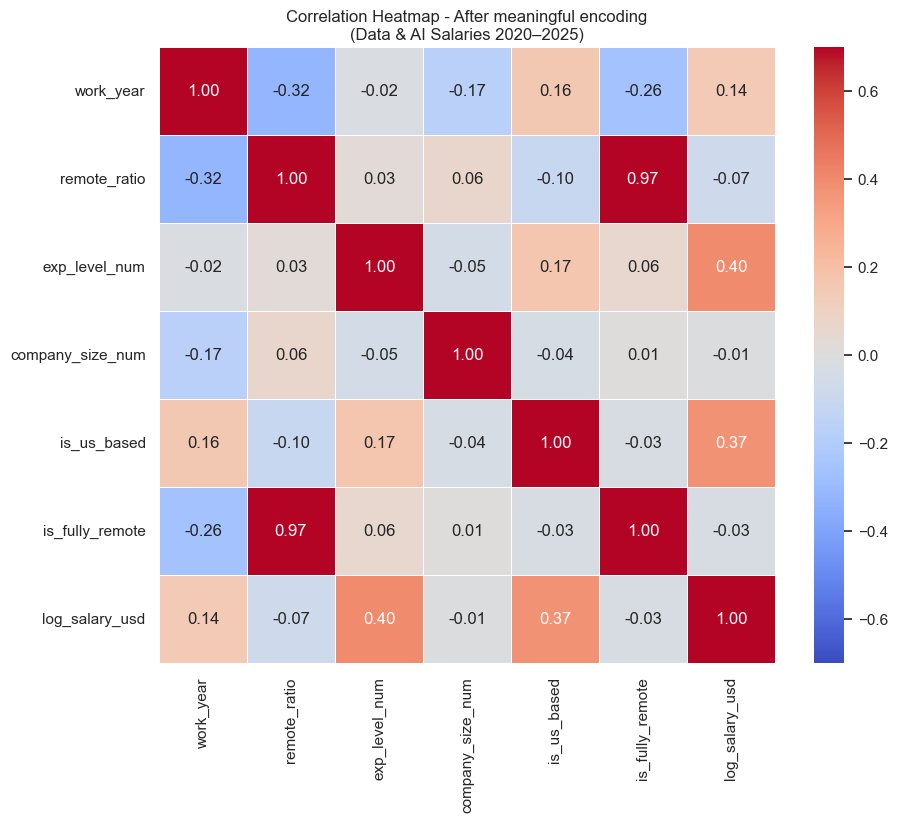

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Giả sử df đã load
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Encode ordinal
exp_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
size_map = {'S': 0, 'M': 1, 'L': 2}

df['exp_level_num']    = df['experience_level'].map(exp_map)
df['company_size_num'] = df['company_size'].map(size_map)
df['is_us_based']      = (df['company_location'] == 'US').astype(int)
df['is_fully_remote']  = (df['remote_ratio'] == 100).astype(int)
df['log_salary_usd']   = np.log1p(df['salary_in_usd'])

# Chọn features cho heatmap
features = [
    'work_year',
    'remote_ratio',
    'exp_level_num',
    'company_size_num',
    'is_us_based',
    'is_fully_remote',
    'log_salary_usd'
]

corr = df[features].corr(method='spearman')   # spearman thường tốt hơn cho ordinal + binary

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-0.7, vmax=0.7, linewidths=0.5, square=True)
plt.title('Correlation Heatmap - After meaningful encoding\n(Data & AI Salaries 2020–2025)')
plt.show()

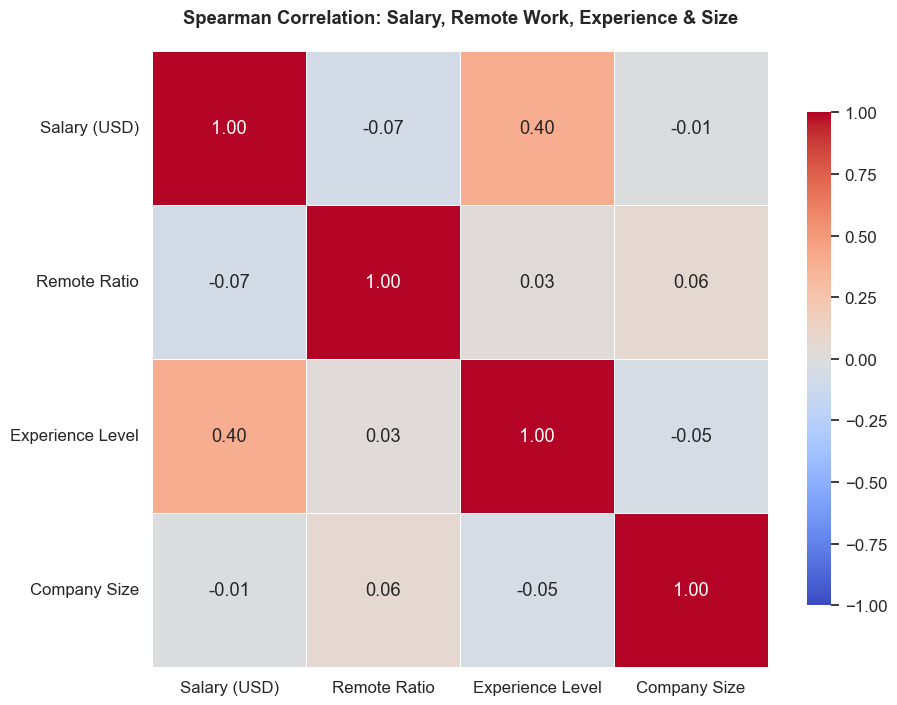

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'FoAI_A2_data_4.6k.csv'
df = pd.read_csv(file_path)

# 1. Encoding Ordinal Variables
# Experience Level Mapping
experience_map = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}

# Company Size Mapping
company_size_map = {
    'S': 1,
    'M': 2,
    'L': 3
}

# Apply mappings
df['experience_level_encoded'] = df['experience_level'].map(experience_map)
df['company_size_encoded'] = df['company_size'].map(company_size_map)

# 2. Select Features for Correlation
features = ['salary_in_usd', 'remote_ratio', 'experience_level_encoded', 'company_size_encoded']
correlation_df = df[features]

# Rename columns for better readability in the plot
correlation_df.columns = ['Salary (USD)', 'Remote Ratio', 'Experience Level', 'Company Size']

# 3. Calculate Spearman Correlation
corr_matrix = correlation_df.corr(method='spearman')

# 4. Generate Heatmap
plt.figure(figsize=(10, 8))
sns.set_context("notebook", font_scale=1.1)
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Spearman Correlation: Salary, Remote Work, Experience & Size', pad=20, fontweight='bold')
plt.yticks(rotation=0) 
plt.show()

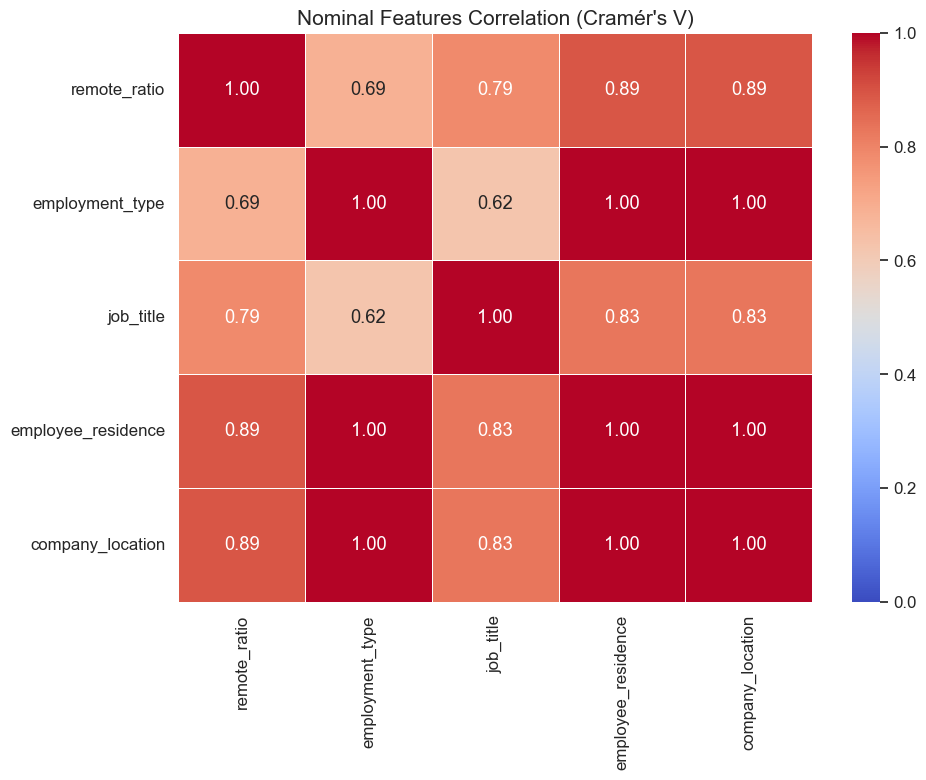

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. PREPARE SAMPLE DATA
# (Replace this block with your actual data loading)
# ---------------------------------------------------------
data = {
    'remote_ratio': [0, 100, 50, 100, 0, 100, 50, 0, 100, 100] * 10,
    'employment_type': ['FT', 'FT', 'CT', 'FT', 'PT', 'FT', 'FL', 'FT', 'FT', 'CT'] * 10,
    'job_title': ['Data Scientist', 'Data Engineer', 'ML Engineer', 'Data Analyst', 
                  'Data Scientist', 'Manager', 'Data Analyst', 'ML Engineer', 'Data Engineer', 'Manager'] * 10,
    'employee_residence': ['US', 'US', 'GB', 'CA', 'DE', 'US', 'ES', 'FR', 'US', 'IN'] * 10,
    'company_location': ['US', 'US', 'GB', 'CA', 'DE', 'US', 'ES', 'FR', 'US', 'IN'] * 10
}
df = pd.DataFrame(data)

# Ensure all columns are treated as categorical strings
cols = ['remote_ratio', 'employment_type', 'job_title', 'employee_residence', 'company_location']
df[cols] = df[cols].astype(str)

# ---------------------------------------------------------
# 2. DEFINE CRAMÉR'S V FUNCTION
# ---------------------------------------------------------
def cramers_v(x, y):
    """
    Calculates Cramér's V statistic for categorical-categorical association.
    Input: Two pd.Series objects (categorical columns).
    Output: A value between 0 and 1.
    """
    # 1. Create a contingency table (confusion matrix)
    confusion_matrix = pd.crosstab(x, y)
    
    # 2. Calculate Chi-Squared statistic
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    
    # 3. Get total observations
    n = confusion_matrix.sum().sum()
    
    # 4. Get dimensions
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    # 5. Return Cramér's V (with check for zero denominator)
    # Formula: sqrt(chi2 / (n * min(k-1, r-1)))
    with np.errstate(divide='ignore', invalid='ignore'):
        return np.sqrt(phi2 / min(k - 1, r - 1))

# ---------------------------------------------------------
# 3. CALCULATE CORRELATION MATRIX
# ---------------------------------------------------------
# Initialize an empty DataFrame
cramers_v_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)

# Loop through every pair of features
for col1 in cols:
    for col2 in cols:
        val = cramers_v(df[col1], df[col2])
        cramers_v_matrix.loc[col1, col2] = val

# ---------------------------------------------------------
# 4. PLOT THE HEATMAP
# ---------------------------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(
    cramers_v_matrix, 
    annot=True,        # Show the numbers
    fmt='.2f',         # Format to 2 decimal places
    cmap='coolwarm',   # Color scheme
    vmin=0, vmax=1,    # Scale from 0 to 1
    linewidths=0.5     # Grid lines
)

plt.title("Nominal Features Correlation (Cramér's V)", fontsize=15)
plt.tight_layout()
plt.show()

Reducing cardinality for: job_title (Original unique: 50)
-> New unique count: 21
Reducing cardinality for: employee_residence (Original unique: 30)
-> New unique count: 30
Reducing cardinality for: company_location (Original unique: 30)
-> New unique count: 30


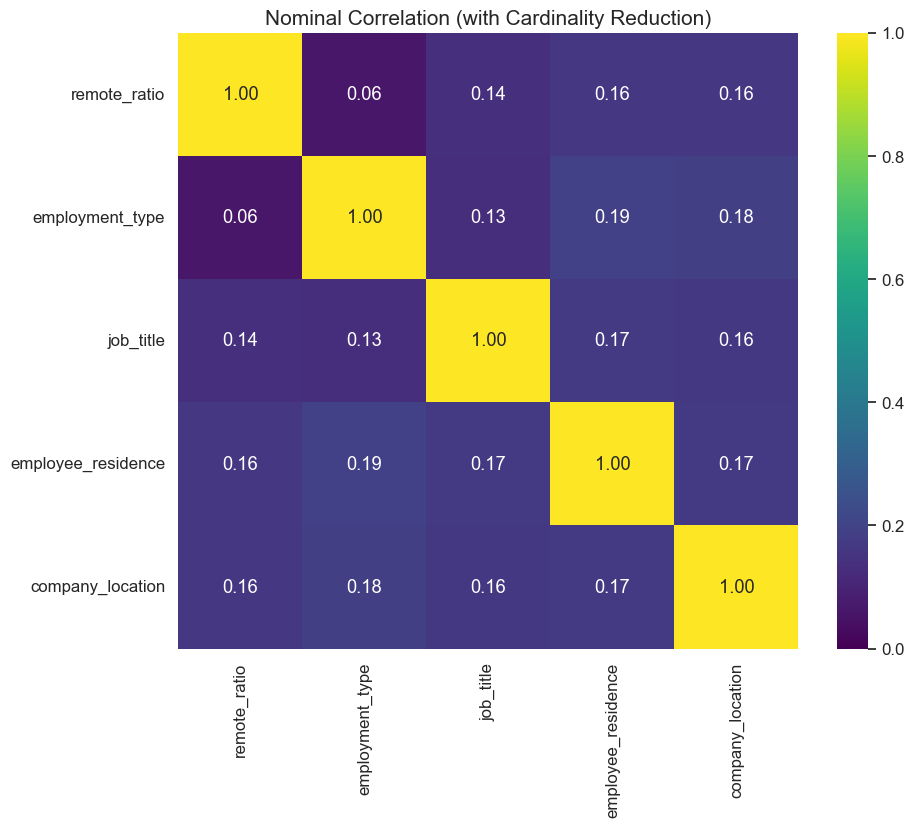

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. SAMPLE DATA (Giả lập dữ liệu High Cardinality)
# ---------------------------------------------------------
np.random.seed(42)
n_samples = 1000

data = {
    'remote_ratio': np.random.choice([0, 50, 100], n_samples),
    'employment_type': np.random.choice(['FT', 'CT', 'PT', 'FL'], n_samples, p=[0.9, 0.05, 0.03, 0.02]),
    # Giả lập 50 job titles khác nhau
    'job_title': np.random.choice([f'Job_{i}' for i in range(50)], n_samples),
    # Giả lập 30 quốc gia
    'employee_residence': np.random.choice([f'Country_{i}' for i in range(30)], n_samples),
    'company_location': np.random.choice([f'Country_{i}' for i in range(30)], n_samples)
}
df = pd.DataFrame(data)

cols = ['remote_ratio', 'employment_type', 'job_title', 'employee_residence', 'company_location']
df[cols] = df[cols].astype(str)

# ---------------------------------------------------------
# 2. HÀM XỬ LÝ HIGH CARDINALITY (QUAN TRỌNG)
# ---------------------------------------------------------
def reduce_cardinality(df, column, threshold=0.01):
    """
    Gom các giá trị xuất hiện ít hơn threshold (ví dụ 1%) thành 'Other'.
    Giúp giảm nhiễu cho Cramér's V.
    """
    counts = df[column].value_counts(normalize=True)
    # Lấy danh sách các giá trị phổ biến
    valid_values = counts[counts >= threshold].index
    # Thay thế các giá trị hiếm bằng 'Other'
    return df[column].apply(lambda x: x if x in valid_values else 'Other')

# Áp dụng giảm chiều dữ liệu
df_reduced = df.copy()
for col in cols:
    # Nếu cột có quá nhiều giá trị (hơn 20), ta sẽ gom nhóm
    if df[col].nunique() > 20:
        print(f"Reducing cardinality for: {col} (Original unique: {df[col].nunique()})")
        df_reduced[col] = reduce_cardinality(df, col, threshold=0.02) # Giữ lại các giá trị chiếm > 2% dữ liệu
        print(f"-> New unique count: {df_reduced[col].nunique()}")

# ---------------------------------------------------------
# 3. CRAMÉR'S V (Vẫn giữ nguyên công thức)
# ---------------------------------------------------------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    with np.errstate(divide='ignore', invalid='ignore'):
        return np.sqrt(phi2 / min(k - 1, r - 1))

# ---------------------------------------------------------
# 4. TÍNH VÀ VẼ HEATMAP
# ---------------------------------------------------------
cramers_v_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)

for col1 in cols:
    for col2 in cols:
        val = cramers_v(df_reduced[col1], df_reduced[col2])
        cramers_v_matrix.loc[col1, col2] = val

plt.figure(figsize=(10, 8))
sns.heatmap(
    cramers_v_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='viridis', # Dùng màu viridis cho dễ nhìn hơn
    vmin=0, vmax=1
)
plt.title("Nominal Correlation (with Cardinality Reduction)", fontsize=15)
plt.show()

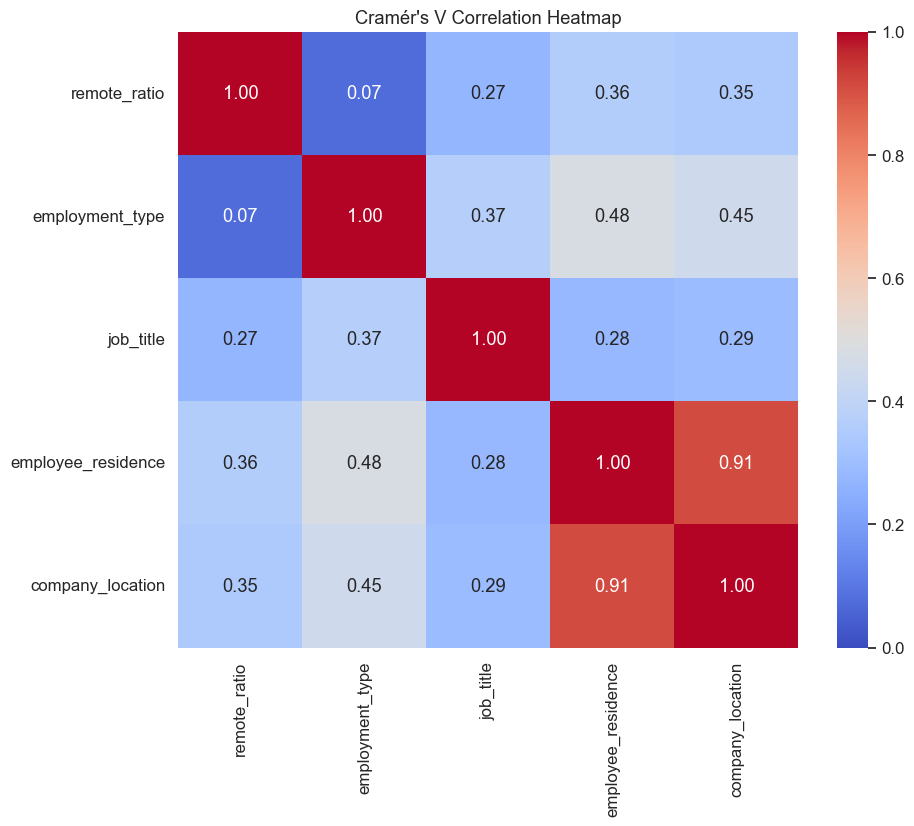

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Select the nominal features
# Note: remote_ratio is treated as nominal (categorical) as per your request
features = [
    'remote_ratio', 
    'employment_type', 
    'job_title', 
    'employee_residence', 
    'company_location'
]

data = df[features].copy()

# Ensure all columns are treated as strings (categorical)
for col in features:
    data[col] = data[col].astype(str)

# 3. Define the function for Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    # Bias correction
    with np.errstate(divide='ignore', invalid='ignore'):
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    
    # Handle cases where result might be NaN due to correction
    if np.isnan(result):
        return 0.0
    return result

# 4. Calculate the correlation matrix
rows = []
for var1 in features:
    col_list = []
    for var2 in features:
        cramer = cramers_v(data[var1], data[var2])
        col_list.append(cramer)
    rows.append(col_list)

cramers_results = pd.DataFrame(rows, index=features, columns=features)

# 5. Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title("Cramér's V Correlation Heatmap")
plt.show()

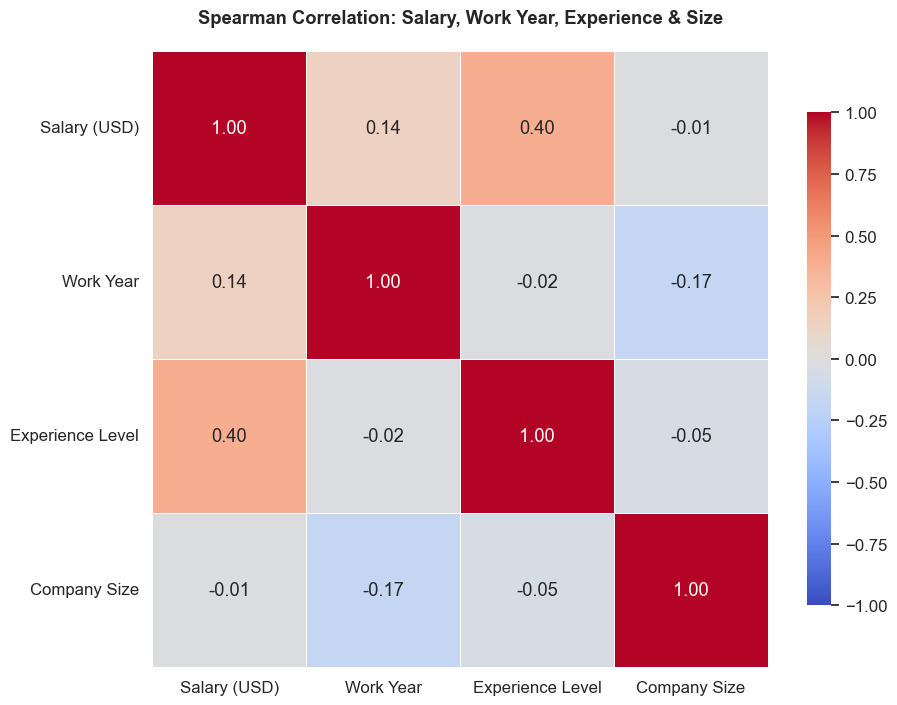

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'FoAI_A2_data_4.6k.csv'
df = pd.read_csv(file_path)

# 1. Encoding Ordinal Variables
# Experience Level Mapping (Ordinal)
experience_map = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}

# Company Size Mapping (Ordinal)
company_size_map = {
    'S': 1,
    'M': 2,
    'L': 3
}

# Apply mappings
df['experience_level_encoded'] = df['experience_level'].map(experience_map)
df['company_size_encoded'] = df['company_size'].map(company_size_map)

# 2. Select Features for Correlation
# Features: salary_in_usd, work_year, experience_level, company_size
features = ['salary_in_usd', 'work_year', 'experience_level_encoded', 'company_size_encoded']
correlation_df = df[features]

# Rename columns for better readability in the plot
correlation_df.columns = ['Salary (USD)', 'Work Year', 'Experience Level', 'Company Size']

# 3. Calculate Spearman Correlation
# Using Spearman because variables are ordinal and relationships may be non-linear
corr_matrix = correlation_df.corr(method='spearman')

# 4. Generate Heatmap
plt.figure(figsize=(10, 8))
sns.set_context("notebook", font_scale=1.1)
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Spearman Correlation: Salary, Work Year, Experience & Size', pad=20, fontweight='bold')
plt.yticks(rotation=0) 
plt.show()

Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,765.19
RMSE  : $48,379.74
MedAE : $31,295.27
R2    : 0.3426


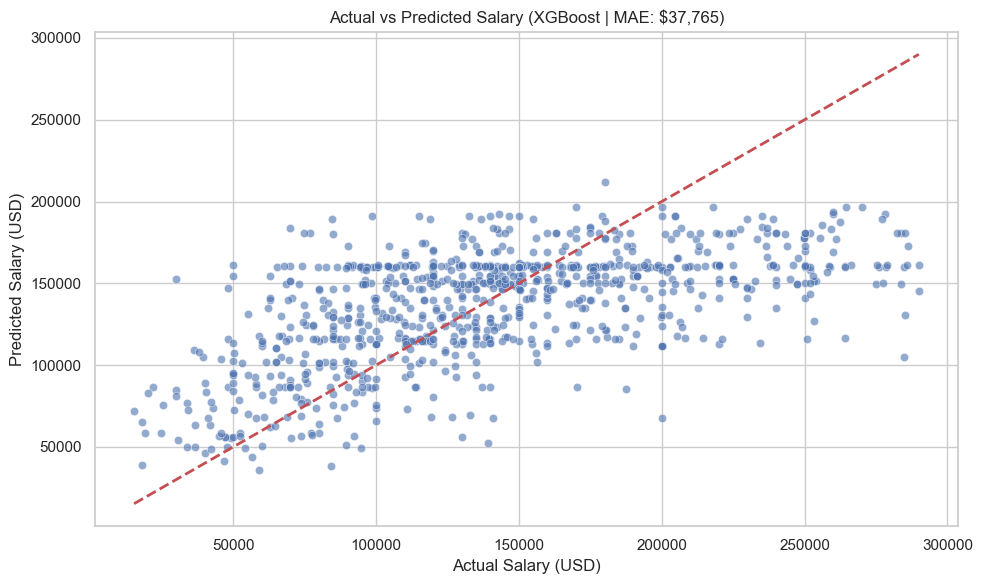

In [23]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Binary Remote Version)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite". 
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0. 
    # Any other values (like 50) will become 0 (Onsite) based on this logic, 
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "company_location"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.9, 'model__regressor__reg_lambda': 1.5, 'model__regressor__reg_alpha': 1, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.1, 'model__regressor__colsample_bytree': 0.8}

--- EVALUATION METRICS ---
MAE   : $37,842.58
RMSE  : $48,519.04
MedAE : $30,640.86
R2    : 0.3388


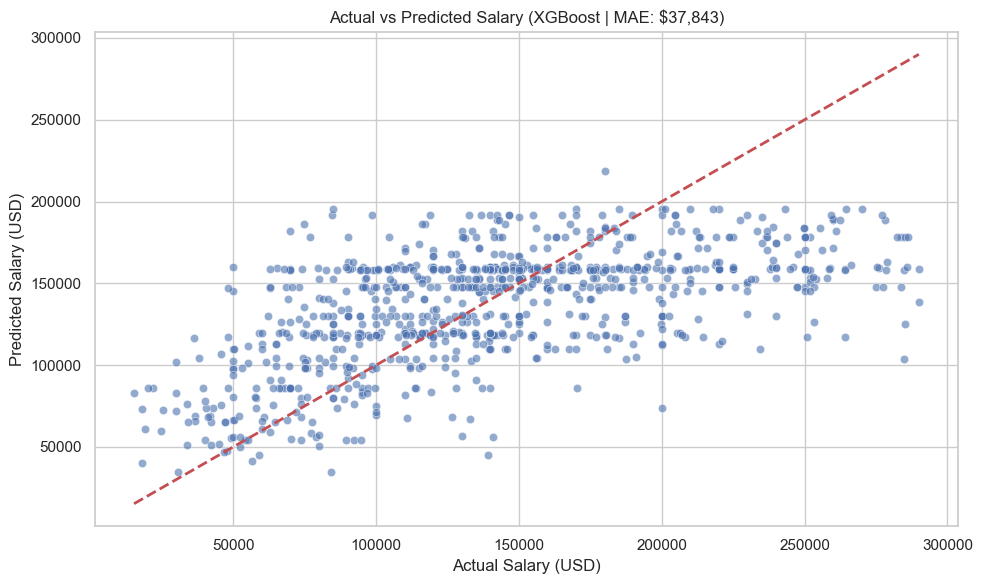

In [24]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Binary Remote Version)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite". 
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0. 
    # Any other values (like 50) will become 0 (Onsite) based on this logic, 
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "company_location"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,539.95
RMSE  : $48,260.60
MedAE : $30,684.54
R2    : 0.3458
Plot saved as 'salary_prediction_results.png'


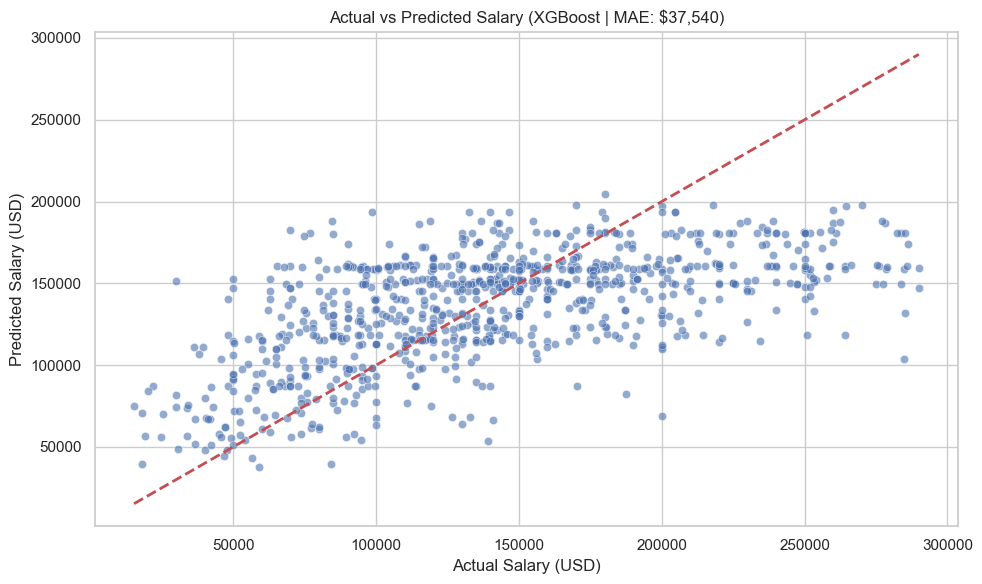

In [25]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Modified)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import xgboost as xgb

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)

    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite". 
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")

    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2

    df_clean = df[z_scores <= threshold].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")

    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # High cardinality nominal variables (use min_frequency to group rare values)
    nominal_cols_high_card = [
        "job_title",
        "company_location"
    ]

    # Low cardinality nominal variables (explicitly include all types)
    # Separated employment_type to ensure PT, CT, FL are not grouped into 'infrequent'
    nominal_cols_low_card = [
        "employment_type"
    ]

    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # Numerical variables (passed through without encoding)
    numeric_cols = ["work_year", "remote_ratio"]

    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            
            # Encoder for high cardinality (Job Title, Location) - Groups rare values
            ("nom_high_card", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols_high_card),

            # Encoder for employment_type - Keeps ALL values (FT, PT, CT, FL)
            ("nom_emp_type", OneHotEncoder(
                handle_unknown="ignore",
                sparse_output=False
            ), nominal_cols_low_card),

            ("num", "passthrough", numeric_cols)
        ]
    )


# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )


# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.savefig("salary_prediction_results.png") # Modified to save instead of show
    print("Plot saved as 'salary_prediction_results.png'")


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    evaluate_model(best_model, X_test, y_test)

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_9260\3672386565.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x='experience_level', y='salary_in_usd', order=exp_order, palette="Blues")
C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_9260\3672386565.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=df, x='company_size', y='salary_in_usd', order=size_order, palette="Greens")
C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_9260\3672386565.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axe

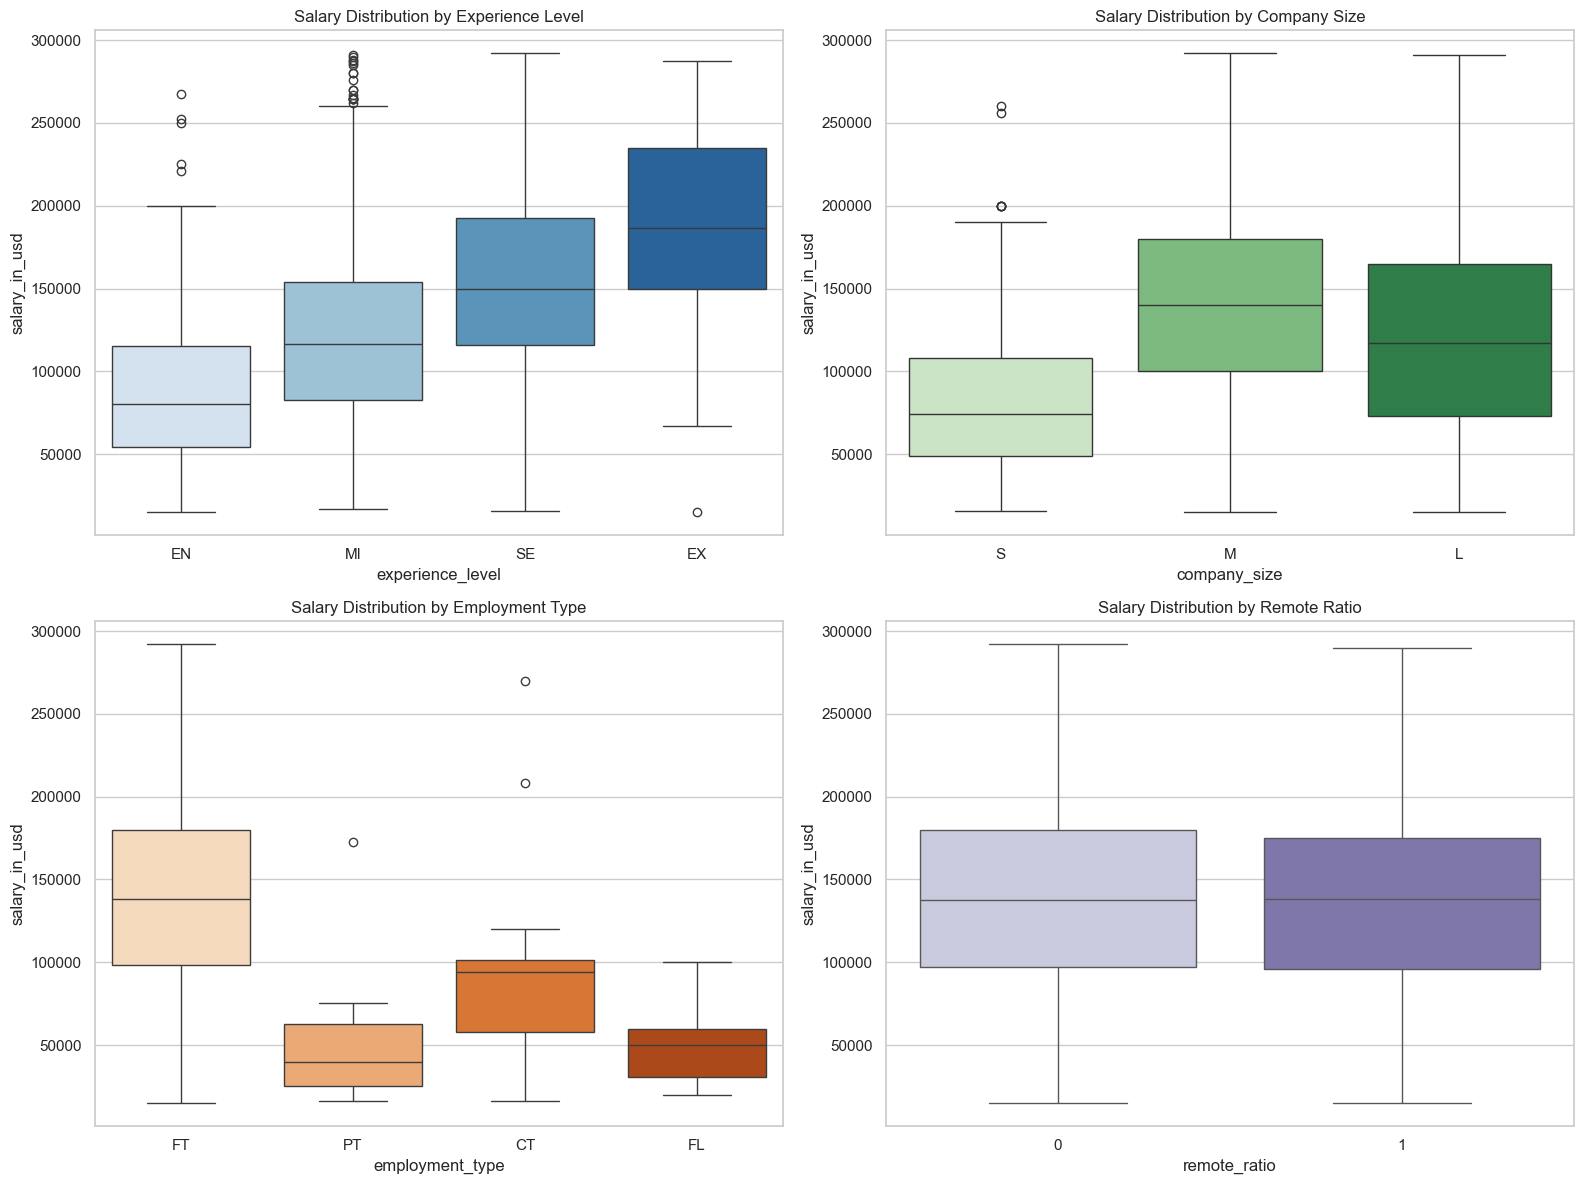

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_9260\3672386565.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


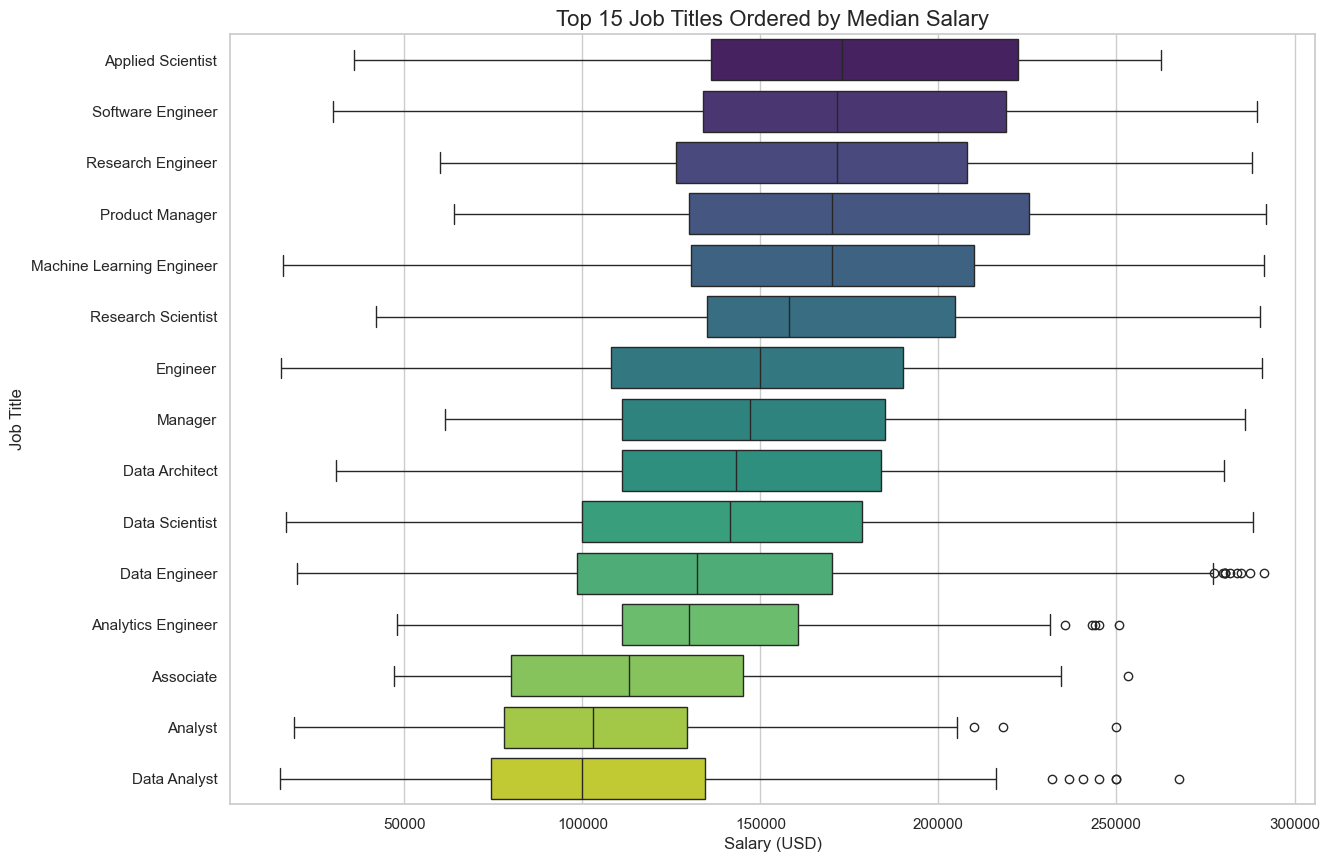

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho đẹp
sns.set_theme(style="whitegrid")

# Tạo khung hình lớn chia thành 2 dòng, 2 cột
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Experience Level (Sắp xếp theo thứ tự cấp bậc)
# EN: Entry, MI: Mid, SE: Senior, EX: Executive
exp_order = ['EN', 'MI', 'SE', 'EX'] 
sns.boxplot(ax=axes[0, 0], data=df, x='experience_level', y='salary_in_usd', order=exp_order, palette="Blues")
axes[0, 0].set_title('Salary Distribution by Experience Level')

# 2. Company Size (Sắp xếp theo quy mô)
size_order = ['S', 'M', 'L']
sns.boxplot(ax=axes[0, 1], data=df, x='company_size', y='salary_in_usd', order=size_order, palette="Greens")
axes[0, 1].set_title('Salary Distribution by Company Size')

# 3. Employment Type
sns.boxplot(ax=axes[1, 0], data=df, x='employment_type', y='salary_in_usd', palette="Oranges")
axes[1, 0].set_title('Salary Distribution by Employment Type')

# 4. Remote Ratio
# Chuyển về dạng string nếu dữ liệu đang là số để vẽ boxplot rời rạc
sns.boxplot(ax=axes[1, 1], data=df, x='remote_ratio', y='salary_in_usd', palette="Purples")
axes[1, 1].set_title('Salary Distribution by Remote Ratio')

plt.tight_layout() # Tự động căn chỉnh khoảng cách để không bị đè chữ
plt.show()

# B1: Lọc ra Top 15 công việc phổ biến nhất dựa trên số lượng mẫu
top_15_jobs_list = df['job_title'].value_counts().nlargest(15).index
df_top_jobs = df[df['job_title'].isin(top_15_jobs_list)]

# B2: Tính mức lương trung vị (median) để sắp xếp biểu đồ từ cao xuống thấp
order_by_median = df_top_jobs.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).index

# B3: Vẽ biểu đồ
plt.figure(figsize=(14, 10))
sns.boxplot(
    data=df_top_jobs, 
    y='job_title',       # Đặt Job Title ở trục Y để nằm ngang
    x='salary_in_usd',   # Lương ở trục X
    order=order_by_median, 
    palette="viridis"
)

plt.title('Top 15 Job Titles Ordered by Median Salary', fontsize=16)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.show()

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_9260\2793010506.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')
C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_9260\2793010506.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=p_series.values, y=p_series.index, palette='magma')


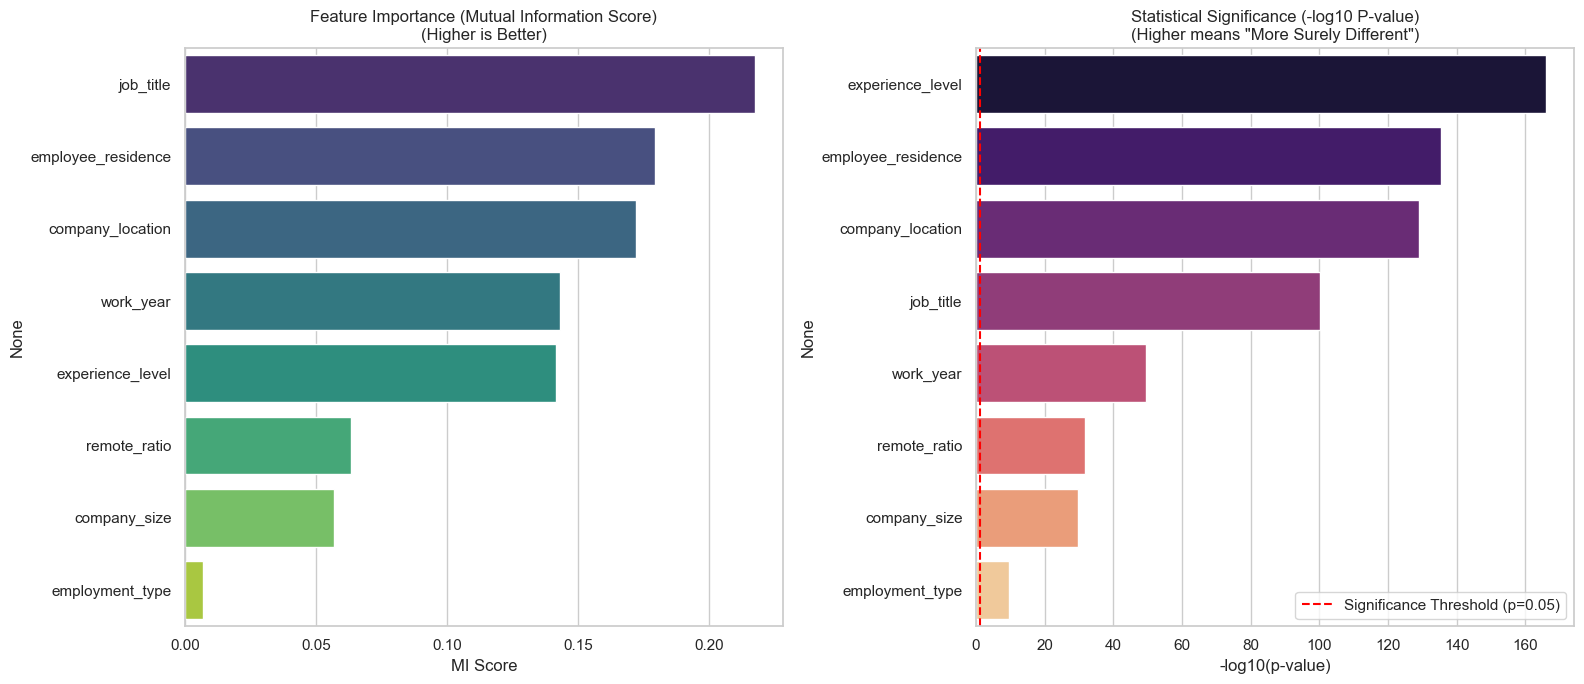

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Define categorical features
categorical_features = ['experience_level', 'employment_type', 'job_title', 
                        'employee_residence', 'remote_ratio', 'company_location', 
                        'company_size', 'work_year']

# --- 1. Compute Mutual Information Scores ---
le = LabelEncoder()
df_encoded = df.copy()
for feature in categorical_features:
    df_encoded[feature] = le.fit_transform(df_encoded[feature].astype(str))

X_mi = df_encoded[categorical_features]
y_mi = df_encoded['salary_in_usd']

mi_scores = mutual_info_regression(X_mi, y_mi, discrete_features=True, random_state=42)
mi_series = pd.Series(mi_scores, index=X_mi.columns).sort_values(ascending=False)

# --- 2. Compute Kruskal-Wallis Significance (-log10 p-value) ---
# We use -log10 because the p-values are extremely small (e.g. 10^-100).
# A value of 2 means p=0.01, a value of 100 means p=10^-100.
p_values_log = {}
for feature in categorical_features:
    groups = [group['salary_in_usd'].values for name, group in df.groupby(feature)]
    if len(groups) > 1:
        stat, p = kruskal(*groups)
        p_values_log[feature] = -np.log10(p + 1e-300) # +epsilon to avoid log(0)
    else:
        p_values_log[feature] = 0

p_series = pd.Series(p_values_log).sort_values(ascending=False)

# --- 3. Generate Charts ---
plt.figure(figsize=(16, 7))

# Chart A: Feature Importance (Mutual Information)
plt.subplot(1, 2, 1)
sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')
plt.title('Feature Importance (Mutual Information Score)\n(Higher is Better)')
plt.xlabel('MI Score')

# Chart B: Statistical Confidence (-log10 P-value)
plt.subplot(1, 2, 2)
sns.barplot(x=p_series.values, y=p_series.index, palette='magma')
plt.title('Statistical Significance (-log10 P-value)\n(Higher means "More Surely Different")')
plt.xlabel('-log10(p-value)')
# Add a threshold line (p=0.05 is approx 1.3 on log scale)
plt.axvline(x=1.3, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
plt.legend()

plt.tight_layout()
plt.savefig('numerical_vs_nominal_outcomes.png')

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_9260\2902847486.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=p_series.values, y=p_series.index, palette='magma')


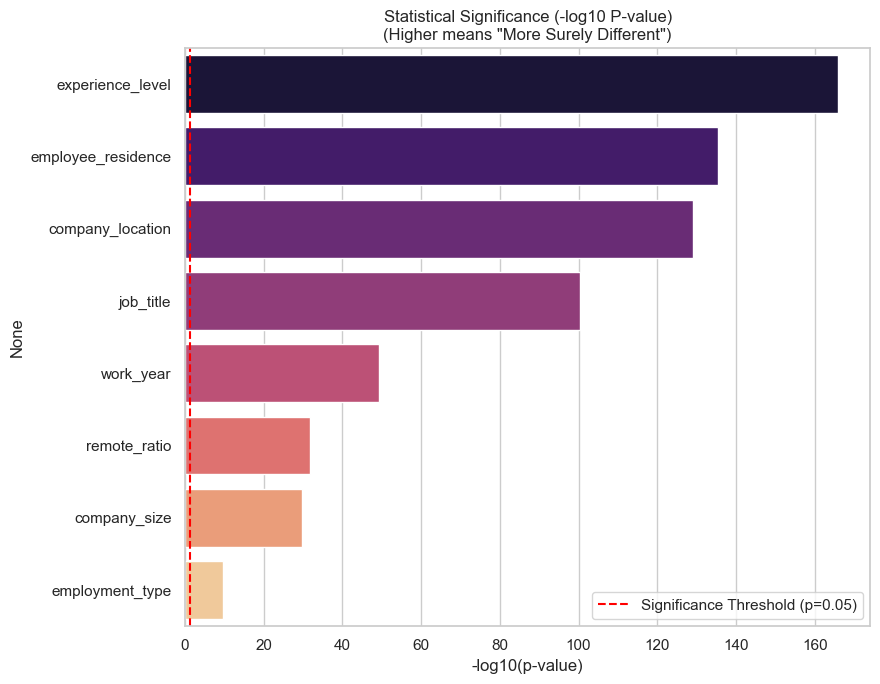

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Define categorical features
categorical_features = ['experience_level', 'employment_type', 'job_title', 
                        'employee_residence', 'remote_ratio', 'company_location', 
                        'company_size', 'work_year']



# --- 2. Compute Kruskal-Wallis Significance (-log10 p-value) ---
# We use -log10 because the p-values are extremely small (e.g. 10^-100).
# A value of 2 means p=0.01, a value of 100 means p=10^-100.
p_values_log = {}
for feature in categorical_features:
    groups = [group['salary_in_usd'].values for name, group in df.groupby(feature)]
    if len(groups) > 1:
        stat, p = kruskal(*groups)
        p_values_log[feature] = -np.log10(p + 1e-300) # +epsilon to avoid log(0)
    else:
        p_values_log[feature] = 0

p_series = pd.Series(p_values_log).sort_values(ascending=False)

# --- 3. Generate Charts ---
plt.figure(figsize=(16, 7))


# Chart B: Statistical Confidence (-log10 P-value)
plt.subplot(1, 2, 2)
sns.barplot(x=p_series.values, y=p_series.index, palette='magma')
plt.title('Statistical Significance (-log10 P-value)\n(Higher means "More Surely Different")')
plt.xlabel('-log10(p-value)')
# Add a threshold line (p=0.05 is approx 1.3 on log scale)
plt.axvline(x=1.3, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
plt.legend()

plt.tight_layout()
plt.savefig('numerical_vs_nominal_outcomes.png')

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_9260\185601972.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')


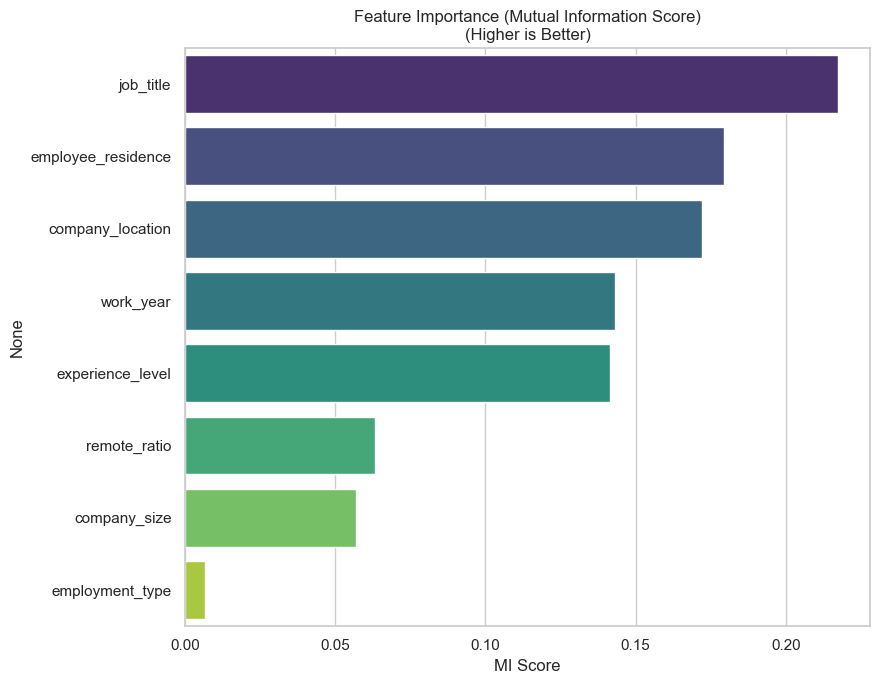

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Define categorical features
categorical_features = ['experience_level', 'employment_type', 'job_title', 
                        'employee_residence', 'remote_ratio', 'company_location', 
                        'company_size', 'work_year']

# --- 1. Compute Mutual Information Scores ---
le = LabelEncoder()
df_encoded = df.copy()
for feature in categorical_features:
    df_encoded[feature] = le.fit_transform(df_encoded[feature].astype(str))

X_mi = df_encoded[categorical_features]
y_mi = df_encoded['salary_in_usd']

mi_scores = mutual_info_regression(X_mi, y_mi, discrete_features=True, random_state=42)
mi_series = pd.Series(mi_scores, index=X_mi.columns).sort_values(ascending=False)


# --- 3. Generate Charts ---
plt.figure(figsize=(16, 7))

# Chart A: Feature Importance (Mutual Information)
plt.subplot(1, 2, 1)
sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')
plt.title('Feature Importance (Mutual Information Score)\n(Higher is Better)')
plt.xlabel('MI Score')


plt.tight_layout()
plt.savefig('numerical_vs_nominal_outcomes.png')

Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,602.82
RMSE  : $48,288.52
MedAE : $31,560.58
R2    : 0.3450


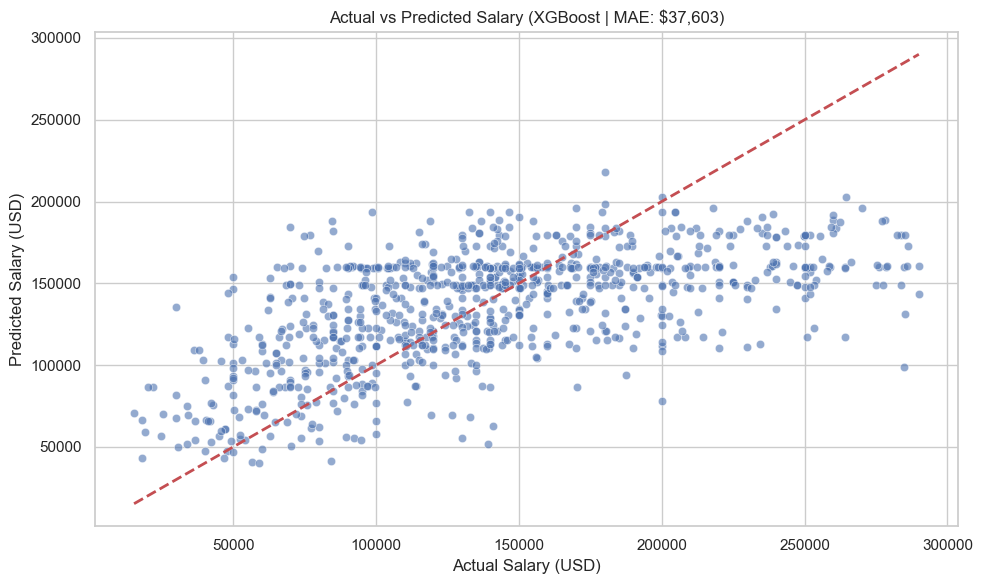

In [33]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Binary Remote Version)
# =========================================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import xgboost as xgb


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any




# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")




# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)


    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite".
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0.
    # Any other values (like 50) will become 0 (Onsite) based on this logic,
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")


    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2


    df_clean = df[z_scores <= threshold].copy()


    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")


    return df_clean




# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "company_location"
    ]


    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]


    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year", "remote_ratio"]


    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )




# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )


    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )




# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }


    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )


    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_




# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")


    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()




# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)


    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )


    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)


    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")


    evaluate_model(best_model, X_test, y_test)


Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,489.11
RMSE  : $48,358.91
MedAE : $30,818.84
R2    : 0.3431


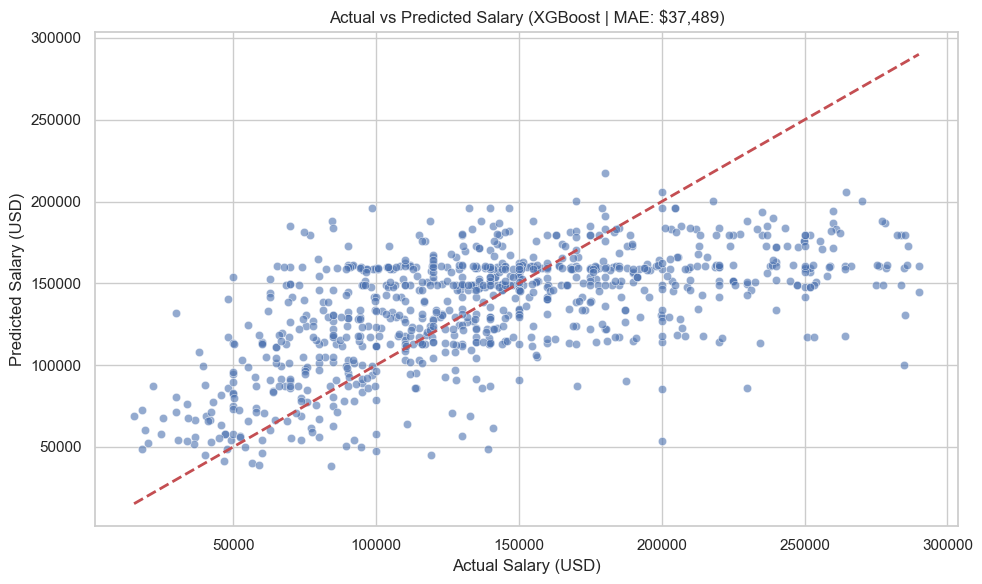

In [35]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Binary Remote Version)
# =========================================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import xgboost as xgb


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any




# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")




# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)


    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite".
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0.
    # Any other values (like 50) will become 0 (Onsite) based on this logic,
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")


    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2


    df_clean = df[z_scores <= threshold].copy()


    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")


    return df_clean




# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "employee_residence"
    ]


    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]


    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year", "remote_ratio"]


    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )




# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )


    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )




# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }


    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )


    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_




# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")


    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()




# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)


    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )


    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)


    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")


    evaluate_model(best_model, X_test, y_test)


Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.9, 'model__regressor__reg_lambda': 1.5, 'model__regressor__reg_alpha': 1, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.1, 'model__regressor__colsample_bytree': 0.8}

--- EVALUATION METRICS ---
MAE   : $37,781.09
RMSE  : $48,556.02
MedAE : $31,672.34
R2    : 0.3378


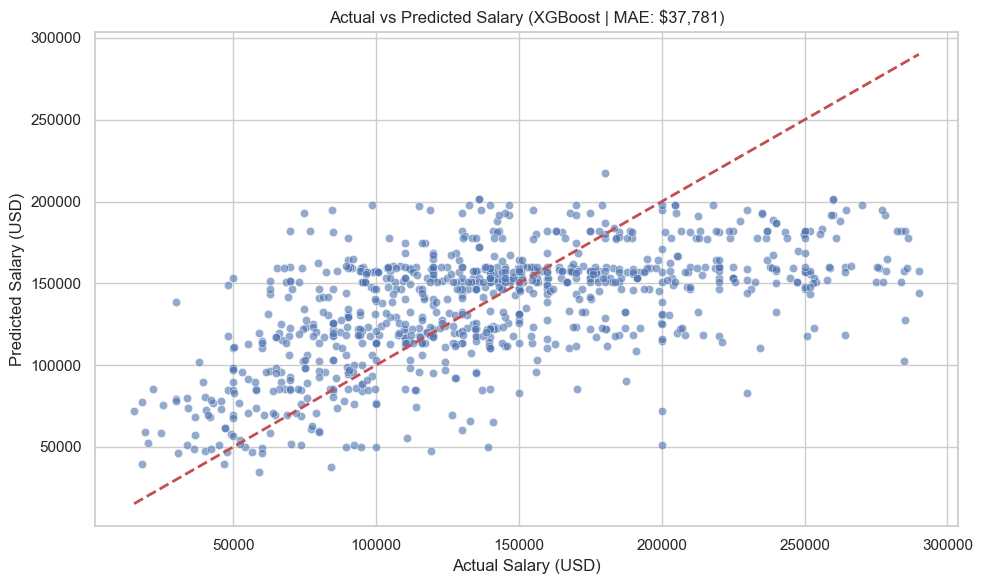

In [36]:
# =========================================================
# XGBoost Salary Prediction Pipeline (Binary Remote Version) + remove remote
# =========================================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import xgboost as xgb


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any




# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")




# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)


    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite".
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0.
    # Any other values (like 50) will become 0 (Onsite) based on this logic,
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")


    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2


    df_clean = df[z_scores <= threshold].copy()


    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")


    return df_clean




# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "employee_residence"
    ]


    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]


    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year"]


    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )




# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )


    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )




# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }


    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )


    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_




# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")


    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()




# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)


    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )


    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)


    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")


    evaluate_model(best_model, X_test, y_test)


Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,514.32
RMSE  : $48,435.86
MedAE : $30,482.87
R2    : 0.3410


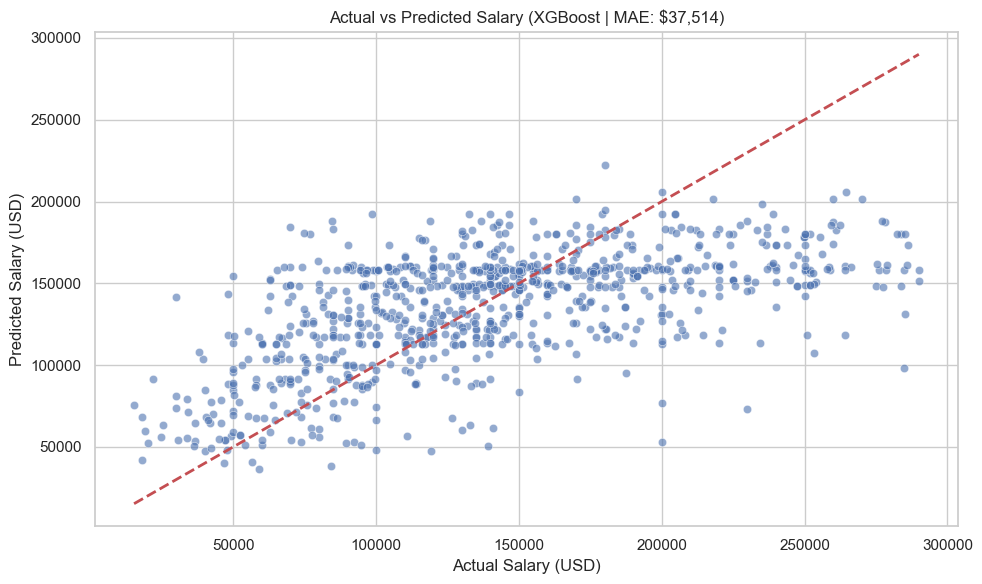

In [ ]:
# =========================================================
# XGBoost Salary Prediction Pipeline - move remote to nominal
# =========================================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import xgboost as xgb


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any




# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")




# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)


    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite".
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0.
    # Any other values (like 50) will become 0 (Onsite) based on this logic,
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")


    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2


    df_clean = df[z_scores <= threshold].copy()


    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")


    return df_clean




# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "employee_residence",
        "remote_ratio"
    ]


    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]


    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year"]


    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )




# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )


    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )




# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }


    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )


    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_




# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")


    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()




# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)


    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )


    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)


    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")


    evaluate_model(best_model, X_test, y_test)


Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)
Original shape: (4644, 11), Cleaned shape: (4478, 11)
Outliers Removed (Z-Score > 2): 166
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0, 'model__regressor__n_estimators': 100, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $37,599.70
RMSE  : $48,332.87
MedAE : $30,701.00
R2    : 0.3438


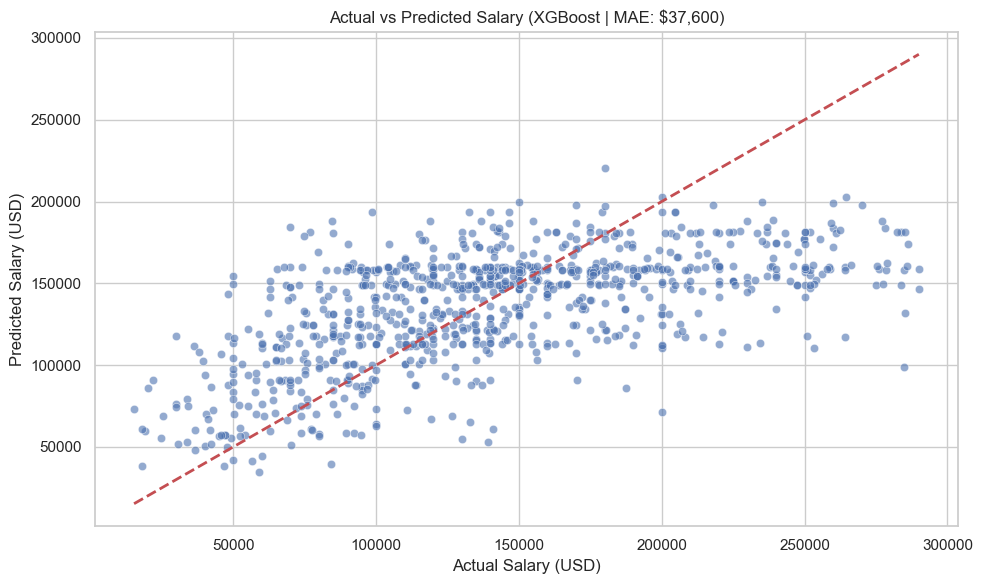

In [38]:
# =========================================================
# XGBoost Salary Prediction Pipeline - move remote to nominal - replace company_location with employee_residence
# =========================================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import xgboost as xgb


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)
from sklearn.compose import TransformedTargetRegressor
from typing import Any




# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"
sns.set_theme(style="whitegrid")




# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, target_col: str = "salary_in_usd") -> pd.DataFrame:
    df = pd.read_csv(filepath)


    # ----------------------------------
    # Feature Engineering: Make remote_ratio binary
    # ----------------------------------
    # User requirement: "only have remote or onsite".
    # Logic: Map 100 (Remote) to 1, and 0 (Onsite) to 0.
    # Any other values (like 50) will become 0 (Onsite) based on this logic,
    # or you can filter them out if strictly only 0/100 exist.
    df["remote_ratio"] = (df["remote_ratio"] == 100).astype(int)
    print("Feature 'remote_ratio' converted to binary (1=Remote, 0=Onsite)")


    # ----------------------------------
    # Outlier removal on TARGET only
    # ----------------------------------
    z_scores = np.abs(stats.zscore(df[target_col]))
    threshold = 2


    df_clean = df[z_scores <= threshold].copy()


    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    print(f"Outliers Removed (Z-Score > {threshold}): {len(df) - len(df_clean)}")


    return df_clean




# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    # Nominal categorical variables
    nominal_cols = [
        "job_title",
        "employment_type",
        "company_location",
        "remote_ratio"
    ]


    # Ordinal categorical variables (true ordinal)
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]


    # Numerical variables (passed through without encoding)
    # remote_ratio is kept here because we converted it to 0/1 ints in the cleaning step
    numeric_cols = ["work_year"]


    return ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,
                sparse_output=False
            ), nominal_cols),
            ("num", "passthrough", numeric_cols)
        ]
    )




# =========================
# MODEL PIPELINE
# =========================
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    xgbr = xgb.XGBRegressor(
        objective="reg:absoluteerror",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )


    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", TransformedTargetRegressor(
                regressor=xgbr,
                func=np.log1p,
                inverse_func=np.expm1
            ))
        ]
    )




# =========================
# TRAINING & HYPERPARAMETER TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        "model__regressor__n_estimators": [100, 300, 500],
        "model__regressor__learning_rate": [0.01, 0.05, 0.1],
        "model__regressor__max_depth": [3, 5, 7],
        "model__regressor__subsample": [0.7, 0.8, 0.9],
        "model__regressor__colsample_bytree": [0.7, 0.8, 0.9],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 1.5, 2]
    }


    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )


    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_




# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")


    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2)
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Actual vs Predicted Salary (XGBoost | MAE: ${mae:,.0f})")
    plt.tight_layout()
    plt.show()




# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)


    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )


    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)


    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")


    evaluate_model(best_model, X_test, y_test)
